In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Link to the dataset
https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder

In [2]:
!ls

anno_test.csv	car_data   Proprocess.ipynb
anno_train.csv	names.csv  train_data.csv


In [5]:
anno_train = pd.read_csv("anno_train.csv", header=None)
anno_train.columns = ["image", "upper_x", "upper_y", "bottom_x", "bottom_y", "class"]
anno_train.head()

,image,upper_x,upper_y,bottom_x,bottom_y,class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [3]:
train_dir = "car_data/train"
test_dir = "car_data/test"
car_names = pd.read_csv("names.csv", header=None, squeeze=True)
car_names.head()

0    AM General Hummer SUV 2000
1           Acura RL Sedan 2012
2           Acura TL Sedan 2012
3          Acura TL Type-S 2008
4          Acura TSX Sedan 2012
Name: 0, dtype: object

In [40]:
OUT_SIZE = (100, 100) # 100 x 100 images

In [6]:
train_ds = load_dataset(train_dir, anno_train)
ds.head()

,name,upper_x,upper_y,bottom_x,bottom_y,class,model,path
0,00163.jpg,46,84,661,428,1,AM General Hummer SUV 2000,car_data/train/AM General Hummer SUV 2000/0016...
1,06833.jpg,3,23,132,98,1,AM General Hummer SUV 2000,car_data/train/AM General Hummer SUV 2000/0683...
2,00522.jpg,6,7,94,68,1,AM General Hummer SUV 2000,car_data/train/AM General Hummer SUV 2000/0052...
3,04544.jpg,18,18,328,190,1,AM General Hummer SUV 2000,car_data/train/AM General Hummer SUV 2000/0454...
4,03943.jpg,50,127,587,396,1,AM General Hummer SUV 2000,car_data/train/AM General Hummer SUV 2000/0394...


In [7]:
ds[ds.name=="00001.jpg"]

,name,upper_x,upper_y,bottom_x,bottom_y,class,model,path
541,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012,car_data/train/Audi TTS Coupe 2012/00001.jpg


In [44]:
ds.shape

(8103, 8)

In [8]:
def show_image(image_path, bounds, ax):
    img = Image.open(image_path)
    ax.imshow(img)
    x1, y1, x2, y2 = bounds 
    rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1,edgecolor='r', facecolor="none")
    ax.add_patch(rect)

In [9]:
def process_one_image(image_path, bounds, output_size=OUT_SIZE):
    img = Image.open(image_path)
    img = img.crop(bounds)
    img = img.resize(output_size)
    img = img.convert("L")
    return img

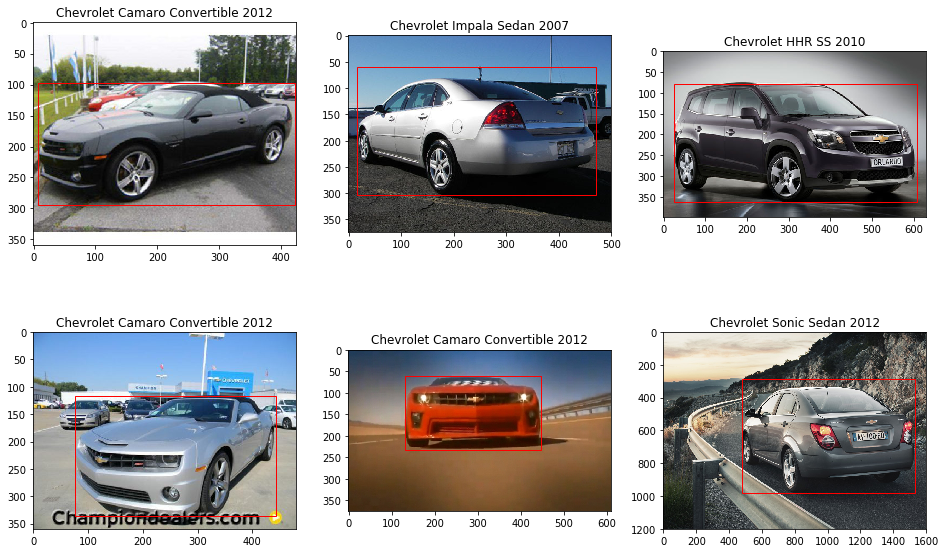

In [36]:
sample_indices = np.random.binomial(ds.shape[0], .3, 6)
sample = ds.iloc[sample_indices]
i = 1
plt.figure(figsize=(16, 10))
for index, row in sample.iterrows():
    bounds = (row.upper_x, row.upper_y, row.bottom_x, row.bottom_y)
    ax = plt.subplot(2, 3, i, title=row.model)
    show_image(row.path, bounds, ax)
    i+=1

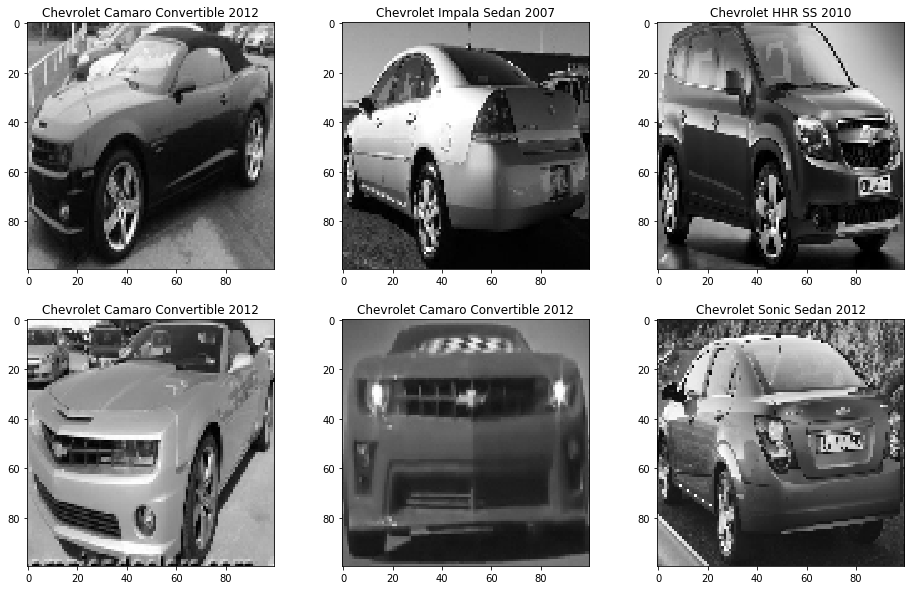

In [37]:
i=1
plt.figure(figsize=(16, 10))
for index, row in sample.iterrows():
    bounds = (row.upper_x, row.upper_y, row.bottom_x, row.bottom_y)
    ax = plt.subplot(2, 3, i, title=row.model)
    img = process_one_image(row.patdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA5IAAAJOCAYAAADF+jjyAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsfXfYHlW1/TpfwKBSBQHpHUFKRIr0XqU3EbwoFhQUFUFBvVfh570KlusVC3oFryAgHUVFQLr0XkOHJBAgihRBAphkfn/MrJk1865v5n2TEAjfXs/Dw5cz7cwpe8679zprpyzLEAgEAoFAIBAIBAKBQL8Yer0rEAgEAoFAIBAIBAKB2QvxQzIQCAQCgUAgEAgEAgMhfkgGAoFAIBAIBAKBQGAgxA/JQCAQCAQCgUAgEAgMhPghGQgEAoFAIBAIBAKBgRA/JAOBQCAQCAQCgUAgMBDeVD8kU0pHpZROeQPUY5mUUpZSmuP1rktg5iKl9GJKabni71+llP6z5dwspbTCrKtdIDA4wm7OXKSUPppSuvoNUI83RL8GAm9GvFHm15vFbgZmX8x2PyRTSvumlG4uFvRPppT+lFLa6PWu1/Si30VHSmnblNJVKaUXUkp/SyldmVLaeVbUcWYjpbRSSumslNLTKaXnU0p3ppS+mFIa9XrXTZFSuiKl9Akty7Js7izLHnmNn/uBlNLVKaXnUkpPpZR+kVKaR46PTin9MqX0j+L4F+XYW1JKZ6eUxhUfl80a9/5SSunuYhw9mlL60mv5LoE3Bkai3XTz942OlNISKaVzxDbelVL66OtdL0Vhv39XfIeeSSldlFJauXHOoYVter6wVaPl2DIppctTSi+llO5LKW0lx35WjFH+90pK6YVZ+X6BABF2syzbLKX0+HSc83LRdk+nlM5NKb2r5bmtti+l9PHCXryQUpqUUvqjrosa9/peSunB4tz7Ukr7N46PSSndUtigW1JKY+TY5oV9ej6lNM7ce1j7NVIxW/2QLBbM/wPgWwAWAbAUgJ8C2GUW12OWen5SSnsCOAvAyQCWQP7uXwew06ysh8OgP/5SSssDuAHAYwBWz7JsPgB7AVgbgDUKsxopx+s5N+YD8J8AFgOwCvI+/64cPwrAigCWBrA5gC+nlLaT41cD+DCAp8y9E4D9ASwAYDsAn00p7TOT6x94A2Gk2s3ZFL9GbhuXBrAg8rk66XWtUS/mB3A+gJWRj6cbAfyOB1NK2wI4EsCWAJYBsByAo+X63wC4Dfn7fQ3A2SmldwJAlmWfLpx1c2dZNndx7lmv9QsFAk2E3Zwp+Gwxj1cAMDeA77WcO6ztSyltirwfPpRl2TzI10Vnttzrn8jXx/MB+AiAH6aUNiju9Rbk9uoU5OugkwD8rijntb8EMJyTfVj7NWKRZdls8R/yAfEigL1azjkK+eA6GcALAO4BsLYcXwzAOQD+BuBRAJ+T8skA3iHnvhfA0wDmBPBRANcA+AGAZ5Av8ocA/DuA8QD+WjxzvuLaZQBkAOaQup8I4EkAE4vrRyGfDC8DmFq823PmnRKACQC+1PLeywO4DMDfizqfCmB+OT4O+aS4E/kkORG5YfxT0U6XAFhAzj8L+Y+Q5wFcBeA9cuxXAI4HcEFxr62K9zu5aNfxRbsMDVPXUwD8saOvdy767jkAVwBYpfEuhxfv8jyAMwDMVRy7F8COcu4cRXusVfz7/QCuLe57B4DN5NwrAPxX0c+TizacWvTPiwB+XJyXAVhB2uJnAP5ctOOVAJaWe+q5o5Eb0QnIjePPALy1z7G/O4C75N8TAWwj//4mgNPNdY/rOw5z7+MA/Oj1nt/x32vzH0ao3SyuvwLAJ4q/Nyvmw5eL5z4JYFcAOwB4oKjfVxttcjZy+/ICgFsBrCnHjwTwcHFsLIDd5NhHAVwt//4h8gXSPwDcAmDjlr54EcCYluNtNmxZ5DboBeQ26ccATpHjXXb9JwD+WFx/A4Dl+xxj7yj6bcHi36cB+JYc3xLAU8XfKwF4BcA8cvwvAD5t7vv2oi6bvt7zKP4bWf8h7OYnGmWbAXh8Rs4BcDCAe1rac1jbh3zN99sZ6M/zARxW/L1N0S5Jjk8AsF3jmq0AjGuU9W2/RtJ/s1NEcn0AcwE4r+O8nQGcjspr+mMAKCJMv0f+8V0c+cftCymlbbMsewLAdQD2kPvsC+DsLMv+Vfx7PQCPAFgY+Q+Ojxb/bY7c4zo3n2VwEoApyL0y70U+kD+RZdm9AD4N4Los98DOb65dGcCSyBc1wyEB+DaqCNaSyI2cYg8AWyOfCDsh/xH5VQALITdSn5Nz/4Q84rUw8gXUqY177Yu8DeZBHv36EXLjtRyATZF7kg4Ypq5btb1LSmkl5B6fLwB4J/IfrL8XbxEA7I08mrYsgDWQ9wOK6z4k520L4Oksy25NKS2OfJH0n8gXPocDOKfhSfo3AAcW7/VR5Abis0XffHaYKu+H/IfcQgBuR29bEccib/sxyMfB4sijyv1gE+QfKaSUFkDez3fI8TsAvKfPe5VIKSUAG/PegTclRqrddFgUeVtw7v0CeeT+fcjnwddTsf+5wC7If3y9A/mPo9+mlOYsjj1cXDMf8mjbKS20rZuQz3ve56yU0lzDnHs9gJ+klPZJKS2lB/qwYach/6G6EHKb9JHGvbvs+oeKd1kAwEPI+6sfbIL8h+Lfi3+/B732aZGU0oLFsUeyLHuhcdzZrz2QL8Kv6rMegcDMQtjNmYhi7u+O3K4Mh2FtH3LH1rYppaNTShsqVb6PZ78VwDqo1jnvAXBnVvwKLHAn+ltDDWK/Rg5e71+y/f6HfMH+VMc5RwG4RP69KoDJxd/rAZjQOP8rAP6v+PsTAC4r/k7IPcibFP/+qLn2UgAHy79XBvAv5FGwZVB4iJBH/l6BRJ+Qf7Avl3tf3fJOGxb3mmuAttoVwG3y73EA9pN/nwPgePn3IRjG24PcQGaovF+/AnCyHB9VvN+qUvYpAFcMc79/oeH5aRz/DwBnyr+HkHuPNpN3+bAc/w6AnxV/r4DcM/i24t+nAvh68fcRAH7deNZFAD5S/H0FgP/XOH4Fer1uzYjk6XJsbuTeviX13GI8/RPi4Uf+oXq0j77cGsCzAFYq/r1kczwU54wz17ZGJJEvGu8AMHrQ+Rj/zR7/YYTazeKccv4i95ZPBjCq+Pc8xbPWk/NvAbCrtMn1cmwIuYffRhORO5F26aduxXxec5hjCwA4BvmiZ2px33WKY8PaMOS0uykA3i7HToNEJBvXObt+ghzfAcB9fYyvJZDb5w9J2cMQG488ypIV/ftv2q7F8f8C8Ctz70sBHPV6z6H4b+T9h7CbLyFnPfC/F9Ebbez3nOeL+t0OYKmW5w5r+4rj2yP/cc5n/TcKe97xPicBuBBFBBL5GvP0xjmnNm0NfESyb/s1kv6bnSKSfwewUB98cd0X9hKAuYprlgawWMoFTJ5LKT2HPCK3SHHu2QDWTykthtzDmiGPSBGPNZ6zGHKaATEe1URWLI38Q/qkPPfnyD1N/YBe3rZNygunlE5PKU1MKf0DOX10ocZpus9msvn33MW9RqWUjkkpPVzca1xxjt5P22IhAG9Bb1ss3vI+w74LGu2aZdm04nl6v2Yfz12c+xByeutOKaW3IfcWnlactzSAvRr9v1GjLs0+7gflNVmWvYicirJY45x3AngbgFvk2RcW5cMipfT+ov57Zln2QFH8YvH/eeXUeZH/gO4bKaXPIo8cfyDLslcGuTYwW2Gk2k2Hv2dZNrX4e3Lxf2sHm3Uv7NDjRf2RUto/pXS71G019NpcFOcellK6txBveA55FNOem2XZs1mWHZll2XuQt8ntyCOhCe02bDEAz2ZZ9k+5XdnOfdp1a1eHQxEJvRjAT7Ms+40cehG99gnIbVTzGI/X7FdKaUnk7JaT2+oQCLxGGOl283NZls3P/wDsOAPnzIecObYAcseTRYftQ5Zlf8qybCfkbIxdkP8obhVTSyl9F7lt3jsrfvWhTxs0DGbk2jctZqcfktch53fvOp3XP4Y8AjS//DdPlmU7AECWZc8h/yjujZxm8BsZeEA+0RVPIJ+0BD3CTWGEx5B7iBaS585bTBZ33ybuL+6xR8s53y7us0aWZfMip2uljvsOh32RT1LufVymKNf7aZ2fRu4Za7bFxGHufwna36XWroURWbLlfk2Q3roLgLHFj0sgb8NfN/r/7VmWHSPXNvuiq29Q1I11nRu5kXuicc7TyBep75Fnz5flm9AtUkrvRU6V+ViWZZeWFcqyZ5FHRtaU09fEAPTUlNLHUIhhZFn2eNf5gdkaI9Vuzgzo3B5Cvgh6IqW0NHJa7GeR7wucH8DdMDY3pbQx8kji3sj3oc+P3EPfaZ+zLHsa+b7qxZDblTYb9iSABVJKb5dbKD2sH7veNwqK/cUAzs+yrEmBvQe99mlSllNf7wGwXKqrLTr7tT+Aa7PXWCE7EBgGYTdnIrIsuws5Jf8n/GHYcX7T9umxacWa6DLkPxItUkpHI49ibpNl2T/k0D0A1mjUYw30t4bq136NKMw2PySzLHse+b6Wn6SUdk0pvS2lNGdKafuU0nf6uMWNAP6RUjoipfTWwkO7WkppHTnnNOQfsD1QRbKGw28AHJpSWrb4AfEtAGdkWTalUe8nkRuM76eU5k0pDaWUlk+5ChWQG4IlGnsA9foMwBcB/EdK6QC5x0Yppf8tTpsHxebpYh/NjKR0mAe5Ifo78ijat9pOLjz8ZwL4r5TSPMUi64vIo6IO3wCwQUrpuymlRQEgpbRCSumUlNL8xb0+kFLaMuX7kQ4r6nNtn/U/HfmegINQ78NTkEcqty36fq6Uy1UP6yFD3jfLtRwHgB2KvngL8n1JN2RZVvMmFtGMXwD4QUpp4eKdF0+5umEPUkqrIY9YHpJl2e/NKScD+PeU0gIppXcD+CRyahqvH52qPVhvKd41Fcf2Q96nW8ci7c2PkWo3ZxLel1LavYgwfAG5HboeuQhMhnz/HlJKB2D4Bc08yBd8fwMwR0rp6+j1aJdIKR1btO8cxWLlIAAPFT/ChrVhWZaNB3AzgKNTngJoI9RVvQey621IKc2LnFJ7TZZlR5pTTgbw8ZTSqsUPzn9HYZ8KZsXtAL5R1H835Iu4cxr32B9i0wKBWYmwm68JTkIeGbVp69psX0ppl5TvnVwg5VgXOWPh+mHu9RXkP9C3zqq928QVyKmznyvWStS/uKy4dqhYP82Z/zPNxfYawH6NKMw2PyQBIMuy/0b+I+XfkX+YH0PuFf5tH9dORf5hHYNcQetpACcg984S5yMXI5iUZdkdPTep45fI5YqvKu73MvK9hg77I6d/jkW+P+ZsVJTKy5B7M55KKT09TN3PBvBBAB9D7pmahNy7Q8n1owGshdzT/UcA53bUvQ0nI6dNTCzqaydqA4cg3wP4CHLxndOQt08Psix7GPn+wGUA3JNSeh75JLwZwAtZlt2PPKL6I+R9tBOAnbIse7WfyheG9DoAGyBXXGT5Y8g98l9FNXa+hPY58EMAe6aUnk0pHTfMOach/3H8DHLRjv2GOe8I5BvNr085tewS5PscHA5DTns9MVX51NTj9Q3k+5DGI1dp/G6WZRfK8fuRR0AXR77gm4zKm/mfyGWrb5J7/2yYegTeBBipdnMm4HfI7e6zyPfG7J5l2b+yLBsL4PvI7cwkAKsjV1l0uAi5yM0DyOfry2in0L8NucDHc8jt6dIoFl592LB9ke/Nega5jVBa6PTY9eGwG3LxigNSPefjUkU9L0S+d/3y4pnji/oQ+yBP9/Qs8j1Re2ZZ9jceTCmtjzz6G2k/Aq8bwm7OXBRruOOQ71F0GNb2IX+PTwJ4ELn69SnI1z3DiRt+C3nU9kGxT1+VeuyKvJ2eQ76u3lXWmJsgXzNdUNxjMvIf50Sr/RqJ4ObTQCAQCAQCAFJKRyEX1frw612XQCAQCATeqJitIpKBQCAQCAQCgUAgEHj9ET8kA4FAIBAIBAKBQCAwEGboh2RKabuU0v0ppYdSSm7TfSAQCMz2CFs3spBl2VFBaw2MRIStCwQCg2C690imlEYhFxDYGnl+rZuQJyUeO/OqFwgEAq8vwtYFAoGRgLB1gUBgUHQlW23DusileR8BgJTS6Shy9w13wVvf+tZs3nnnxSuv9OY/1x+006ZN6yl7+9vz9FiTJ08uy0aPHg0AePnll8uyZFLU8H5DQ0M95/G+APDSSy/13GOppfJUXI89VgntsQ68LwCsuOKKAFB7tyeeyNMJTp06tVbf4d6R9dPn8/ioUaN6yuaaa66yjMfdea+++mrPeXPMUXU9/9b34bVal7b66Xv861//qt1P2+Qtb8lVp7Ut5pxzztoxfZbrMwWfq3Vne+tzWSctmzJlSu2YQp/Fe7tnuLZgezonDa8DqjZ45zvfWZZNmtRMC1XBzRHtRx7XZ+h4aF6r93P9zTL2j95br00p4ZVXXsGUKVOmN3fpGx0D27p55pknW2ghm3O+htlZ7Gx2rPvMrjPvRzv1979XSvPzzz8/AG+33kh4rfqxaSOm9/m8dmbV09m6Qa597rnn8NJLL72xO3X6MbCtm2+++bJFF1201p6ubWdkHrRdq2sEt9bjuu7ppyuRUt5Pv5X8lur3jmUvvvhiWcb15sx4n/nmq0Rc//nPfwKor+vmnXfenme5NZdbB7X1gbYP0VXGa5v/HwS8xq1Tn3322bLs+eefB1BfJ77rXe9CE4PaBHf+oGVd57f1jyvresaMlM1I/YB8TL788sudHT0jPyQXR13G/HHk0uM1pJQOBHAgkP9o22GHHWqDnYNHF/Nc7HMwAcDmm28OALjtttvKst133x0A8Ktf/aos4yTUH5cLL7xwXsHHq9zr73hHnuNUBzR/IOrkOfPMMwEAhx9+eFl28803A6g3+mmn5WmA9Afn1772tdo7LrLIIuUx/rjT915yySVr9dDj+iPryCNztsm4cePKsp133rmnTnfckStK//Wvfy3LxowZAwCYZ54qn+q9994LoPphpdC+IpzB0QnP+6y77ro959MwqrF2z3AD2xkwtyjgx6HtRxQAPPnkkwCq9weAU07J019q27r6TZw4EQCw4IILlmVve9vbAADPPfccgGohCVRtoj/82C5f//rXyzJ+9Dg+gWo+6EeP4+KSSy4py/ix0zZbbLHFANTHD8eezi86TNRYs0/1A8y5xI8ekDtMjjtuuOwobwoMbOsWXHBBHH300c3jAOr96NA29t1Hwi0eZmSR48Z710KmeaxrjvIZXWX9LhR4TZczrK3u7n6ur/Ra2jHO0Z///Oflsc997nO1Y3rffp/fZhuByob0e557Hy1ztt3dr1m/Nief/q3359/Okafnsf3UdrY5jBWuH11dBhnL2sdvQgxs6xZZZBH84he/qH1v2VfuG9y4D4D2Hyz6t96PZbrWO/bYYwHUHTo8b511qhSO/DbrD0R+72655Zay7B//+EftfKD68ce1pvshq2OR30p9Ft9Dv8tcI7z1rW8ty/bZZ59a3YBqvjzzzDM9z9W5xHq5dZ2Od84NPY/343pEz+P/dQ3A85190fdZdNFFAQDLLVel515iiTyVN9eGQGVXtW0/8YlPAAAuvfTSsuyFF17oeZ57x2Y9ta6Dlmk7NdtEj2sAh8e1f3ieu59e6wIe/Lvf+7lr3XqyOQb++Mc/oh/MyB5Jt1Lp6bksy/43y7K1syxbWz0tgUAgMJtgYFunjppAIBCYTTCwrdMfWYFAYORhRn5IPg5gSfn3EgCemLHqBAKBwBsOYesCgcBIQNi6QCAwEGaE2noTgBVTSssCmAhgHwD7dl2UZVktXE7ap3q1SItQygL3MmqIf+655wZQD2/zuD6DVEOlETAsr/cjBYJ0BsCH2Plct39Q91ySqrr44osDqIeSSYlUiiepDxrNYN2/+MUvlmV33XUXAGCXXXYpyxh2v/XWW8sy0i+32mqrsuxvf/sbAOD222/veW+lKrDttR0Zbtc2c++9xx571MqUksQ+0D7jvkDWDajGhdIvWRcNv/Nv7VvWT6kS7AulbpJqTPonAGy44YYAgAsuuKAsO/744wHUaTWkt7Tt/9RjpCtrf2+33XYAKkosULWVtvGNN94IoN4+bt/tZpttBqC+x4JjQPcfsO763htvvHHtvorVV1+9/Puee+6p3QPIabhKX3kTYrps3XDoogG6/cFuX2u/NFZHp2yjAbbRG4e7H+HK3PnuGZxfXVRL1xbNZw13P3ce/1a70rY3va1smWWWKY/xfu784erShF7bti9b4aibrr957y56ses/94y2e7g9/O59XF+4PeeuTm3tqHa3jd7cRROfHfcFD4jpsnUppU566nDXNc9ru0bXhNw6oGOKdeBWDcBT/h566CEA9XUL11/UuwCq75x+o7kO4XpJ35vfXl3D8TxqZug148eP73lHbuPSOul2J45Bt3Z1W2e6dC7Yfm1zGajmEMu03bn2cbod2sasn64f3Bqb73vTTTeVZaTD7rfffmUZtyLp2tXB0dT73f7BerXphmg7ue9327fDbcdwWwD0WvcNdP3Sdj99Lq9p2rd+22i6f0hmWTYlpfRZABcBGAXgl1mW3TO99wsEAoE3IsLWBQKBkYCwdYFAYFDMSEQSWZZdAOCCzhMLpJQw55xz1jzE9GCoR4ERP/6/eBaAuggJBW7U++M8LowMOa+BbkLlfdTrxb/VI0TvC0Vv9D7qDaDnym16ZnRPN9Vuu+22ALwQjZ7HCKO+zyOPPAKgLozCCJVGox599FEA9egWvW3ajhTo0b5iFJERR6BqC430NftA22Ts2Fz87ZxzzinLGHXVPlPPGsHN5erhYv90eYp5XDe8r7DCCgCA7bffvixbeumle8ooUHTEEUeUZdzMrxFbetnc5mj2Ke8FVG2mnkX2gW6kZ93dhunPf/7zZRm9mzoGOEZ0fvEZ6nllFF7HGZ+rwkMcA3reuuuu2ymqMLtjUFtH9OuVdFEhRZuHvyvi1VavLmGdNvQr+tLvPdoU/RTOc+6iTM5r68apE+dyz+XxNkEfnVNOVZzo1zOu9rctEtylkumis27sOc90273b2smd3+VVd33La/W7SBvbJZjTjCboc7vmYfP5IwXTY+tGjRrVGcUmuiKXLkJ26qmnAqgEBBUUgAOqcaFsIK4vdN1ARhiFXoDqG0kRPgB44IEHANTnTVMxvcvmuLUrldrVlvA7qwJ6662X6xxRpEav6YqMtQkUKdx7tH3PHXPFCcxwba9tx/Wi9o+zv6zTBhtsUJZtscUWPfXk8SuuuKIs4727bIN7j37VVfu5h1vDuv5xzBFnmxxTx82bruios/FtTJR+MCN7JAOBQCAQCAQCgUAgMAIRPyQDgUAgEAgEAoFAIDAQZojaOj3Isqy20dZRWRjC1byLhNIvXS4/Ug2VckgohZDiIEp1JMVTaYXNOgHApz71KQB1sRJSDZVmcf/99wOo3lGpOaQ77bnnnmXZjjvuWHsvoGoDDXXzuNIDuCl5r732KstIcbz77rvLMlITtc1I51SRIT5P25Gh+pVWWqksY3hcxW74nnw+xYGAio6s5zvaKZ/l6BsqwOMoHW30AKUbkGbL/+s1ummc12ibcTwo5ZnPZb+QvgIA+++/P4A6tZXtpJQbXqNUVLbBGWecUZatuuqqAIDLLrus59rrrruuLGNfKfV4gQUWAFCfX6Q6K32Wz1ChAeZxVXGspZdeutafgbzPRo0a1UlDdPkCHR2vjc7ZVdZGUdH5MKiQSBs1sN88fw5dIjGuzdooiV1iKW2iPF3Jzpt1UaocaV7TQz1mXdw2h67cvm05OvU8RylzYjdtY69NOErf1YmIufbhs/S8foWm2sa567Ou8wIzF/32Gbdo/OIXvyjLOH4WWmihsozjQtdr/H7xGwcA7373uwHU80Ny/aWif/y+69jj3zpGuU5iXnKKKer5ale5ZtU1BbcYvfe97y3L+B665lp22WUB1LerOCpq27YJHdNuXcU26xLHatoVJ9aicNRaPl/bp+27oHViu2sZacCbbLJJWUaaq9sW4O7txmObzXM01i46ab+COW3361eox62FHbW132f0g7CagUAgEAgEAoFAIBAYCLM8ItncgMropIsCUtAEqKJ/eh5/Pav3lN4c9f7QO6URPEa/nAiJ/nqnt2bnnXcuyygC5Db/n3DCCWXZWmutVXsP9XwwIkoZagA488wzAQCbbrppWUbvnHoK6Dn7zW9+U5bts88+tfcCgAcffBBAXWyH0UcVMnICKvRGaPSPfaXncWO6Rh3vu+++2jH1sPG+2hfNzetapu/NNlZPE/tHvSu8j0bXeFzL2tIsaJu5jeTsP00xwms53nR88FodA4xeuDQhDz/8cFlGD9tqq61WlrEN1KPJ1BwaJaVHUyOSrLtGQtm3LmquUXa2lc6biRMn1to1kGNoaKhTtMSJfrloT5v0uNuE3+9z3bVqT4l+xZTahBi6IkptUuoOrk5a90FTRDhPc1f0pHmeS4PTFS1sg3uffqNrXe3t2s9FNvoRf3LPcp7xfsWiXPqPftPCuPZxQiLuvfpJMTLSxHe6wDaZXqEOADjxxBPLv5kmQ6OKtI/K1uL3S1kAEyZMAFD/fnLNqEw4t77g2km/gRTI0fUAmT9MW6bMHkYkXSohXUutvPLKAOrrJkY2te5kIb3vfe8ry8gQcnNZy1x0lO/WFX0kw6gtIqn35ZrDzVst41pHmYVt7DP3ProO43M17R0FeP70pz+VZS7qSrjntgnJdd2j7dvmopRdkcs2sZ2u+znBH2fjee/mt7fvFCl9nRUIBAKBQCAQCAQCgUCB+CEZCAQCgUAgEAgEAoGBMEuprU6AgvQ5pd4xXK1hWYbalY7H40oZWHLJJWv3BfymfkfFIx12mWWWKcsY6lXhFIZ7KTwCVDkgFbvtthuAikaqdEA+6+KLLy7LNt54YwD1HI9O1IXP/cAHPlCWkVJ10UUXlWWkrJLOqmVKwWLbajuynVVo5eCDDwZQ3/hN2oiKr2y00Ua1Omvd+Xxtfz5X6SOkw6oAENvC5SBSKjPRL91SqRK8n5ZxnLn3aKMHKH34lFNOqf0fANZYYw0AdSozeJkFAAAgAElEQVQN80XxmNaFuT0B4MADDwQAPPXUU2UZaTKcA0BFD1IBAdZZabksU9Ec9odSRJiTi33M+gfda/pA2k8XvcahLYdVF82sjSY5PTlBm3RGJ3TQryDM9IwlJ4TQJvzTryhRv7RYQu0l7dT05Nt04mCuffrtb0L7pa2fnQCOq1+/eT7dsbZ6OlGerjx3/YortaErp1vAo9mXbeNSxz7F91w+b27rAapv1fLLL1+W8ZvPHNpAZU+Vbsq1js4lbg/S+rmtMxx7+l3kcVJRdYxxveLWBVrGNdRSSy1VlvH7rTaEa0adD07Y0YnYdNHICY55vZZ17tdOcq2j25i4BndiO135Z937EE6okXRoAPj1r38NAPjgBz/YU9aVi5Fo2w7itls5m9e2daD5N+Ho+a5/2oR12ujIetyJoU0vIiIZCAQCgUAgEAgEAoGBMEsjknPMMQcWXHDBWrSHv+j1lzU9MuqFcQIQ9FKpB4e/tjUiSS+ERrxclHKzzTYDUBc1offHeRf0GUz1odEgRpVYPxXCoYeAm66BasOwphXh/TRiS2+Wbh4/99xzAdS9NTzOTeH6HurxYFuoN4ne9L333rsso3iP825oX9GL5iIR9DZqf9KzpufRw6V9y8ilRkTZ7ipaxH52whcaVWTfaj+2eZacyI+LBvH/Gi3kWNVxxJQt2u70lFIeHAAeeOABAPWo949//GMAlbARANx+++0A6rLpPK7vzXGx5ZZb9tRd25Fjjv0OVH165ZVXlmUrrrhiLUocyNupH7GdtoiJ23DfJaDirm2LZHWlyGmrZ5v8vBPb6bdO04O2dBRt53cddylG2uqsDArasH5TaSjaBCi6RGLaIoJdKVP6OaZw0fO29EtdEWNeq2sEJ7LRJorRj2BOP+/oPPcBj+HEdlwb63ygmI0KzHC9st5665VljD5qlJLfTV1XMdVHs25AfW66OeTYIYSLVJOlpt9WztuuyDvXHFoPpurSdSr/1hRuTIGiEUmuR7Rt22yxgnXWb7i7lnXlGtOlS9JvB+/h1gYukqZlvLdba7oURlrGtRbZXQDw4Q9/GECdEdZvSpDmt8VFC7u+7c7+uQgn2WnuWmdjXTu687q+38NdG2I7gUAgEAgEAoFAIBB4TRA/JAOBQCAQCAQCgUAgMBBmKbV1zjnnxLve9a7OnFMEaYtAlQ9PQ+fMH6QiNjyu93O5Cykmo5RRPmPs2LFlGWk1mveG+fpUFIcUQhUwIeWBz1UqAAV99Hy+j9ad1AalHJJSccstt5RlpIA+9thjZRlFdpQCS4qE5mhy7dMUzAGAMWPGAKiH8Xlc362Zs9HlQtMcoaSsUsgFAB5//HEAdToK76ciNu9///sBAOuvv35Zxja44YYbeu6n79Osk76HyzfZJvAA9NL7VESH93O5OvVZbAOlspAGc++995ZlpKX++c9/LsuYU1LpwMxBqdTjI488EkCdBk1a9SGHHFKWHX744QA8HU7prmPGjAlBCoN+aCEu/5ejH7Xd31EDu0QS3KZ+d96gcDQcRw1vy2vY7/sreK3OJUdFItpyI2r9B6VE6pxyQgz9CgrxuGszRb85EV392trA0dba6unKHNWxa1w6W9uv6I17Rr95Vd18aBPSCAwOtrt+n/ht02+/fssJbhPRcck+VaE9PkNtCJ+ha0cnrEN0CYU1qf/9CqXpPXQeEnwPl2NRhfa4/lShHm7jcbamq8yJEnKu6dqRz2D/6ZapNtuk78p31Lns8lg6ar+ju7bRQ//nf/6nLNtiiy0A1Ne9Oub6QZut6/pOzM5l/SAsZCAQCAQCgUAgEAgEBsIsjUhmWYapU6d2ehv5S1g9P/Qk6K9kHlcvg4NL4UHpZhU14b3V00PPFSNaCvWEMcKoUUpuJKc3SaOFlLFWrw6jdOopvvzyywHURW8mTJgAALjjjjvKMkZldaM2o0aaSsIJ8DA6y4goULWPRkxVlKb5XPVqNVMAqIePbaZ9Rg+cPp+RO43gcVO9RqAnTpxYe1cA2GqrrQBUm9IB4Gc/+1mtblqvLilqFzlsE+Nwwh/Om+bETfi+2o/06GlEksI6GkVmRF0FCfbYYw8A9ego21HHAMeSikUxzcy4cePKMgod8VlAnnJGU8cEcmRZZsWYmuc00RX5bjvmNuu3RS4Vbd70rpQTzbrrPZz8vXs+6+6iDi5dkIpuOc8066d2i2mKlNVAT7tGMTjndN64KAafQbGQm2++uTy277771t5B39vZBoWzF64dedyNGccS6RqDXZL1/aAtcujSELmxOiNy9G0CaPq3i2wonLhHlmUzFLF/M6OrXdiO+n0ia+h973tfWcY1lKZ64zzU+cgxrRFOzltlHjnRPSfS0hbVd+wiPkvXgY590cV+IBh15fpOn8s0awCw1157AaivSSnQqPOrLR2EtglTpbjvg85DthXXHI454uaytg/fR22ys018Vr/pnFxKDj2Pdnnttdcuyy699NLa84d7RpM12W9KFAd9H2f/2lJ99Js6pEuUx9k/V5dBbF1EJAOBQCAQCAQCgUAgMBDih2QgEAgEAoFAIBAIBAbCLM8jOf/889twtRNk0TxCPK4bkV0ol9RApSKQMql0vAsvvBBAJUij93Eh5BdeeKHnuUq7ZJ2VWtC2SZ90QX0f0j01TE9RFaXMUhhlxRVXLMsoSqPiK7zmIx/5SFnmRF/4PiussEJZRlqJUhBc7s3mfYFewQbdbM2QvYbuXU5GUi+0L9hWeh7zcJJaDFR0V60TczCed955ZRkpGvqOfK6OH/e+bB99D96HtBpH99TN646e4Cg3pKLqs9wYJC31e9/7Xs/99LnMP0XqNVDRZpViRKoNRXwAv7l8ypQpIUhh0E+bDJrnbnooq+5Yv7ki3TMc7bJ5j678X8zxpdR52k5XD52jzB+n+VcpRsacq0A1h3VLAZ/hhDe0fqTL6Xm8H3O9av0/85nPAABWWWWV8tgHP/hBAJ6q6+ipXcI6bbRl7VtHC3P3dbnN2kSYFM0+6pcy6967a5zT/ikdmdA2a6PUuvce7ngbgtbq0U+78Byd8+ussw6A+rYjrmW0n5ZbbjkAdZE+Utuvu+66sozUdV1Xce3maJqO3uzGitoa3sfNH0fPb8u1qiAFlKKGQLX1StefF110EYB6DnKuOXQOcP2jz+J6Qb/9ThSRdXFCPHx/3WKk616C7aj34JpL1y20p+53gVuHue+dE+rRPuBY+fSnP12Wff3rXwcAHHXUUT3PdehXRMyd1yb41pVb0tFTHRV1OHrqcPXrNzd0P4jVXyAQCAQCgUAgEAgEBsIsjUimlDB69GgreOLETVRIxMkw8xrdWE3PiEZW6MV68sknyzJ6RNRLRW+WbmxmXTfZZJOy7OKLL+6pMz04WmdGpBgNooANUImp6LPoEVJZYnpj1SPGd+QxoPL6UMRH66ceO3p/9BnbbbcdgLpXkN6mLs85I7qapoPv5rwwrGeXvDz7xY0Lt3lePZV8rnq92AfqHeMzNLJLDykjJkDlCVcPE++32mqr9dyPfaWiAhRNOuOMM8oyigG5aLzzIDnvu/Y3Iy8cx0AVndX2oTCRixrttttuZRk3o6uoEyM1OofnnXfemncyUKFLzGHQ87oiK85L3ha1ch5n9QJzzDlvqKsnj6200kplGVMs6bx13lMnZuMEu3ie2kTOx3e/+91l2QUXXNBTP0rnK9pSRGidnf3htSeddBKAeiSEZSoGwug+o/1aJ7VDfB/tb0ZlVURs1VVXBeBFNvRb1JbuoN80HcNdMxz0HhxnWuZSdTXrC1Tsj650Jk78g/3jxr6i37QswbzwaLabi+6xjf/whz+UZYxO3nXXXWUZv2k6pvl90Uga1xxcvwDVXHOiPDo+XOSQ1yrjgBFBXWtxbjpWB8ucSJc+37HpeFznLdesej+ua5544omyjGtLXdfxGr1fmxCgro8ZAXVrXEaHKfCjddd1IJ+hbUebrTZUxXia17pvkVu3uLWR+wZSfBAAvvOd7wAAvvnNb5Zl/Qgj9StI1pUWps02daWgcc91jJW2FDA6fh0TbtSoUSG2EwgEAoFAIBAIBAKB1wbxQzIQCAQCgUAgEAgEAgNhllJbp0yZgmeeeaZzE2pbXi23YZqhdqCiRajoAoVE1l133bLM5fBjOF/pAcyxoxQaRw8l/UYFghhqZtj/7rvv7nmWUltJ5XD5CpWmSaqCbsAm/fI973lPWbbZZpsBqFOrTjnlFADAhz70obKM4itKEXaCDaRWKeWEdXAiQ44+7ELoLuxPCoTSMvgMzUHJNtV2ZJ2UMkDahuam2mCDDQAAa665Zk/9XB8opYH10/dg/XgeabJANY4eeeSRsuymm24CUKfScKw4qoQT/tAxQHElpbsyf9JGG21UlpFKovSSa665pud+bANtC9KWtb8nTZpkc4yOdPRDiek3x1gb5bkrDyDh8uu5891Gf0cTUlDIjJRWPYf2R+9LyrUK4bBOKpxFirnOb47frhycW2+9NYBqKwJQ2WylcTkxA841ZweUxs15yDqpAAbvoXOFFD6le/G5SvHivNVccbSFjsbqaJ06v2nj9TvGOuhz+Y5Kj+e2DhVJaW5J0flPeq+K43A8aBm3fui3zQlqsO9JkdZr3HsrHMXSrSVcPs42+mFgcPDbols+uDVEv4v8buq3n+cpBZbjR/NkO+qkoz+yH3U9wG+0nsf8sDpHOFYc5drlnXT20o0tR53n1iFtC7Yf6wtUdkKp/bRTbszqfKWN0+0vhFu7UbhGKfa0K3pflvWbg1ivdaIzzjYQjkLdtUWDa8eNN964LKNYZdt3eXporO48R1ntV4CneWy489rySCqGWzcEtTUQCAQCgUAgEAgEAq8JZmlEMssyTJkypeblcJ5xlqk3mL+29VpG3P7617+WZZdccgkA77XVFAh8nnqk6AVWD85VV10FoJ7KgcfVI8RIoG5ApkjJhAkTAHjPq3q6nAAGPVF6HuWhNZ0JPc7qhXGekfvuuw9AJdIAVJ4r57VVLxHbSj3yfIZusm4e0/Pp1dZ3dN5BersYuQCq9nZRZEbKtO6uHXWzNZ+h3r426Xy9H8fULbfcUpaxP9i3LoKoEeNJkyYBqI8tJ4ziPGFO3GannXbqOcaIjvYtPY/0LAKVt58CO1pnHQNLLbUUgLo3EgD+8pe/9NRnJCOlhKGhob7FO6ZHRIdoE+cZDm1pHrpkxpniQlNd8D4Ucvrtb39bHmP0T23Y73//ewD1CBXt4wEHHFCW0Wv84x//uCzjPNRvBu29Rtz4HirGQej4vfrqqwHUbWfbd8mJxbFOLsqlokBORIIMC40+cj4ypY9CmSO05xrhdGNKI7DNujgGkJ5PRo9+v5qsEx1HbAMXxVGwzZx4mvuOKXOD0G816+IiiNtss01ZRhum4DfApZtqpooJwZ3pA8eDrpE4l1QckXPYibDoGOQcdoIwTPmm0LHi7Cm/cy7Ko3aKaw5G7XWt6eaDA+ecY5joO/L7TbsKVONRyxiV1TajTehKB+EifTzuRGwoFKYMBZeOzK2lXHSY16jtdu3IdnbsGFemz2imbAEqu6zP5ZqM62mgvj4cDi7S2BU5bUsT0sXYc+O3rb1dRLIrdcggCIsYCAQCgUAgEAgEAoGBED8kA4FAIBAIBAKBQCAwEGYptXVoaKgWRgYqeovSDtzmYOY43Hzzzcuyyy67DECV6wfw4jikLLgN0BqKJ7VIaZIMfzuKJam1QEU31bAyhXdIf1R6BEPtDKVrGe8FVBQNzTHG93DiGQoep6gLUAlQKD3K5TkilE7EtlKKMOkT2t6kfIwbNw5AnfpB+qrSOZ2IDuuiz+J7X3HFFWUZhRjcpnDdwL/++uv3nEfKgqP0Kpwwk6Mb8HlsC6XckPpLQRwA+NjHPgYA+PKXv1yWkcqmfeHyDbEtlG7785//HABw5JFHlmWkxmj/8H0dLUwFpEhh0Xx8Kkyk9dMxFsgxCAWuiwLbL+XE3adt03+/9BYVJCClTKmYJ5xwAoCKbqUUaYqh6T1oO5UST4rjeeedV5atsMIKAICDDjqoLDvxxBMB1CmjHMvO1ig1iQJbakP4Pirow/nlaMNtNCFHVdM5ynnoyvT7RPuo85bH1a7o95C49tprAdS/Y47aRXQJzPBaR5mikJLLhavt3iZeoWOA93F1UjEQ0vedXdNrWfdzzjmnLGM76lhx9DWXe3P06NG1b3YgR3NcuXHGsaI5mrk24/cZqL5FmjOS/aNlXMPolhiOUR0Xri5unPMaLSN9U20N7R7p505ASudDU4RPn6Fjy+Uy5fhVQUl+o3U9QpEYpQ27+cB66bWksXcJDDbXS068yG3/6doqwTWRjgt3P0fZb8vPqPVz78Pjp512WlnGrU+a65T1d7TcNtppl8hQv2I7znY7amu/NFZX5kQwB6G5RkQyEAgEAoFAIBAIBAIDYZZGJKdNm4ZXXnnFyqw7D6huin//+98PoEpTAFQRE/VI0UvFCKYeVy8MvV4qJ81f9Ooh5d/qhVhrrbUA1IVT6EFRLzA3PvNajX7yPTRVA73uiy++eFnmNuS2iWtoO955550AvGy6gvVTDy0jkXo/l56E76geOHrvuGHZedg00snjLkqq3j5GvdQjTM+0epT5fBUjch4u9rcT6HCbt53HTsuacJu9VViCZSra5CT52zZt61ig6NRPfvKTsuyTn/wkgLoAT5uQiG6gZx9phJzeS+3vqVOnWmGEkY5mvzmPs/OyOm95W3RT7Zq7ti1K2SWRvsUWWwCoMwMolMPIFwBcfvnlAKqI+t57710eo9jY7bffXpY5O8TxyBQiQMXm0Ijkpz71KQDA97///bKM7aPzi2Ip+iwKZai4B8eyRt45D/V+bV5t14/O40x7oe3O5zs7qTaEf+u1FMzS+bfpppsCqERyAOChhx7qqbsTu2GZizY4e0E4+XjnuXfQ93YpA9wzXeoFdz8e128666LfDD5X68x21mc8++yzrTY/MDw4/7X9+F3SMU3od5l/u/mtZbyPpjxz6SCax/RvN87cfKBN1DUK1zBOLMoJDLYJdwFVxFZtJ9dVysTbcccde8p0HdmEMsK4nmqyBZv1a36/XGo2TR/GsmZEv/mOLtrcNq/d99OJnLlvqksnov3305/+FADwzW9+syw76qijau/hbLz73nZ9C1xksF9hnTaxHWen9X79Roqb79CGiEgGAoFAIBAIBAKBQGAgxA/JQCAQCAQCgUAgEAgMhFlKbQXycKqGuknJ0VA3BRGU8vfLX/4SQF2wgWF8pUQ6ShBpBqRYAT7nCikSGvIlfUKfQZqMlpFmq2IqV155JYBqc7Tm5jrwwAMBVNQxrYvL3eOov04kRqkNPE+f6+imfK7SQdymbJenywn/sMxR5VxY3W08f+KJJwDU6akscyIbSssYP348gIoOrc9z9FSlvjmqgqM0OBpMk/rhzleKIO+77777lmXHHXdcz/s4Sh3f223UVhGUk08+GQCwww47lGWkcnRRWRyFxY2fadOm2XuNdDRpIW2CJ21iWV3nKZy9cFR4tzGffch8pEAl4nD00UeXZRTG0NyhpFFybGleQ2c32oQTHnvssbKMY49iPgCw55571t5Bn6s22QnBsC5aRkEffe9zzz23535OjIPt15YXzlFWnc1xwglKkaPdU5tMqpg+g98btTXMpfntb3+7LFt33XVr76Bw9F1F2zhso3b1e49+4dpW78v+c3PJie85+qM+Y+65567l1Q30D1LHuTUIqHJ3b7/99mWZE8zhfNE1CueDUhPZ90p35fjWbUfcBtLcoqH3APz6lM/jMUfB1Xo6Qcl+KeSkinKuAtU6Vs8j9XXllVcuy9poiVyvap0dnVLRFIzR93Z5dN17u7qxDdTWtonTdNlYQtvHCQy67UbcrnbRRReVZR/84AcB1Nu27X2Iru93v0I4bTmk++0zVzY91w6HiEgGAoFAIBAIBAKBQGAgzPKIJFAXBmDKhy233LIsY+RJZXnpPXAeKRep0fPo1bntttvKMieAQ6+CXktJeBWiYVT04osvLssY9VOvF9Nf0CP2ta99rTy22mqr1Z4JVBvPtX3a5NDVQ0HPvaa8WH311XvqTi+DelUpxuM8udoWzTrp31oXtmmb2ISruz6fbaGbtxnl0Igk20LTVlCkSa9l+7l2VLjoX/MegPdeNvvKRVs0SsB2UmEo1l09oC6i4+A2t99///0A6lHFbbfdFkDd+84ou9aFfa8eO44bHRdDQ0N9b8oeKUgp9XgQ21IgKNqESaYniuPGsrsfUwNxzACVsM0+++xTljHir95nprK54447AHi76urhons6tjjetE3OPvtsAPWI6JlnngnAe5x1nPPeKuywzDLLAKjbbtp4FXdzaaSade96R87rtj7Ra7pk7Z0AT5sYxhFHHFGWXX/99QDqwkPN99Hn9gsXTZgZ6Ipqsu+1bK+99gIAXH311WUZUyTw+wxUdk/tLgVJdDw+8sgjrWJ3IxVZltn+0bZj5F/tBuectinTh6kNYV9o3/Le+gxGydyaR59LUTkXEXT9q3OArBwK8ajYI9cmTgBS5yProvaK9dT1DZ+r57HuakP4DE1rtNtuu/W8B6HjvC3VkYNjcrGebBugml8uHY8TGdL1mls7OriUSM066d8uJYi2BY/rN5Big2TnaN9qnZvP6rc9uwR42iKSXamb2hiN/QjwhNhOIBAIBAKBQCAQCAReE8QPyUAgEAgEAoFAIBAIDIRZTm0dGhqq5U6kcAOFaQBg7NixAOohZIb2lcLTtiHX5fHRMLDb0M1nKAXBbdYn3UmpMTxPNwzzmm222QYAsOaaa5bHSF9QygLrpzl+uLHbiWJo2aWXXgoAWG+99coyUrE0nE8KKPO9aR20LqTIKtWRNGSliDg06VtKgXDhd9ZTKR1sx6uuuqosI43AbZD/+9//XpaRuuSopXpt20ZtV+byorXRY11Zl4jFLrvsAqAS3QGqfI5aJ95H24yUaFL1AGDFFVcEUM95yvxSpLYBlUDPxIkTy7Ibb7wRQD3XKevXfO+ZIZzxZgf7T+cP281RnLoEBJo5DLVM4ajwfMbmm29eljE/pG4pID1etwVwHtJOAxW9zNG6ncBM85jWSe0qaZeaO5Y2bP/99y/LaBMd7dSJiDn7s8oqq/S8I+cPADzwwAO1ewC9lCpHlXM5ztx8cfftVwhH25Z/a1uw/ZS+S8G3jTbaqCzbY489AABf/vKXe+ql9Wujbbt3dGPa0bgcRc3lzG2z3Xoev6UqOEcxvxtuuKEsowCM0ty4DUG3Tay55polfTvQDR2DXEtoTk8KmDgaopZx7On8WmihhQDUtwKp8A7B8aV0V0djdc9w9nTRRRcFUNkVvS/FGbXM3YNluv7kmke3kvD7rnOEuXWVns82XWeddcoyznkVrSScEI2bm21w9FjXxgq3jck9izbM1dNto3Jre9fuCrcdgdfq94brr3vuuQcAsMYaa/TUqSufbb9rzH5zUBJduabbvv1dOSgHofBHRDIQCAQCgUAgEAgEAgNhlkYk5513Xmy99da1DbnnnHMOgLpcPCORzkuv0cJmugWg8v66tB4qMOOij/RgaBSOdaX4CwA8/PDDAOoSyk70gB4bennVg8Nf/upNa4rUaP3UU8C/f/Ob35Rl9LKqt4+efa07PUYa7WXbPv3002UZ2++uu+4qy9Zee+1anfRaF3XU6CzBMrfBWevO5+u40Gua1y6xxBJlGdtHn88yHRdsZ/VctXmYXCTAeW2coIbrR0ZRuXkeqIQGdFy41CUcv+odYzSaEVmg8pAq2M46BpiGRs/fZJNNANQ3nrMOToI70A4XWXFRxUHv14VmOh6gsok6pphiST3djOhonTmvlGHRFJ9ynmlX5jyqaq8o0++EMk488cSyjJ57FQXinFObzDroe7MtNJrBSKS+N+2p2inOIb6HE6lx6Zyct9xFlp0dcumUFG3RBH2uSyP129/+FgBw0EEHlWXHHnts7Xx9hmPH9AvHHnJRXCf85r4FrIOOs0MOOQRAPSJJMT+yobQuGg1iW1GMDsjZSO7ZgTqccAzntX4D9957bwD1McB+dJFGtQ0UptP7se8d88il1HKCI9q/jrnGuvD/Oi45ZnQccQ1DWwZU335Nb0ZbonOJYo+MggLVWk/vx6i5rnFZPxfdcpE+l/KsDc4e6Nqw7XvnbBjfFajYb4q2FFmO9eHWevrebgw4m0RxN6ZQo+gO4L9jrr6OwdbGquhKCdJ2jUutp+BxbTPHFBxOQMshIpKBQCAQCAQCgUAgEBgInT8kU0pLppQuTyndm1K6J6X0+aL8HSmlP6eUHiz+3+tCCAQCgdkEYesCgcBIQNi6QCAws9APtXUKgMOyLLs1pTQPgFtSSn8G8FEAl2ZZdkxK6UgARwI4ouU+GBoawujRo/GHP/yhLCNVweXaclQoDcc6KgDvd/PNN5dlpMa4kK/bbK0hcd5P8zM6ehLLNLTP8DhpDnrMiaVQCEHbgu+o1AoKX1AgAKjaTIV6SMlRCiNpGEr9IFVX6T9nnXUWAOBDH/pQWcYNyF25l5r5ebroI67dSf1Qyiyv0XA7+0Xbgtd0iVwMF85vvmPzHnpcy9roXe4Yx5b2D6E5oNgXKvxBestKK61UllEcQqk23CiubUsKidJqSNfTMUpqDAVXgEoUa9NNN219t9kUM83WAf3RVac3h5fev5n7qZ9rl156aQDATjvtVJZx/GhuLJeDjePVbdZ34gd8R0d7cvQjtfu0Z0o75TUqHMNtBo5upe9NupzOb6WWE2wDfe5WW20FADj33HPLMlLJHMWTfyvNjXDCNU4crEvgq01MQW0n20W/I+wPpeoqjZP4wQ9+AAA46qijep7rqNn9Cm856pubM3zGF77whbJsww03BFBvR9Jyr7vuurLs//7v/wBUOQyBigZI2whU7aLfJbaPttHJIKsAACAASURBVOMxxxyDr371q3283RseM9XWAfV+Z3vq/OHcU/vCueHGubN1SnflvHWiLwpHbW1bDzjxFT2P1H+er/fl87/4xS/2vKPSNTnPVMiJW4fUHvFbrmsE3kcFYfg+uk7ld17XRu770LZFzOVd5D3U1rr84E5sx4HP1/dxeb8JJzqolN62b0uXjeU7uW1Mhx56KADg85//fHmMoojum9klsNPvNoc2empXzkhXxjHqci43nzXTqK1Zlj2ZZdmtxd8vALgXwOIAdgFwUnHaSQB27euJgUAg8AZE2LpAIDASELYuEAjMLAwktpNSWgbAewHcAGCRLMueBHKjlFJaeJhrDgRwIJB7vE855ZTSswsA9913H4D6Rlv+GnfiK+oFcbLkzsvpfoHTC6CeDG5oVtEZRv9UIIjRTq0Lf/mr1DI9UfS0qAgKy2699daed6Tkvd6D6RkA4PTTTwcAHHDAAWhCJewJJ3Wv3lh6DZ3IkJ7HTePajmxnLWtGGJ1nyt1DvYn0ArsorhP2Ubg6NSMmQBX5cN4fd982+Xs97jxdzgNKb6RGAdxm79133x1A3bvLaKJ6jDh+1UN7991397xPM4qidVWxHfa3vivnw8Ybb4w3M2bU1i288MI93jy3yd15cpvnt9Sx59o2GfIxY8aUZRQO0Kg0oXPE2R/OG7WdtBOcoyoCxWvVa8uxpXPEsRU4D9xY1edTaMpFNrS9eT+NbNDrr7aGUQdNpcP667vde++9ADyrgu2odW++q0Lrzno6toSLSHbJ5LelytJox6OPPgqgbvcvu+wyAHVxo113zX9fMDoyPawEx/74wAc+AKDOhLn88ssB1Nk7J5xwQk8ZRXTUTnNdoemPPvWpTwEA/vSnP5VlTKmgbUFbqG07YcIEm8ZmdsaM2joVgiE4l5gyAaj6WcXbWKZpyyg45yJKjvnkIo1OVEXPc+l1XGSO0HFB5gbHmd6XddZ1IMeLjkuuMZnCBKhsia6PaZv0u8x7T5gwoSzjPNQ1M9cLWsZop0vh5uawE8IiXJoUbTteq/PFMRj43K61nhO2cRFEJ6zoUsq0pWByUWmm8fvWt75VHuP3UUUhu8Rzmug31YdLzzI9In2uTsPVb6aL7aSU5gZwDoAvZFn2j67ziSzL/jfLsrWzLFvbUfgCgUDgjYSZYescXTIQCATeSJgZto4//AKBwMhEXz8kU0pzIjc2p2ZZxg0ik1JK7yqOvwvAX4e7PhAIBGYHhK0LBAIjAWHrAoHAzEAntTXlsc0TAdybZdl/y6HzAXwEwDHF/3/Xda9Ro0ZhvvnmK6kBQCWEo6FVJ9jgNqY6qpjLmca/nTiOgnnRSB0FKkqDhq75vK6cOYcffnjtWX/729/KY3xf5kLSZ0ycOLEsY/sojYuUVhWl4POV7tCWU0npY7rhu/neeh4pHNrebAN9b4b7GXZ3uT9dbiEV+yFlyeWsVKoGvaGOjqf0NT7DjSltH0c15PtqW7TRx1z+TCfGRKqc0rPYF0opICX63e9+d1l24403AgCWXHLJsowb7ZWGyMiY1qltI70TJtF2ZF0ddWh2x8y0dSmlHlpI28Z3Ryty9KM26qreR8tIn1KRs9VWWw2An19K1aLAk84v0h+Vks254d6DNEm1f6RiUWACAB588EEAdeobx6+OVdq17bffviz70pe+1PPc66+/vqfM0dE4vpU6Tnur3yoKFClFl/OBbaLgM7QvOA+VMtuWg1JzxTkb5uy5o3E5aj2v0bYgTZFUT6AS9PrhD39YlpHmNXbsWAB1kbemEE+zzoSzq8zRRjotUM0RjXxxG4aj7D/22GNlGemud955Z1lGsSQKugGemrzvvvsCAM4888xanXXOzK6YmbbOgf1NIT+gomfqnCeN89vf/nZZtv/++wPwuZTbngW0U/66qLJteQ+1LpwvLhc4x6BSVjmHlSbKe+gc4TVqcxy1ldcq64XCfSpAxnWDfkdYV7fdaPHFF+8p0zrzb7f1TNeiRBtNVOvkyvitcPRUrSevcf3ornWCQm7bRFse+quuuqo89uEPfxhAJUg2HNqEdxy11dFYu8SQHLrWC83z+hXua6KfPZIbAvg3AHellG4vyr6K3NCcmVL6OIAJAPbq+6mBQCDwxkPYukAgMBIQti4QCMwUdP6QzLLsagDD7bjccpCHZVmGf/3rX1aYRX9Z02urXo5+oyhO+px/q5eBv7bpmQeqDdD6i3255ZYDUI8c0hPjhB302pVXXrn2fBXxoZdK35EeJr2H86DTM6RRJnqu1GtLz6l60K+99loA1cZuoBI20GudF8SJYfC4epOa53Vt6mX7qFebIglOTlojl/Sgu5QkGsVlmYsOqGfPeWb4Hm7juTuPcP2oqQAYqVEvokvhQeEP9YRxPOoY4H3UQ+oixi7lTjOKrH9rOzJqrl75oaGhN0VUcmbaOqDXK+7aqE0qfFBvIuAFDije9bnPfa4sU/EwgmNk1VVXLcs4rzbbbLOyjGNPow0uWkZQUMzNvQsvvLAs49hSASC+m8492imdS7SjKlRBaJ3cd4Rlaos5/3QeMmKpdpIiLmQD6LeN93P2Uueti57w3bQf+R5d3moXvXHsC7ap1o/nqYAK6+oEMtje559/fs/7aHu6KB7LtI0ZJdx6663LMjKFVACI3zTtR0ZtXLqrM844oyzjWNbI9+9///vae2mZts9f/vKXGjtpdsXMtnVZltXazgn4ubRcTCel4krsUxVg5LU6VnifLkEQx3BrE59yaUd0/cVxzffVcc654qLxOn8cS47ve9JJJ5Vlm2++OYC6reN763eec1nrQrur45XpnhzbRRkjPN4mbKjtxCihW7M7kULHLHRimGprue5z9lzRNh66xHb4XCfq5FJhUSyUzAygirjruok2xI1BrUdbpNzVvWtt3RZVbEuVw79nuthOIBAIBAKBQCAQCAQCQPyQDAQCgUAgEAgEAoHAgBgoj+TMQJZltXC5y3VD+oKGVRme11CtyzHmchI6AR7eR2kwpFkprYcCC0oj2HnnnQHUw/4utH/XXXcB8LRB5gLqCrW70D2h4hBsK60T773EEkuUZXvssQcA4IYbbijLKCagz6LIBum5QNVmep7LH9SkkToag55Pyq/LGeSEcJQWxmtV+MPRL0kzcLkd9TxSKRz1zVGZ3UZtl+eO701aKVDPNUVwPCqVhbQ5zUPKOuszXN5O145ugzbbVvtg3LhxAOo52NhmSgtTKmSgQpMW0kZL7Zca3EU1YT9SIAWo6GWa+5NjRSk0zI+oz6DoiW4BIIVaxyjHFMeC2jW1nQRpiDr3ODe23LJi1pH6pjaHtFxHRVWauGsrl5/R0Zk4D1Xkgn/rPKS4GdtWBX7cPKMNdYJc2mbsR0eL1Xr2mw/OwQmTuJxuThiEdHsKe6mACsebijs5HHHEEQDqbcztDWqvaOPUXvJahRPfW2uttQBUojtANaaVNscxd/HFF5dl3H6i9fv85z9fE4YJVNB2p5iWwo1fzgfdruLE5UhNViEarmtcXkEn/qdjmn87AR5nN1y+yeZ1QK8gTdd93TPUrnHuqa3lvXVMc4zqNh3aQs17+9RTTwGob9VyuWgpIqa2u7ntR9+HawUVEaO9cNueHJ3fifIoLZfbzFRMkAJFOgZou7WM/d0lPNRmswk9nyI73/3ud8sy5rh1a00HPebaxeXbdWOq7dq2bTXD3W/UqFFBbQ0EAoFAIBAIBAKBwGuDWRqRnDZtGiZPnlz7he+81W0yzCrZTaiHgF5tfQa9OnoePezqwWZUdNdddy3LnGeY12o0k94A3QxO0Muqx9rkiB260i04IRx6YVTkh8c1bQQ9Wxp5euihhwBUUVWg8tpqO/KdXAS4DdrubB8VBXIRP3otVSiEnjUV6qEXS6NrLnLqPPL0cLX1hdZVI4xsCyfKwffQMcB21D5jndQDyb5X71zbHHEeX20LJ/vvJPvpGW56qYC6WJNGrQMVhvPmdW2K79eL6K5l+hgdA3vtlQsvTpo0qadurm8VnMuaDoIsDScyQXuuNoBjapNNNinLXNoInrfRRhuVZdddd11PncgY0fHL+fq9732v53wF39HVT+ch381FJPW9Wcb3V0//+PHje57PZ+l7OzjhD9oLFy10ogvuWn3vpmiIHtfvsmNu8FvJ5+v5tNMq0MTI8kEHHVSW/ehHPwJQsV8AYPfddwdQ/7ZeffXVAKr0MFonx3ZRW0c7pTaKURlNrUJ7rteyDhoJPe6442rXBXJkWWZtk/vGqJ1he+u4ZPoztTnsCxVhIvtB02ddc801AOpRK0bPlbXE57k0GM33aoLrBb6Hvg+/7y6Vj4sAuSiSjjc3v/i3zkeyAHR9QfEcXUu4KBzbVsc+2/TSSy/tqTNtrUaROQ/VNnKdrO1O290lJuOimVyLKhvq9ttzwWFNt8L5rc/g2knX9ryGgkaAT+HG7wLbTvt73XXXBVBnVH72s58FABx//PFlGdu7KwpI9Cus4yKS/Y4znZvN84F8PEREMhAIBAKBQCAQCAQCrwlmaUQyyzJMnTq19JoDlcdBPSn0ADi+8s0331z+TY+Deg+cJ5dluqeQXir16nD/oEbw+EtePUK81kV+9H70VjMypfvZXLJql27BSbQzCqbvzbq4PXNdnkLuI9HoGiOWF1xwQc95TsbfScgTLrpHr6PeT9uTHhy9ltFofUf2hUY4+b56HuupZRyHeq3zABIuVYtGR+n54/uol5Xjwu291GfxHRkR1vdx+1C7ePP0MjpJc30ftr161lgvLXPeSOftGulw0tlt6Tyc3Phw921Cr910000BADvuuGNZxiiZuy9TKyh0THE8un13bp+fi4pz/6COac5Dtcmch2eddVZZ5vbUcF7pfiBGIjU6wbms47zNw6rtwwiVRjb4tzInCNp43Ye6/vrrA/CpqFyaELVNtCuafPuiiy4CUO8ftkXXvknaJrXTbu+3i3C6SHUztZS+D9tY+4IR2J/+9Kdl2bbbbgugHk3gOoB7T7Uu5513Xk+d3F403VvH6IUycO65556e96atc+mPtD0nT578pkh1NDPBaKTToFC4KDLPc2s91argeTfeeGNZxrWgMnUYhdPxyLGv+/c4v9SG8d5MmwFU0S3VAeCc5HpJ6866tO1XA7xuB+EYB9qe/Fsj4821JlC1hc5DQpl9N910EwC/V9CtJ8lscfsnFYwWKnuJ9dT5yDbTeebSv7H/NA2Q0wZZfvnlAdTXX2xHvqu+4y9/+cuyjO2nz+A4ZJnaZP79jW98oywj6+IrX/lKWbbbbrsBqO9XZfu5ffDNVHJ6TNEvk8ndx6VlcSkS+0GsAAOBQCAQCAQCgUAgMBDih2QgEAgEAoFAIBAIBAbCLKW2ppQwatSoWsiUoW4nx66UOkcP5X0cxVSpmwxxKz2B56kABcP9q6++ellG6qSGmp1Qzn333QcAeO9731uWkbJECoRSKClj7VJp6DuSEqT0DUd1dJtqHX3CnUcaHDeqA5Wc83rrrVeWMbSvfUUKgtbFpdog2I46BtjujvZJUQ6gkhTnxnKgoliqFDYpq0rfYB84eqhKlZMGqP2tm9UJ1l/lyFlntq1LF6K0OLajUgxItXHzQe/nJKGb7wX4dDicSzr22C469ti3Or9IRVSxkEFkokcS+mkTJ/g0KHVO+4ypfEirBCoKlD5jhRVW6CljfXXrAeeDUn1oixx1m3QdHTOkoDobphRGzimde44qS3rSMcccU5aRfqRz9Y477gAAjBkzpixzgh8c03otbcKyyy5blpE+pfXj/Ugfc3NZ+4d2SLcR8B1JowOqtlIKOQVj9Pm0e48++mhZtt122wGopyIhxdNR5BydsytlU5tYiRPKYKoG7UcKeei4INVa09dQfETv59I8OHvqUgHwGi174IEHANS3KtD+NSm6zuaOdGRZVhtbHLdOzKtL4IbX6LjgHNX7cR7ovCXVUJ/hKPMcP0pt5RzRbzrXP6QmAtW6juczbRxQUbd17eHGKstcCg1SvgFva0mx13HIsaqUUabLUFvDttB1CNfZFFEDqu+72i7Szvn+2nZcb2vbcX7pFgSurVWAx9lkXqtltHXatzyu7chtU9pmHD/6XNaLgjlA1S9qG/hNoy157LHHymMnn3wyAODjH/94WcZvmhMB1T7jd1bXUtpWTbg0TV3ntW2F0bZ1W0jmmGOOENsJBAKBQCAQCAQCgcBrg1kakSRcag6Fk153ngcnauLSUVAkhlFDoPLIqPQ4Pb4qzkAPgv5S53GtCz2p6s2nF59eGt0ITc+QejvpwdCNw4S2mUuv4WTt6WXQNuZ56nHh++ywww49ddEN3Yw66Ds6LzDrzzZzm7jVm+XEcQgVPqK3TSPVlIZ3dVLvMiPLOqYY2dxggw3KMnqdXJRbPeKu/wi+h26a53lurGp/87kavWb/OK96VwJdXqNRVyfw4iIR7Dd6SvU9mgIU/SZBH8loE9Zxdk3nrRNX4n00anbggQcCqER3AB8JoJfVCV+ooAXng2NkuHntolcu/RKPuzQ3Opd5rdpf2lV9b96PHmLARyTbhKG6Uv44O9CMvmk7sY1dSgm1f7yH2ibaELV1vI9GYl0aolNPPbXnuYzquXHmUiK55OBu3DqxHyfS4O7L91XBJX5v9L0ZlWEUHajGkotYaFvwWjdv1J5ybbDTTjuVZYyYMg0SkEeNQ2ynFyml2thn1Mal2en3W6HXsr9d9NxFOPsVClHBGNoJnQ+M9B133HFlGb/rHKM8B6jWElyX6P3ce2vduU7UCNVPfvITAHW7xmivE7txtknHPvtIz2MU7OGHHy7L2La6ZmV/uNR5tDVrr712T51cn2lEtN9UVFzD6fqc76PXMirtxHbc907vR7ur6YfYH2T7qGDYIYccUru/QvvHiSaRRaN1Yt+qGCXto2O4KXhcn+HKCLVj7ts3NDQUEclAIBAIBAKBQCAQCLw2iB+SgUAgEAgEAoFAIBAYCLNcbGeOOeaoUf4cNZLHXf4vRw/QDaoM+Sp16Ic//CEAYOeddy7L1llnnZ7nOrhN0S4PC8Po3LQPVMI7pNooddNRNVimIXlHReVxRxnQELsLSzuhIN7b5eNUWg/7RcVuuHlZqQq8D99baUq8h9KP3EZf0jyUdkqakua2ZJnSag444AAAFZ0LqCh0jrKl45Gb5DXU73JAEvpuzZxYThxC3/HKK68EUFFFAE9r5PO1z/gMN371PCc2wbZygkJ6LanEpHgBVW4qpZnNNddckUuygZQSRo8ebcWdtMzR7AilJjoKLK8lhRMAttlmGwB1yjX7ZpVVVum51t1Pxx7ng+b5pV3W/H+k8bhxTnvQ3MgP1Mcgx6qjtOlcoq1xuWuZCxio59IcFE6IhnVw1CH+v4uOTJqSzlt+F1SowuXcY45KpV1x3mr7sK9UrIR95myY+xYoHC21eayLAsU+1fNoS1SYxG0lcUJKjg7HPHP6jmxTR23V+9HGdtG/3/KWt4SwmEGWZbU8jaQDqg3T76xeB3TT9pztbOuHLvEyN34cOFZ0LcqxzLFFQTI9T9cFFL1Se8W/1a7yWUptZZvecsstZdkNN9zQcz+2jxPa0/d3uQZpT12bue8Dt7qoneZa97bbbivLuK5Riiftn67jnW1oo9279Y3WhbZQ+8zlK+V9VKCItFi1p7z24IMPrtVD76HP4jdA79G27la7yufrM2gnXd5v9z6ufgonuOnq0vXbSBGrv0AgEAgEAoFAIBAIDIRZLraTUrLpBJz33aWyUE87xRZUTOH8888HUPd4UIBCo2v05uivbicK4Tw4Lu0I66UCEJRppmfCeTlc1KrLu9Lm3WjzKDffrXlcvREuXQbPU08Y+895xBmx0D6j9129ly5Kyecyagf4aCGfpXW/+eabAdRltOkhdB4c9ZjRO+ciu07sRtEs0/fm3yrn/8gjjwCoy09z4756JVkX1xeuP3Xe8N002uy8WewD3VzvNp5zbKrHderUqSFAYdBskzYvr/PCO2/iVVddVf7NPlNBLN7HsTnUrrgyzmuNHHAcUkoeqMaNRvx5DaNgKsTAa3WecQ5rVIjP11Q+tKcqirbXXnsN+z76HelXcMPBecTbPL5tEQ4tY/90iYbQXmy11VZlGZk3av84R/UZlPHXOdrmhe43yqP2re19+7UF/D5QRAOoxoDWXccywffQZ7HvNcrD+mmaGY7DLoYH76fPf/XVV8PWNZBSwtDQkBVc0rnMb4sTGHRCTvp9cpH0GWHBuGsd+8yxkZpCU7pW4LEtttiiLNt1111r99dnqMDWoYceCqAeoWebUXQHqOaGMhicIBb/dmXKIHPsELfGbM51JxKo6zp+CxxzT0HxtDXWWKMsY/3aWHWAXxs5gbZ+bDdQ9beOUfY916dqDyhiqN/MtnW8jhV++7R/OB4o/AlU9kzFkHjvrm+cs1Vt86b5OyfEdgKBQCAQCAQCgUAg8JogfkgGAoFAIBAIBAKBQGAgvC7UVg0bkx7lwtBaRgqPUpy4mVdpB6QUKI2KoXWlha200koAqrA60E49U1oCKQAqnkMKmIaGWQdHZ+L9tJ6EPp8hbH1HUgocVULhBDXaNrI74QuX21HhNtCzzryvviProvdlmY4L0giWX375soybopV+SSqz6zN9hqNqONEZXqt1aWtbR5XgMaV+8JjWfcsttwRQ5dwCfF+0bTxXkDbhBA50/LBtSa0FqvdVqg2foZRj0tG0X15++eXII2mQZZnNy+mg85L9p/1IASmX+5O2DKhopEqrIfVf6UyuTtdddx0AP+dd3lnFpEmThn0f2hIKnAHVNgMV7iLV56mnnirLOH5J1wTq4ghNaL7UmU1BdHRg2mAnrOOE0jivHVVPab5HH300gPp2DNLTlTbM9lGK0+233w6gPm+Zl4xiDvo+XZR99z1u2tOu+e/6wlHs2bZKm2abufy4CkdN5Hn6DeK64ZprrinL3BYJR10cM2ZMuXUikIN2ToVWaCOWWGKJsoyiIV3fJzdHHN21jQLbRWts3gPwYmOsn6Peuu1JHDNqI5kXV+c3z9MtLFwbKK2bona0zVqmdef7qr1w+blpp5ywoq5NuMWGQldAtc2A7ePWTe7boPOR7+Zsoto15kFWmq8bF24969bbzoY5QbW281g/PUa7qm3H753L8+kEgPQ8rr90rFDMSZ9x77331u4BeEEqtw2vDXq/QdZ0EZEMBAKBQCAQCAQCgcBAmOXpP+acc86ax4W/xnWDvPOy0huhEUl6JvQXOO/jvE8qf8/nuiiB28CqniN6etUzQQ+CRujomXCeaSeTz/fpEsfheV3eA95bPVL0JqlHim2rnjj1GjbLnLS/eqe4yZptpjL0bDttJ76P3oPPcmIcCy+8cFnmvIhrr702gHpUUY830SVz7MSfXOSwWScXWb7xxhvLMraPblDn3y61gfOKurGiUUUnmjR27FgA9QgV3815+9TjyoiPjr3Ro0dH+o8G6KWnZxeoPPIaKeLcVMEcinQddthhZZmziex79idQRVsuv/zysoysC53zhPY366LRIEb/3HPpFQWqCDWv1aghx4wKb1AoQu/L+lGcQuGiYV2YFWkamh5sJ07hRGqcsI7aumuvvRZA3VvtbJ2zP+77QFvDdE1AZZO6Irf9MCK60i24MtbPjS1nh7r60wmOuLpzjbDhhhuWZYxO6nnsD2UyTZ061c6jkQymOlJ2AaM3bd/H4cD54NZ/7j56P44bV+aij45R5IQfFc2opz7LCSvyvk5YUcv43jrn2QY6LjmX9TvPOmg7MYKla2vWXdeEjKqpmAttMKOpQGV3nGAO69eWIqj5HgRtoX4XmeJNI6L8tul3hG2m60knRNOWxq+rzL1Hs8ytxTU67BiIbE+15zyuAofsR023xTXuTTfd1FP3LvQrDDfI9zNWf4FAIBAIBAKBQCAQGAjxQzIQCAQCgUAgEAgEAgNhllJbsyzDyy+/bPPAKM3ObeZlrimlAjjKixM94Hmar4qhfXeehslJy3SCAE50QSkDpKsxJK11d/mT2kQN9Plsny6qBuvuxDO0LoRSC3gf7RdSep5++umyjDQLpZGy39pycDoqlNIDnCiPA/OsaT1JSXIb+B09weUNVbCuOh4dhYZtynvoMV675pprlmWXXHIJAC8e4kRa3FhRONEi1oV0SaDKZam0FT5D6RjMW6cbxJ24UqAXc845JxZZZJEa3YtCODrO2c9KlyO1SvOgtvW3jl/mXVXaHim1q666alnGvHoqYkPRJxXvWX311QFU+WKBajy4OUfKjdJjnaCYozC6LQBtNFZ37esF93zaAzeXtT/Ztttss01ZRjqa0p44/5XSxj7TMeBykzoaoBOXc98FR+1v0ve7BHva7qtoE0XrEo0j3HluzrmtKVrGvHbNuXfFFVcM++yRCNo6/e6wPVVsx61RaEN0CwCFu1R8hX872mkXldqd5+rCMt3G5MRjmvfT8cH6uee7NY+Wcb2mgmF8b7WnhOaR5DpJ28yJ/jkby2+U3m/8+PEA6mtC9qXSLgna+DZRLUVX3mQeVxE3jhHtE66tdW3GtnDfEWenu8R2mraua4sRbZ0KBdGOa90d3dWJ7XAdpv3DMUIhPaASZGrbxjUchsvXGXkkA4FAIBAIBAKBQCDwmmCWRiSnTZuGV199tSYsceeddwKoe1TpjX3ggQfKsv3226/nfk7e2HkUXKTGeUl4XMVhnGeYXg2NSNIjohK9F110EQBg++23B+Clq10UznnJ9DxGhfQ8RjTUg8B2cV4FFTxiZEo9cTyuUSuXLoMeFi1ju7S9j/PqOK+6O0/bUSMqBNtCz3PRG1fWFrHUMcAyd77zoPNvrdPmm2/eU+Yi6nwf9Q7SI6URQva3G5fcUA9Unj0n6KOpF/i+6lVmWVNSfGanWpjdMXnyZIwdO7bGgmDfqpQ7PYoaCeacUlvCfnYiWDpWaFvV5uqScgAAIABJREFU/tGGMRINVN5NFV/ZZ599ep7LSPbGG29cllG8RyNj9K464S7nuWf93Pt0RRddOojXC813c8ISTkpeQWEdnbdt7aLiXOPGjas9q/k8gnZUv23sxy6BhbZ3azvm7qFos7UaPdd1wHDP12u1HduEgnQ9sPXWWwPoFRED6myBadOmha1rYNq0aXjppZdqbUx7pVEUQr+3PK4Ra4rpabtz3Or3jt80jWZqRI5gn7rvnWOkaTTIXcv+Z53dXFW0rWV0LDHNg66PuQ7T9+I3RVkijOzq/HZzru374YQfNYLG7wfnI9lgeky/Cbyf9rdjHLQJ9DhhH30HRiy1ni4q7OyUY0n0I5qm/egi2813APxvBifCRLaflnE86lrCCeiR2abjx32DHCvGIcR2AoFAIBAIBAKBQCDwmiF+SAYCgUAgEAgEAoFAYCDM8jySQ0NDtTD9XXfdBaBOgXj00UcB1EPDpBZoWLstdK5lLl+Wy13D4xqeJ5Sq1ZaXSCkQ6667LoAq/K7CG45a60R0+Cyloro8Vryfo4fqpl9SVTUXj6OMEkoZ4HENu7tN483zHaXXwW1Q76LAsv8cjcDlh3TPcBRYRRuFRevnaKkE28cJTTmhIqWocDO20npIadON2qynUnMotKLjh1RHpVmQHqTvw3nq8rwp5phjjlmSs292wqRJk/CDH/yg1l7sb23j888/H0CdKsz+OfXUU8uyu+++GwDwH//xH2UZr3G0e4ruABWFWgV4SGNfZ511yjLSpdUWc/530TOb5yva5ryOX0excnB0p9cLzXHfRets0uIA4KijjgJQfy/atYMPPrgs+853vgOgbhtcXmDSnvR+7FtuJQEqoQq3DUTh+q9JFXPUWmdrFe5bzfd+8MEHyzJ+j3WOuPv1Oy54nn6r2Y5qu913ftSoUWHrGnj11Vcxfvx4LL744mUZ29jlPHW0QbUDTmCQ3zT9tvEa3d7Cb6l+qzm+nHCf0mK5rcOt63SM8p0cRbCN6t1FieR81C0IpDoqjZXX6BzhcV0jtOWx7crl2SYiw2eRkg9UfaZigm5bllsHuVyZbfV0dVJ7yu+XisHRZjrByzbKvquzE8Psak+OfbXTHN9O7MwJBVFYDajaTHOEUiRP5xzbQAX02uoceSQDgUAgEAgEAoFAIDBLMEsjkkD+a1i9K24DKz0tn/nMZ8oySuDqL3V6X5zcrXqQXKoGeq7UW+Lk2l0aCieh3HwWUEUgL7zwQgDAlltuWR5zETd6Y9Vr4YR1XJvR86BiKYw+NsUCmtc6aWQnDuPe221sbkbknEfMRe1cmYLPclFp50l2IjrDyRw36+qi4Xqta0eC3litE8/TMnpD1XPGOrtN8y766TZla/swIqmglLh68On1Z6RT66BeTkp/q2d48uTJnR65kYhp06bV2BfsF+cV1TK296GHHlqWnXTSSQDqAgeXXXYZgHo/MmXIJz/5ybKMKTw0WsgxpXPeeZCb9ewXXfL3bpw7YY43G9gGe+yxR1lGkQRK7gOV1//YY48tyzhGNP0SRWluvfXWsozjR/tb0/8Q/YoVuQhj06vdJWzh4KKz/FtZGkybo4JhHD9d7+AELdx3rCkQp8/oipCPdLz66quYMGFCKRYD+IiWixY6lhPXc5oW64ADDgBQRe+BKiKpY4V9pes1Pk/7kd90CvsA1XpNv3eM+Oi1/EZyTrmUWG495NJ/OMFELeN7qAAa14kuqtclTujWIf1GVpvRP8dUUjvEVFC6vuE63sFFLl3aHgXnrf6mYJ8yfY8+V9dDFKXRNuP9dH1DO8rx5hh5TrjHiYDqO3B9rvacY0CvdakKHUOTv5t0vb/WWmsBqP8u0DHfrN/0IixkIBAIBAKBQCAQCAQGQvyQDAQCgUAgEAgEAoHAQJil1NahoSHMNddcloZ4//33l2WkNLjN2xomZ5kTmFG6F0PDKqzD0LWjsji4ML6e7zYMU9CCxxy1QjdWt1FH9fm8r+aLIU3SURZc3Z0AhMuxqO3oKMKOPtFsR0eJcnQLR991Y8U9q03MQY/re7MP9H0cldj1S9t7cJwptYz3pfAS4CkLjhbrQKqLihSQtqHUBtJ+lBrDNtN+IjVE6+zyhjqazquvvhq51RrIsgxTpkyptR2htBlHMWW//O53vyvLzj33XADAdttt13O/Rx55pPz7+OOPB1DvH0e7YX/pWGG9HBVd502/ojjEl770JQDAYYcdVpbRtg9KmZ3dwXZ3c0ppSrQNjhqo+cTYjiqiQxtC8Q6g+lboNpAZoWy6cdF2rE2wR78xPE/zF7Pu2mau7o6Cy7HvvgWaH5djX0XJeG1TzC/EduqYMmUKnnnmGSuso/1I0T9tY459tYnMbXvbbbeVZaSdUogRqKiLat84lvS76MR2aPec0J1ey2+5vhvFrBZddFE0wWt1DFIoTSmMXA84O+22sCj4jdbzaBO0jO+j93CiL/zbichovzTFYdz81rLrr78eQH2eOaou66T0VCeupH1FsF/0Wm7d0eeyXvr7gd9cHRd8R7flw+VI5t86BtuozLqu41YOFb5kPd0awY1fN1b322+/suziiy8GUG15AarfCl39NwgiIhkIBAKBQCAQCAQCgYHw/9l78/BLqvLafxXdDWK8P80vXDCiURlElEFAkUlERCZREHGCK0MUjDjgdInG3CQ4xCgqgkQjoJgoioIaRQRBhKCgIAhGZlCiYgL4XAUxEhq6z/0DPlWr6ruoc77QdsB+1/Pw9Jd9TlXt2sO793nftde73MV2JpNJz7OIJ8W9VOutt56kvtcEb9Y0cQh+Wbv3Ak+vR1vSAeMkgJO8nEm2l/u5JwEBEw6hu3eO9/W2SBEy3sO9WRzy9u/hmXCPRxIPAtO8xUlMZiztSRJbGH7H39GRIo3pvklEJwnRpD7je0moZ1rakSQrz9j0sce70bd+CB9vUqqnvzf18zbkGemwtbcndUqeYS/zcQjwZiFsIXWHt30uMc6G6XAqItlH0zRaeeWVewfbU4og7MULXvCCtuxlL3uZJOlRj3pUW/aKV7xCUn+8XXDBBZI6eyl1YyoJAqT54PLhac4lIYkURR2TFP/bv/1bSf15+653vUuSdOihh7ZlyU7/vuG4446TlEXMXKIdz/mll17altHuns7JIzQgzXnEJtwjz7XrrLPOnGc4xtaHFJ0Yu8c0UR763udNsrVjgndJNM6R5kiKyiQBnkr/MRewL7xdEGW74oor2jLGPIwqKQsmMgZ83d1xxx0ldfNHkj7xiU9IykI9vs4nkbNZxw+fH3300W3Zq1/9akl5D8m7uR1k/+dpSlKKOdhKtJ3D70eE0yNutJnba67xMmxHEpRMc9P34JQRiU37Im8LPr/wwgvbMvYPe+65Z1uGYJgzLXgfoppSlyrQmRbYLtIb+d/+jtg938ukKCFjJaWso188+slYcdE4vu/tzp7LRc/oiyuvvHJOWYrae52wU75+r7/++pL6aULOPPNMSdLee+/dliHq5uMsMTwq/UehUCgUCoVCoVAoFH5nqB+ShUKhUCgUCoVCoVCYF/5b8kh6GJUwrIdeCft7uJiQtNOjoCo4FSrRXcdCtElYIolTpLCy3zcdsuZQKyH+dKg2icl4WJv2cYoB7+YHbRMlkvdIFARHypOY6LBJlCcJ8AxpsYlGmyirfg/eMeWCnEYzThRYMBROkPrjjOemvH4u1pQoukPxnCQO4ZSbMVpYEpBKIkf+PfrZ2weRAn8fKDFPfOIT2zIoJE7b4N4+Hvncc/4V3WsuoPB7uzA+fN5usskmkqQXvehFbRmfpzHmdu3ggw+WJH32s59tyxgjPi6gxZKL0pHm16w5xhxDcSy38dhnv+60006TJP3lX/7lnOc/0JHmIUj23L//qU99SlK/v2kL1gupE5xzyh80JsRIpG6MuA3DXl1zzTVtGXPY74eIzdprr51f9B6M0UNn7bOx3JJjQjz+d6K2Jiq1j71kY7GFfgwlCfJxnyG9O83LFRlLlizRLbfc0usf9nCsP1I3Hr092df4cYvUp9BYv/71r7dl7AnTcZGUmzSJyaRrfaww53yssPaRI3ja+E121ddUwNq67bbbtmVc4/mdaT9/R97DBVlSjsOxPce0XOWsSxyz8r5NgpJc68I67Gc9Py5HNDznsufUBbvttpuk/h7qnHPOkdTPD7nuuutK6gtZcm9vd+a6011Z7/z4wA9+8ANJHU3bBRNZ25yWy/GgLbbYoi2DdvqMZzyjLcOOe25NxplT+5NtShRc6ged1d/H+wr6te/17i9mjkg2TbOgaZpLmqb56j3///imaS5omubapmk+1zTNytPuUSgUCg90lK0rFAorAsrWFQqF+4v5RCQPkXSlJH4+v1fSEZPJ5MSmaf5B0iskfXTsBkuWLNGvf/3r3gFRgBdB6g7GfuELX2jL+JWPp5b7Sf3D2ymiRJl7zIjejEXSpM7DktJguFcHL42n5MDDk8RS+Mw9H1zrngfeY1r6kRSdTZ5kvw9IaVRSVC21T4pmDqMi07zQSRIfz7l7L6l7ks6flrJg+Jlf62OFseeiFHh/PCqcPJrDsTdNFChJLlMnj1qNpS7xCAPP87rjKXOxpre+9a2SpG984xtt2VOe8hRJ0ve///0575MEodyLtmjRot+3iOT9tnUrrbSSVl555d44p81oa0k65JBDJGWBhRQtdO8pkaS/+Zu/actSuqDjjz9ekvTTn/60LeNz9xaPRfyTEENifWB/9t9///YzRF3wykrSt7/97d79pfuXjmIM9yfSmexU6pcx+PfxDHvKFvrUPfL87dHCG2+8UVLf+56YKNTJ15EUwaOv3IbMGjFMbBMwZgtmvb+DcZHWwGnRxzRWkz2lj3ydTza7aZqydQMsXrxYP/nJT3qCJx/60IckSRtvvHFbNkyPJXVj38uIwLj4FP2XBBO9b5M4WBLbSX3IvdMznvWsZ7VlCO/A9PD7pkhR2gd5VA2wtqZ0FKQckbLQCiIuHnFL+07ezfcyqX5pH833KEupo5IN99QTROT8vk972tMk9duEPYx/D/vnZc9//vMl9VPFfPjDH+69g9SNM48sJ1Ee7vOd73ynLfv5z38uqYuGn3feee1nF198ca9uknTRRRdJks4///y2jLHv7cMeL+2n0z7RbVO6H9e+6lWvasv43NNDff7zn5fU7QOlcVG9WTDTyt00zaMlPVfScff8fyNpe0kn3/OVf5S0x8xPLRQKhQcgytYVCoUVAWXrCoXCssCsLuAPSTpUEj+T/0jSLZPJBFfrDZLWTBc2TXNQ0zQXNU1zUUooWigUCg8gLBNbV+eoCoXCAxzLxNalaEahUFhxMJXa2jTNbpJunkwmFzdNsx3F4auRnzKZTI6RdIwkPeYxj5k87GEP6x3yJCeMiwXw+amnntqWYazWWGONtuzAAw+U1Bf+YAOX8gV6GDhRfcYODHsZoXCnEKZcL4SGnaoACJe7wEJ6/lhuyySi4+8NjSEdok5UKL9foptyrT9jLN9jqvsYxdPL6G9/VhLgGd7Xv+fXpgPvlHluH67xPoNKkahQTp/g2kRbmS/dy++RBEzoK/8ebZZyYHreJujUTmPdYYcdeveQOipmErlwautvfvObKM70YMOytHV/+Id/OFlttdV684e2fdOb3tSWMUedrkM/+7VpjKRcovztdgUHHrkbJemoo46SlOnXSejJMZZzCoraQQcd1H52zDHHSOrnYuMZydb6XLk/dNcxKqoL0WywwQb3eg9//zGqfrKDlEG1kjo6ldOMobE67Yp566ITUKGcvpZyx2K7fK1kPCQ76UdDqJ/bv7RWDtdFfz7jzenaySaOteO0PKhJGGXWMtZtt3W0t5cxN4eiaQ8WUagxLEtb99CHPnRyzTXXtPsxSTriiCMkdUIlUpdP0SmZzAM/4sMYcKrsWWedJUl64xvf2Jbts88+kro8hFKmbrI2pfx/Ps4Y8z6WoehuttlmbRn1Z36lI0G+HjKm/Hv8ncS5Uj5tn/PPe97zJElf+9rX2jJyVP7oRz9qy9Zcc83ev1LXBj6XsT+esxZxn0Qdp8xtBO3u70gbO72Zezg9H2EmtxHYQj/iwzEdfwbjy4VtEPT51re+1ZYhdOn3w045lZn+9nFBf2M3nGbM7xa3dfS35wqlzHNDM+b9+bSp/x7ied5nKQ8990HQTerE/P7+7/++LWOsnH322W3ZVlttpfuDWc5Ibi3p+U3T7CrpIbqbS/8hSY9ommbhPd6rR0v695F7FAqFwgMdZesKhcKKgLJ1hUJhmWDqD8nJZPI2SW+TpHs8V2+ZTCb7NE1zkqS9JJ0oaT9JX57lgSuttFLPG+FSx4Bf5RzClToPiYtD8Is/RfxS6oV0CD9FJJMXOkWUkofJv4eHhc88/Qde4JRqJEU/HVwzTXZ6zOufDlb7e/MM9+LhuUpetBTFSKIG/O3eJ/ovHYZP/eNI6V7oe39H6uf0arz0ftA/RWBSJCKJ7YxJ3KdoS/p+ShNCu6RD/Y4kwMO7+RjAs+dezic/+cmSpGuvvbYtQz47RTh9XLj398GMZW3rFixY0Ivyf/KTn5TUZzLgIfU5xRhNDIEUoUtj0OXDDzjgAEnSCSec0JbR9ykdTfKIJ5ZEYl/wrwvrEIn0el599dWSOu+oP8M9tMtCgCdFCddZZ522DM+1rzdJqGIW9kViULgcO9ETj8AM7yV148LthUeZh8/w53KtRxrxmCemDrLxkrT55ptLygI8bhsQAcJ2u6eda53xQPQmibIldoxjjJWTIpdpvfP1YbvttpPUZ1Wce+65kvr9wjwdCi79PrAvlqWtm0wmuuuuu3rjCIEtjyoO02NxrdQXmmKMcg+pS110+eWXt2WkDkrRP09t9cpXvlKStOGGG7ZlafwwDj1q9eY3v1mSetFWolbJHiTbmPZIiU0yTKEkZZZTSuvBWrHlllvOecfUPg7e16Ou2CkXsUGwL9lk5opH4ain24Gtt95akvS//tf/ass+9rGPSepHyHbZZZfePSTpqquukiSdfvrpbRnim0TAJemlL32pJOmMM85oy1hTfc9De3s08Yc//KGkPjuEtue3RxJHhFkpdXba78vzvS98zAOEelysjnZPv0F8rJJOxO0kz91mm23aMuZV+t3kmI+w2P1Zpf9c0puaprlOd3PrP34/7lUoFAoPVJStKxQKKwLK1hUKhXlhPuk/NJlMzpF0zj1//1jS5su+SoVCofDfi7J1hUJhRUDZukKhcH8wrx+S9xd33nmnbrzxxh5thlCv0xgI2e+3335tGdf4YWIodYl2lQ4Jj1EO/W+nwYyJKEyjL0ANHFJc/R1TXRJVIlE3p9FiEyUo0VgTjZT7OO2TcL/TQ1Pem2GeTX/vW265Zc73U17RFFJPdE7GgNO4klAQYXx/n9S2Y+JKCWN5IdM7pDHo90+0ZZ6RaDDTclBC33KKCjQzfy55XD0H0Tvf+c5enfx+Tsv4H//jf/zOcgA+mDGZTHpth7CE006hcfrhevo55b5LYzHRBf17xx57rKQ+pTYJVyU7MGaTkq3hHk7L5R2dSoPYWKK2LisxE9rAqdfUy+sHDc7bO+XPTGVDIRi/b3ofaE9OAaPvk5iCg3mdKPsO7KRThFMO4JQrmDZwChzt9/jHP37Ou3EPp91SpzS2xtrO/07CeGnfkPI+Ovjcn8EewucI65JTW5m7w/xtvw9iO8sSTdNowYIFeve7392WPfKRj5SU12BvT9rYBa8uvPBCSf01ndx9afx6f3A/z9P6V3/1V5LyXHGK5Qtf+EJJ/bnH/RAKkubm/0v7h7QuJ1GedFzHxyX7Fa8T4zftUVJOzXRcJ+3/HJR5fneomogTpqMXaa/pR9ko4yiN1M25E088sS0jx/Uee3TZZzbddFNJ/eNtHEtw2jIiRJ6/Emq0r0HsYXx9OOWUUyT125bcv4wFp8RDrXXbtPPOO0vqi4BC/fe1n/HgY/Wb3/xm7/393qyZUmdv/VqovIgNSdJGG20kqX8sgfbzZ0D3T3uOWVC7v0KhUCgUCoVCoVAozAvLNSLZNI1WXnnlXsQEGXYX78CLdeONN7Zl/HpPESDHmMd+WmQuRbKSiMJYKombb765LSMiifd5Vg9tiu74s5IQRIqC8T33uPAM9zhTP/eq8HkSeHFPlEf4wND7naKPfh33S0JB3hd87t45DiKnd/S2HfO6pehf8uI5UkqO4Xicdo+UliY9P0nij4muuFdprbXWktQXKaBvfQwgjnLBBRfcaz2lzrPm0Y7f/va3vxcCFMsaTdP0BAwQnnA5dvrAxzltOS1lwqwRb+DjIglIJa9y8nSnqCMYSxHk90XUJQmbTUu/NKyv/51srI/zFInFQ5tS7qR3GxOE8XYiEuLPJ51HErNJDBe/H3Mu2QaPaHNvf0faz0UkiDC4B5u64oX3a7wuQ1GwFBUnKuWfJ5uY7psiNdNSVvHe3o5pbaEspVNytg3X+N5E6oT/Ch0mk0lP4IYx42wjxpvv/xjTPh8YjykXb0rlk5BsmD+Dzz0KRpqiFGlzERvYc0996lMl9ccREa8kupXGb7LnXkZbXXfddW0ZbeuCZgg5pqinI6UdGUuv43sOBGXYc6X0OYl1l+zQ4x73uLYM5qHPPf72lFHYOLcrROQ8os0znPXxhje8QVJfNImx6f1N1G+99dZry9hbEon0Mc0zXFSKdB0ekeQaT1VD5N3ZYrvuuquk/rgkeuu/LYi6um0iKvvc5z63LaOfva8++MEPSpL23nvvtiyNgfmgIpKFQqFQKBQKhUKhUJgX6odkoVAoFAqFQqFQKBTmheVKbV1ppZW0yiqr9GgH0ET8ACthYM/DwjVOTxgT0ZlGAYN6kA4s+7XQK1JuHw/FE+5PFDXKEnXTkeipY7ki/TPC89RD6g5l+yFdBDf8+YTgnc7EIV1vH95jLIeh14v3TyI+3rfQQZzykoQyaG8/vJ3oG9PGwxDTaJlj+TDHvj+NJpDuC1JOz1mp3F4G9cGpqNAcHv3oR7dlN910k6R+TjnGiFNEOHyfqGyFPpYuXdqjRF155ZWS+sINjOmU9zZR8adRPMdyk95bHYfXpu972Vhe3mTDGI8udJBEUMbEVxL9PJU5sFNuV1Ie20QdH6P+jpUlAZdnPetZbRniDJ5TGMqWC70wHshrJnUiWb7uIFbkYnU8w+vJNf7e2AanyJFj1jEmqJZsU6Knptx36ShHovuPCcQlGnRaPxM12+sCHQ07KHXiWEO7W2I7c9E0jb70pS+1//+a17xGUt+uMZY5biFl6jrrklOIfQ6DsaNAaY6mnLkO1jmnAfLciy++uC0j1x97E9/L7LjjjpK6PIhSR8X0+44dwUp21emXzNtE/XXaJeM7HQ8aE0eU8hymjByy5HW8t/sCf2+OEbjw22GHHSapOwogddRSF/Vj/Uj7P9ZWqaN2fuUrX2nLsMHUXersro8t9sLkZPT35l9vY/ZV2GapG0duS+k/p7Zy3AgRIakbq77ngtL6hS98oS2D3pzyoCbb6WsQwjtOl+aoyX1FRSQLhUKhUCgUCoVCoTAvLNeIpHT3r2UXWjn77LMl9X/R4zXwg6R4OtwbgHfDo5RJsCGJSAw/k7JMcxLgQezFPcgpwjn01ibBnuRRmDXC4/X8/ve/L6nvJUqCOQlICbs3Fo/5xhtv3JYRNU7RqHSgekwow8F48Ggq3iL3vvOMoRz7sE4p2jusm2NWoZgxwR6vy9izElJ/p/v6e6dD88mbj2CVe00RuNpqq63aMjx6CERJ3Rh1z1o6QD8WnV2RMZlMeuN3r732ktSX3X7CE54gqd+PKc0D3u9pqYFSyokknJDmZrJTyaudUi8MP/M6MfZcfADvstvu4T3u7X2G9ZW68ZjGYnpv/x71cxGv+YrtpLQrRAa33Xbbtgwvud8DO+3zjHnrrAG8yldfffWcunvkkjGX2CSewoM6u6hdEj9hPCbWSWqLFD1Pa1uKZqYIDH2bBIoc3C+tqT4eubd/j3unqMysa8uKislkosWLF/eEUT73uc9J6u/XaHcivVI35kldIHXRdY+yI/TiwlBjY3AaSyMJFqa+xU4lu0JUyO9x2mmnSZJOPfXUtoxx5naVOeVpMF70ohdJkp7ylKe0ZYmJl9JBMG89upYiltgat3XstZIoWdpbp3ZK9o/39TQuxx9/vCRpiy22aMuIXrtYE/bM0wol4awkVsc+ljHo1xx33HFtWdrbc7/03vSj2xLKUoopb6e0xjgLExBt9e/xNwwXvzaJa6Z0ckcddVRbxpj21FvMKxdBmkwmM7MvKiJZKBQKhUKhUCgUCoV5oX5IFgqFQqFQKBQKhUJhXliu1NbJZKI777yzJ+pCKNfpOpdddpmkfr4YDmh7OJjQvoehoVK4uAih5pRHKOWccgoC9Ban/BFqThSwRKkYChNImYqV8g2lA9iE388666y2jHB+Omib6LvpuR6yJ9xPrhupo+E5DZl2Tnkhk8ADcMof9XP6JfXz73HfdHh8WpuN0WCS2EOiEM43b9+sOf9mzZuX6HaJGuj9CP3aKWX0GVRLqaOR/+u//uuce/vB80QNXGWVVWam8a4omEwmuuuuu1q6ktTN+Z133rktw+65bUg5wcbyjvm1YzbE+yhR8cdsTaILjs25RKdPQmljFFL/fJrYzvC9pI5K6/SoNL+/+MUvSuoLEqT3niWPpLfJeeedJ6mf/8upbCDl+8XW+XqH+IiPC+y+P5ejIS5uRLuwtkod9XaTTTZpy4444ghJ0v7779+WJXrdMI9usrWJsu95LBMdb2wM+tEH3s2PvyRqF23mNEnGg1OtqYPnj4OC6e29YMGCypkbsGDBgh6NlXF+ww03tGX0qQuOMOaf+cxntmUf//jHJfUp1/TfNIGtMUwTYZpVuI95kJ6f1sEhNVLq9jAuEvOOd7xjTp0QpTnkkEPaMtoZgSipE2dsm76GAAAgAElEQVTxtXq33XaT1M9xyPxzm4igzT777NOWMR/8HSmjnfzYEwJEDt7X2x2aq7cr4jjHHntsW8b8dpov75HymHPMTer2kW95y1vasu22205SPx8o4lCJDuy2k8/TmpXovikHOu977rnntmVpP8vY8nXsQx/60Jw68b4+Rzje5jaWHJ2+jyeXprc3ds+PUsxnT1e7v0KhUCgUCoVCoVAozAvLNSLZNI0WLVrUO/BPpJEDv1LnBbn00kvbMjxb7o3Ao+qeGbwR6WB+Spfhv97xjrkXBi+oe9uSPH/ynPOM5MlOHrHhvaTs2edAt3toU0Q0PTel5EjiA3iB3StBOhE/CIyXyK/F28X33COFJ8UlwPG6udQz73ZfpNbvj/jLmJdz2qH+4Tib5tFJ4zJFr/FO+bhg3LonjDHvY5r2dq/Xox71KEnSD37wg7aMPvA6Mx88PQCfuxfv9ttvrxQgA8C+SKwFH59E3D3yztxz8YM0lsbSIkwThkqiONwn2SSPjFEvZ30MvflufxMzYfXVV5fU97KmaCGfu91P75bSNPm9h/X0z6ifj+kkIpZSfAyFPLyfXv3qV8+5L15j71ue5XaVSJpL3Sf7w7rkLB/EnJwlwt/eZ9jp733ve23ZmmuuKanPBqKtfI0myko93b5QJ39v1gkXCEE8IrEl3P6NRS5TWg/vH+qVJPtdBISIjsvuj6WFKXQgrZtHuX7yk59I6tu1JLDFfs3X/le+8pWSukiMJJ188smS7tt+YGzd9rEya9ou7FiyQ2OpSBKbJLHfkpAdrAlJOvLIIyX1U2iwp95pp53aMo+uD+GRfBhm3/3ud9syRBuxYVJng6mniybRp153bJy/NxG0j3zkI23ZnnvuKUn69Kc/3ZYdcMABkvp2jfd1W0OdvC2IXnuUdNddd5XUj1wmESZsnLcFAjS8I/snr59H8vg94mI23MNZd9gzty8nnniipP76dMIJJ0jqC6qRjsb3cNhiH4OwYpwJ87GPfUxSX/AIZpTvHRcvXjzzXroikoVCoVAoFAqFQqFQmBfqh2ShUCgUCoVCoVAoFOaF5S62c8cdd+jaa69ty/7sz/5MknTYYYe1ZQiEOA2HcK1TfaDeeRiY0KzTXaHVOG0FeG4Wwv0uesDf6667bluWaHyUOWVpGBa+L1RH7ksoW+poICm/1TThmCTmwn2clpAEFqAUeP5MqABOMaLN1llnHUkdBVnqDpc77QB6R6IpJcwq7JCumRaqT32QRBzGqINJ3GS+SHkFvX0SvYbPnXoBvcUpHfSP00agSzs1hr53ShljxClLq666aontBCxYsCDmV3W6EJ/7nBqzJWnejuWuHaubP9+R8o+52Bg2NtUviXlBP3Ihp+23315S33Zfd911c67lPZxyA/3SxyXPTdRWbwvezduM+zk1L9Ekxyhq3M/FbDbddFNJfdsEjSzlzPX2RMjCRRIuueSS3ve9zv6MlMcREY4k7ODUKv7+5je/OecdHbSLU0aHn/nYggrrbYdNSvku/X1SvreU33RM6MTHGdf4mKbMKdyMUXJdS3fvSZJ43IqMJUuW6Ne//nU7j6RuX+X9w7qTBAGdhskeD9EdL7svYjtJCCsdT5r12qHg3Fgu6XSv4TVDpHr6mGPddjow67bTKWn7JIqWjsR4v3Cfj370o23ZwQcfLKmjLbuIDwJxSWDG1zZyRZ5yyilt2emnny6pv2c//PDDJfXtL9R/z3W4wQYbSOrn4MXWOD2fvajn96T+fqSA8YjtlrqjAkloEHjbpTUwjSP+dhv61Kc+VVJfNIm6v/nNb55zbRJD8rFCf3ibYXed2s+acl+PKNXur1AoFAqFQqFQKBQK88JyjUguWbJEt9xyS+/XO6Ir7t1IXtYUgcHT7aICeBf8Gckryd/uhcYL4F6Q5N3lfskL7NcOxSuSRyoJrXgZz/rxj3885739fcbEB5IXJHlVUxoK91wRFfBrkzcLEOF1iWs88SmFR2p3b4skNZ/acVljmsjOEGMefBcN4R2TF8/HFu2exJCSN9Sjj8hn+1hBNMlFr4j+OwsgyZynMXXnnXf+Ttv/wQjk8L2/EZhxRgZzw72SSVI8CTFQlryhY6IPUjd+kr1Ids2/l0QzuIb39XoyblNKpp/97Gdz6umROeaGl/F8j2Ik8Yw0R4BH1NN6k5DSAwzng4vJwIDxduK9PXrDtd4+SRyH73lkl3ccpqgY1ncsLYuPC2z7tCjuUEjDx8dY5DZ9z5HGdGLWjEUufc6ldYw9gn+P+zkbiaiM1+XRj350L6VF4e52X7JkSa9dVlttNUn9tZ/xyGdS3l/xN+uUfy8xBGap3xBjUaNp+7ShPUmCe7NiWpQypQZCCOflL395W8a89vnlNnP4jMRE8T4gNY6zybBnpAvyiD77eBd/Acm+eAoY7uP7eOru32PceLoiRGI8zdb73vc+Sf1I6NZbby2pLzDDOuJjijZIczyl60iCd4nZmK7lWd5PRGxh50jSe97znt73pWx3GQO+l6C9t91227bMxdVAEsacDyoiWSgUCoVCoVAoFAqFeWG5RiSluYlrkbb1s4p4mp0DDoc38X8dKWqFR9h/vSevJJ4Rj47iBXHvwlgUzOs0PI/oXgvqlKJR7jU+44wzJPW9Nen5ybOXvMB87mXUIXlL3FtDGwxTP0j9czu0Kd6pdLbl6U9/eltGX+Bd8uem9ASO+Z6RvC8Ye26679g5Sx+/tJPz4Wkfj5jAZfc2HvPQ+vjlGo+Ccf7KPXacCeDMgdclyZF7m9x1110VkRxg5ZVX1mMf+9jefHSJckBE7k/+5E/aMua62yaQIvQ+R1LqjhQl5FqPVHNtivg7homp/VrmutswbMRGG23Ull1++eWS+m3yv//3/5bUH6vc71WvelVbhvfZ7QVn2L2+zDXO/0rSHnvsIal/jhjvu885kJJPp2gvz/Wz9GM2OUUG09rhZ/aIDnjU86abbhqtMxiLHHpdqJ+fnyEqmuzArKwFrk3ef293xmoaW+lMrL8PEROX2GcscW5K6uaXf4+x4n1AqgLfr/zXf/1XpToaoGkaLVy4sGfDSLyeIm6uc8EalFgV6exuSpszS/2GuD/RzPk+a9b7M0d8TFPm5/j+9E//VFJ/fYBd5G2bktvTzj7OU3SWtvU0Icccc4wk6TWvec2ceo7tw1LE1m2JRzYBjI3ddtutLTv66KMl9ccAaT3e//73t2Wsqd4+zHVSZEjdmPI60y5+hp0IqOuUgDEmnt/XbQ1g7Lt9Of7443t1k7r+8zLezfuWtdz7hfO0bk+x7b5P5DzpMN3VrOO/IpKFQqFQKBQKhUKhUJgX6odkoVAoFAqFQqFQKBTmheVKbV20aJEe9ahH9cK8n/vc5yT1Q/dICXtYnWtcIhi4mAE0GQ8DQ+9LoXunFXLA1sPAKTUF1yYxg2kCGSBRNXiWh9X52+XvU6ibv/17hL8TtdWfC9XH68nn/oyUOiRRGWgXPvN7QKF0qjA0t0SxmpZyY9YD8mPfS0gHm9N7J/oq7Zgogsj/S91Bcj/QPry/1NG+nQJy6aWXzvke9fN2ZG64PDbfczr5lltuKak/H6DVOX0C+thQ+KKorXMxmUx6dGTGhYul/PVf/7Uk6fzzz2/LkPt2O5DEcehHt39JbCfJwKcjAMmupWckYZvhZ25LoCSmtEHvfOc727Kf/vSnc55FnT796U+3Zddcc42kru2k3D7c58UvfnFbds4550jq00N33333Oe+R2iLRt2gf7JnPvUQ9Ht7L/062ye+Hbfd1kTZNQjTTaHZjn/t7p36mjH5Mdtr7kTbwFFy8m9N3aTMXGeIdnZaGTUopwrwtGHtO42Iv4bTuJFbC+um289///d/jer4i42EPe5i23nprff/73x/93lgqDV9j2ON5WZp786W2pvV4mnBfWtfGUomNlc2690gCUintid+D/bOPX4SOfJynVDrMoSc84QltWRKRYS4xh30uQ890e5Xo7Oyx/X322msvSX1BSSi6Tk/lmJmnWLrgggvmfI/3Scey/HcGdsDHGTbW7crznvc8SZnayjumIydO2UeMyNudYx2J1u02kf257xOps++jU9ol+v7666+f81z/HcYxNN9zuN2bhopIFgqFQqFQKBQKhUJhXliuEcnJZKI777yzTbopSW9729vu9fuemoO//Rc93oMkV5+8MO61wLuSDrW6sA1el5TIOXkSxrxZKaF8Erj51re+NedZSejAn493wb3Vw+97nZLYg3s3kgw8f7unxQUQhkhpV/BaJnGeWb3/SdjBkTzTYxiLqkrjwkgpfQLREY8+rr322pL6KTfoq+TNR+hB6qInROrvrZ68h3uaSAXiZTvssIMk6ayzzmrLkMf2qCceQI9epwPqaSyt6GiaRqusskobXZQ6b6xLlZOM2ec3LA33itLGPr+JHnsSasaDMxM4SO9pYVIaIMTNvG8ZD24bhqk+/LmUpUi9z1XGt3uX/RlD+P0uvPBCSdJRRx3Vlr3uda+T1Hl+pW6+uq1BDIe0OF6vJHyRok8pioGkOvNc6vogtcVYNFfq+sXbGA+xs3Lw3Cd7el9EYVLUiDL3ag+FhBJbIwneuehNWoOTwNRYypRkh5JNTH2W0tEkNtJmm23Wlt1www3FvhjgoQ99qDbddNNWYEcaj6Q5GDeeBojoVpo3s6baSNG/+xKRHLv3rMI6Y6mYpgkBpXGemGHYKZ+j08TDAOs7zDCpWytcQIl+QWznXe96V/sZEbT111+/LYN5k1JBed1g4/i12O5PfepTbRnrp++hsHueroN39D1PsgPs81MKPv8NcMkll0jq7IXveekDFwZN/T2WwghBHKmLmPqei7HvdeJa70/q5UwQfjd5tJe0OjCAJOnYY4+V1F9T3/CGN8x5j3tDRSQLhUKhUCgUCoVCoTAv1A/JQqFQKBQKhUKhUCjMC8uVk7Z06VL95je/ifkfPfxNCNm/lyhTgLyTUndYNNFTne5FONnpgoSGU/6rRPVJVI0kfJG+l3IGEUJ3ek/6Hs/w90kH1NNz/XPA8zwkDx01UWrTQe0k5MH7Ox2Pa5MAhWOMxjrt0HoaI6nPEr0lUU4SjWAstxp5h5xml2gHUPmc7nXFFVdI6udxo87pEL4D2ojTBU8++WRJ0jOe8Yy2bJtttpEkbbfddm0Z88UpGlDJnAJGGwzFOCq3Wh+TyUR33XWXDj744LYM2srTnva0tuyrX/3qnDJyHPo8Y/w4rQba6U9+8pO2DBviogJQW11ICeqSi5AwJ72/oTc7TejRj3507/u8r9RR133OM5c9Z+Sf//mfS+rbo0RfS5RDyjw/5Gtf+1pJ/fHL95Loi1OHuLeXJYEt+sPvx/ynfdwepFxfKWfbmBiS34855mMAulkSXUhHBVJOy4REpXNKGfaCugzzj0m5nXxtGxMxc9A+icbqZUloCqSxOo22nK5duHBhpAeuyHjEIx6h3XffXe9973vbskS/pN2dKgwV0/sC2qOPn4RZqa2J1pgo2bMK943Nm1lpz7MK9SRRvySqwhxxAT2uTWM/Pdc/gxLpx3NYF6C7kn9X6tYRX3eSEE3KRZ5y5u67776SupyZ/t5+5G3DDTeU1K1JUrfOuE3EXriADHX13wrU2et30UUX9d7D993UxZ9Pbl8fW4zzJGLmazDHmFzIiPdwOnAaK9TL+5s1La0ZLlaHXU5HC2ZBRSQLhUKhUCgUCoVCoTAvLNeI5JIlS3Tbbbf1PL94N7yMX97u3UjeohSl5Je3exmAewj41e5eFbwLfvh/KCIhdR7mJLaTvGhjETL3IOG1SBLyDjxD7vWnrfz5eGbca5sirCltBPf2KEJK5wGSpHdKNTKGdI90uD61iWOsvdP9UlskOecUnSDaI3WHxYkO+z1oMz8Mj5y9C+skwYgkkJS8rMljl6SeOVSfRH5IrSB1c8MjY8ljV+IT9w4XXyFq5jLr2LoU0fF5y/cS08JtE1Fm90ryt9sLotYukMEY8Qg5kUuPIuCl9rE3FN36h3/4h/ZvIvNbbbVVW8YY9XskIRrGno/9NJcR6/BoqnuOwVgKo8TWmIYhq8HrOZaGI6VY8TEwFl1LKUESayBFFZO4SMKYQIg0N4VGStniz08MjvmKpfgzxiKHSYTE78d9XHyKdnQ7Sf95xKAwF3fddZd++ctf9kT16G8v22OPPST1mRGMVZg4UjduUio1R7IDCbPuB8a+P5/PZ/n+rFHNsX2LtyP7v2RXprGFxt6HFCKStNFGG0nqbL3PH9YlZ/il56coKfjhD3/Y/n344YdL6rNOEIn5yle+0pZ94xvfkKTIcvRoamK2gGRX0p5w8803lyR9+9vfbj/DbiQhHBcqQthm2223bctgT7oQDkxJT8NB3T0iyR7T1zjfq4PHPe5xkqR3v/vdbdn+++8/5/uMpfvKtqiIZKFQKBQKhUKhUCgU5oX6IVkoFAqFQqFQKBQKhXlhuSeAW7p0aY/uAJXEw7ZQsJw2CN3KaT3kkLnuuut695f6VAgOq/q1hK49JA2Fxa9NlIpZaZdDWkKimHrunjEag9PSoLSlnFeeT4wQu9OeeEcXpZhViAGKqrcj75HaNtGpUk65sfacVUwnCeYkjIkCeV0cqR2hJz7xiU9sy4aUX6d5XH311ZL67Z4OudPG6YB8om94fRkDTs/i3Tx36//9v/9XUpe/SZKe85znSJLOPPPMtgwqos8RaCA+zji8XegwmUy0ePFivelNb2rLoKj4OEIcx8V2QKIp+filv50ClihDKbcuogM77bTTnO/7MxjTXmfq4uMRmtNnP/tZSf08jTzLadNpfidhsWQTWStcnIGcV577avvtt5eU8y563rGUg5f3dupQam+o6tTZ656ORaR8w8N39b/TcQy/H387tRgbkvJiOsYEP6bZ3eFRjmkCJelIRaIwJoEk7Iu/I33vbTFrTmHKUt86eK4/46EPfWi0wysy7rrrLv3iF7/o2Zc0Bln7fF2ELukCcdzH15VEUR6jbE6jn6a9Sbp2TIBnTKzPMauwzlg9k0igzwfaNFHXp9EVsXVp35v2rKwFbn8BQjP3VvckugVcYBDBwgsuuKAt432dar7XXntJynnjEX6TpO9+97uSun2Y1K1fbvdXX311Sf3jWNQVsTFfx7Abvq/jiJM/C/j3EMlzYR3WUW/H9BskCcSl3NDs3aCzSt064vOLMeDtOB8BxYpIFgqFQqFQKBQKhUJhXliuEclFixZpzTXX7MnVv/jFL5YkfelLX2rL/vVf/1VSPgTrv6IpQy5f6rzVSZjEPTP84vdoC4dPN9hgg7YsSYVT5l4VrnVvydBj5Z4CvC/I/fr9vJ60QfLqJHEG94g961nPktSP7HIf9zwgb5y8IO6t4dokvpIiIdNEJsa+N990EvdFnjsd/E5e8sc+9rGS+iIpeI68nngF8Vi5aEny0uPZS97GJISTUgb4GExREbxdHjk99thjJeXx6N5ixrTPubGIcmEuSNEhSV//+tcldQfvpa7dfbwRKXFvI/MxiX7NGgVzJIEX7pPExjwCjU3y5xLp22WXXebcAzGBaekbxtgfL3jBC9oyxqW/13nnnSdJWnfddduyq666SlInxCN1c86FGIYMCkm69NJLe59J3brgYgtEW/k3Rb7S+6RI7DQmTBoDtKO3N/1zf+xqYtY4hsJIienh44NogrMlsCte95T6K9kc/k4RW7drtIWvs9g4F8NA5MKfwVru4mXrrbdeuz8pdFi6dGmvz+jTXXfddc53fV/3gx/8QFI/KoMAoY+VFJGcVawpzaU058fEaVLUMT1/mhBgqt9YWbovdXGxFLdxQ6T1wYV6kv1hXfK2YD/Dta985Svbz0444QRJ/f0vc9nZhmMR1hSlhFUiSd/5znfmfI/11ecoa5Xv10jPkVK4OTOBss985jNtGeOaeX/kkUe2n5Hey+/Bbwpv9yRkB1PSBfl4D+8LbJO/I+3nbcH9nD101FFHSeqLWZ199tmS+vOQ9cuZOvNBRSQLhUKhUCgUCoVCoTAv1A/JQqFQKBQKhUKhUCjMC8tdbGcymfRC3VBe9ttvv7aM/HqeQ4YyP5BL6NhpK4mumPJNIjjiYeBEtQGEjf1vp14Mny91Ie5Ej0VkJ1ETPfzO5/4srwuAzvPCF76wLSMU7oeOuZ/TFffcc09J0ic/+cm2jDqktnCMiQwlJCoUmLUs5YBLdUrP9f6mP7y9yZ24zjrrtGVrrrnmnPvRt9620PtS3sdEpUkUmTF6TaK7JkELH/sIjfjBfA6wI3QgddQGpzDyjCTU4VSOO++8s3JJDjCZTLRkyZIeZYtcjE6Ne97zniepT+VL1C76PlFRve1npZiP5ZN1aiCf+33Hrk3UcMbW+9///rYsCWxRBpXH//Z5C93Jc2BuuOGGkqSjjz66LXv1q18tKef2nSYKkdYMbLbnHh4Kqfk96NM0530up7yP9EGigE3Lcctc97UltTf2ydsn0b3G8vcmO8VY8c9SGfXzsUXbIo4hdRQ+X+fZB/j7QLlLOSN33nnntozcan68g+8lOuXwqMmsQikrGrzdGfs+tpivCLtJ3Rj040TQJH2fk2iPs+aRTHTyMYr3tDk3xKxCf9PqlO6XQNv6mjFrrkzyGLp9Zl75vhy7yz5Z6nIbrrbaapL6YjvYeHIGS91c8uNj86XW+xzdcsste59J0vve9z5Jd1POh+/jeehTvkfaxd+ba5797Ge3ZQjkQA/9whe+0H72jne8Q5L0iU98oi1D/NNpvhwv87WfvYGPc56f1pGUM9L3mORpfdGLXtSWfeADH5jzPpRBK5ekP/3TP5XUX/vns6eriGShUCgUCoVCoVAoFOaF5RqRvPPOO/Xzn/9cF198cVtGWgKPACGe41FKDoG6pxJRkySW4t4aPLTpV757I/AEuUQvkTu/lrokr+2VV17ZlhHdQbDGf+GnqCZ1SVL77v3BM+SejOc///lzno9ghLcFYhQuz089/WD8SSedJKnvHUsiIHhE5it7PU0cJ6UHWBZRL/e44Gn2Q9l4tjxiywFpP9DOGEiiEDxjmiiGR//AWAqY9L0UCXZvI6JA/iwip694xSvaMurqbZHSPPBuQ+GLikj2sXjx4p6omCR97Wtfk9Q/cI/XMkWoUtm0yH8S7EqpQ5JHPI2pFKUEY9f6OGe8+RgcE6rw+xLRcNGifffdV5J04IEHtmXYsyRpPq3NkpBHskkpSjmMCrttpI2TeFGKLPs8S5Fd+iDZMK9vSqGR7A9/p/XTx08Suxl+5kisIK6FWSR1652nZyES4qJfiU0Ci+bGG29sy7DPvi6yZvkYYP30+xFl8fZhbUaMTrp7DJe4WMZY6iypi0S+/e1vb8te//rXS+pHvhi/PvbTXAazpgObJsAza4Rz7PmzpisbE+WZNSWJt3eyA3zPo4QIvbmIIm3v9mLIppO6+YyN8/0NwmZJUG3WlC2OYXohKTNhDj300Dn3Zb/PnliSNt10095nUrceuc3m77Q3ox2dzfKjH/1IUl8s6vDDD5ck7bbbbm0ZkUhfx/g7Ce25HSKa6RFE9hKeigSb+eUvf7ktQ2TRI5LU5fjjj2/LGAMesZ0PKiJZKBQKhUKhUCgUCoV5YaYfkk3TPKJpmpObprmqaZorm6bZsmma/79pmjObprn2nn//cPqdCoVC4YGLsnWFQmFFQNm6QqGwLDArtfVISadPJpO9mqZZWdJDJf2FpLMmk8nfNU3zVklvlfTnYzdZsGCBHvGIR/QOwZ566qmSpNVXX70tg+7qogvQXxCnkLoDp+QpkzrqjNMQU9gfCpSHtckX6GFtDvtCz/LnOi2WsL+H+6FJIgLgIg1f+cpXevf3+nmoGwqC022h7vgBYwQ6LrvssrYsUbagAnkeIfqDe0gdBdbblrp4ncdoI7NSMhNmzYE2K0WEtvAD0LwjOYakrk+hBUvS9ddfLymL3aQ60c+JKuLUAeru9020lbHD94nC6JTK173udZL6fYsg09Of/vS27GUve5mk/jxkHjgFDMqF0+umCTI9yLBMbN1KK62kVVddtUe13G677SR140nqqCfHHXdcWwa1f5pwzhjlcFrOPWxIElpJdO2UiyyJMCUK7Kx0GZ7vVEdoRE5X3HvvvSV1AgGStPvuu0uSTjnllLaMIxTQmqTOPk/Ly5toWSmf61BExteERB0F3k5JiIY+8Fxx3Nvbk/VrGh2POicBsCTAM42ON8xDmvI5+ntzP6fOJxo2wmbnnHNOW8axDtZnqRsPCOf4984///w5dfF+wd47nZL3dluXxvnDH/7w2J8PUiwTW4ewmIO+RaBKkp70pCdJ6vf3a17zGknSBz/4wXhfwDXe9vztexn2aUmoJ83lRLucltt2bD2eloNy+L1kp9M9vIy/fe+a3of39jzr0B99nKccuFBAPa/gMM+wf5/+8771+oEkLDYmIjaNCpsEBnmui+Lwt/cn7eM2hNyyfpRseFzDf5ewR9pxxx3bMqijV199dVvG/dz+8nxvpzR+L7nkEkl9uj99Sq54ryc0Y6mjMvuRQPo2zQffr9xxxx2ziyNN+0LTNP+fpG0lffyehy+eTCa3SNpd0j/e87V/lLTHTE8sFAqFByDK1hUKhRUBZesKhcKywiyhhLUk/ULS8U3TbCzpYkmHSFpjMpn8hyRNJpP/aJpm9XRx0zQHSTpIutub9wd/8AfRy8MvZ6mT733MYx7TlhE9cu8KB1P5TJKe/OQnS+p7cvHgelkSsbn22msldTK/Uuexn+ZpJ9rgES+8FUR53CvKfT06i5fIvQKUJQnlrbbaqi37+Mc/3vu+P8OjUQgIeCSCg8Ieydp4440l9SO7SXYauEcIr0v63qyH3MdEeZL3yYWPkvcSeXEfK3wPj4/UeeDcS5TSLPC3H7LmvbnW+3a+3n+v+1haBgfv498jGsOhcEn6sz/7M0n9sYJIkx/KTrdCDa4AACAASURBVNGOoVdSutuz9nsiQLHMbN0qq6yim2++uRX2kLp5u80227Rl2Bpsj9RFZWaN8qeI9qyRJ7+WceNjL815bEeqH/fwec448zk1JirlXnCe62Js2KmPfOQjbdnb3vY2SdJnPvOZtuzzn/+8pC4S4vWaFmlMnu5ku/ge9ZzWP0nMhmtTX3i7wwTx+c3fiZmQxG5Sn6UIW4o+jontpOhjelYSA/GIEp8jZS9lBhDsGLc7sHZSn3k7Mh49spAi9PztUdRf/epXvy8RyWW6r7v00kt7/U3bHnbYYW3ZP/7j3b9Pvc8Q/HARphRBTGOKMe8CKuwPnVXG/icxKBKmCd0NsawFARNSlNSZYQlbb721pP57M6ZT6hsX4MEG+xxBJI556PvUxKTyPdnwPWZlXDnGBBjHRNT8Gp+72E4XwOEdU6R4jTXWkNTf89EGzljkc/bQUve7wG0Y9srbMUWb09oCU/CrX/1qW8Y8cFYZ6V6cYcfc8PZJ7bhw4cKZ+2aWM5ILJW0q6aOTyWQTSf+pu+kOM2EymRwzmUyeOplMnpryLhYKhcIDBMvM1qW8Z4VCofAAQe3rCoXCMsEsPyRvkHTDZDK54J7/P1l3G6Cbmqb5Y0m659+b7+X6QqFQeDCgbF2hUFgRULauUCgsE0yltk4mkxubpvlZ0zTrTSaTqyU9W9IV9/y3n6S/u+ffL4/cRtLdodRf/OIXkWLqlBJCzk61pMxpiByMhQomZeom0QGnnSb6BPmiPOzO504dShQJ8lA5le3WW2+VJF133XWS+lTHREGjzh5OTvTHzTffXFK/LR7/+MdL6lM6eL5TGNdff/3eZ1In+OECBzw35bjxaEvKeTdGmRrDtMP1SdghCTZAx9hwww3nvI/n2YRO7W2WBDJ4rr83lGg/FD3MPZTe39tzLPdTosNNy1eVDqh/8YtflNRRHCRp7bXXliR96UtfasugRfgYZTwmgQNvi1npDw90LEtbd8/9enSh0047TVKfZkLu1iRq4HM0HZBPdEGuTfPR8ctf/lJSl2dUGheASLkY3cYyD7A108Z+GjOI7Pg84hkIGDhcfABhA6fx8wwfq1CGUm7HJLwxRiH3+0A/SoI9aT1JwjrextTTjzTwt9PSEvWY9025JR1jQiL+WaL+Dr83jarG93wNpm9T+zgVnzUVapnUjRUXcxmzQ+mYgY9fxqu3LXsJp50vWrRojrDMgxHL0tbddtttOuecc3r9CK3vLW95S1u28847S+qPrTPOOENSd/RE6voqCcyk/KZ+LIpx4XYX8TufmzzD96KJOslzx0T9Zs0jOS2P5RjStemogIN38/dmfLs94DiA2xCEzJI4IHaXPafUUUJ9PZlV0Gi++4cxEcdp1yQ6p6+z1MXHD3XlmJevHazLHpXnHuedd96cMvbaUjcu07WeqxLat+81saM77LBDW4Z4ootH8rtkyy23bMug0k5bl+aDWeUWXyfphHuUvX4s6QDdHc38fNM0r5D0U0kvuk81KBQKhQcOytYVCoUVAWXrCoXC/cZMPyQnk8mlkp4aPnp2KLtXEJFMYg6D50nq/zrm17gfauWQrHsjkDJ2jwKHX90DyXMR9pE6z4Q/N0WouNY9E+eee66kvgeHg7Xczw+Fj4kzeJoQ96QCpIbd+/Pe975XUo4Ued1JrZKknl1YZ6211pIkbbbZZm0Z3l9/D953mlz8ENNkspMoRvLE0VYuqEF/+wF+DicnER0fF3zu7cj9vIx+cQ/XUCbaQX+PeSwdyfufyhzUxb2sX/va1yT1vV6My/e85z1tGdL6PlZ4X39vnuHj3A+LP9ixrGzdkiVLdOutt/bEvBAPcwED+sLHpct3A1L9+FjFO+/9k1JJpMglti6db0qpHFKEPEXSk72kzn5f7udzhbZwQQLaz9uRursn+cMf/rCkvpgWUUpP84DN9PdJEckxb7q/91DOPrVJWuMSwyVFKVM93ebwd7KdPqaw2bOminGM2ae0xiSktvB1BPCOvu5h493TzvO8jMili2GkaFCKAPO5R0yJgqeUIL8PWJa27le/+lVv7LA+eCofWBc+fpnXvs+AkUCqsnvqKilHUdz+Mde9n7A/RGekbkz5WOE+vsdEEMWfwfihLKVLmoZkL8YE1RxjokG+FtMHbv+e85znSOqz/WBxeMTriCOOkNRPS0WqvsSa4lrvb97RbfysQlzzxaz7yWmRUOrleyhA37o9GH4m5bQeL3nJSyRJu+yyS1vGuHE7yJj3Z6R9Jd+DXSZ1UUe3newl/NoUFQbeJnfeeefM4lHzi68XCoVCoVAoFAqFQmGFR/2QLBQKhUKhUCgUCoXCvDDrGcllgiVLlui2227rUZdSjr4kUpAoh5Q5RQV6i4suAKcgJFpYCkknURzCzv5c6BBjYXx/FuJB/v1EBaV9PHdYyosJpctpcdANoPtKHYXRxQy+8Y1vSOoLBRHi9hxaiPt4KB4aSqJ0jVE1Ep1qVnqs5xKFguu03O9///uS+v1IOyeaprct1CanKvCOPm6pa6I0JApaOsif3nFM+CPVPYl7+HtzuP6kk05qy6BW+viB4uPvw/hJOUJ9DPyucmc9mNE0jVZeeeXenHrzm98sSTrggAPasqOOOkpSFlpxEQnsmVP2GQ/MaamjqrqtSzYMsR2n2aZ5SN8nOmcCn7k4Dn8nWhpUe0n6wQ9+IKlP7f/kJz8pSdpoo43aMijZfCZ1xxw8dxl28g1veENbRi47nzdjVB/vlzEBnlSWBHgSRY82S+uTi7+knJH87e+dqJtc6/N2LFfvtNx4w/dI656DurjNoS5J2MfbAtE0p94xRjwHHIItiNv5vaf1N1Q/t/Fcm8TlCn0M12nayQVZsAM+BqD777PPPm0Z+xGn6DkFFYyNMx+/jH1sntTNK6eCIubkR4bYD/izEJtJdjXVaUzELH0vIVHh/ZgD7/3c5z63LSNHse9vmC/+fOZVouimYz+0mb9ryhnJ5/4Ze6n55uq8L5gmHJNsXcJwDfS+SL9B6B8fb+xZzz777LbskEMOkdQXEXve854nqRM7krrx6LbpNa95jSTpzDPPbMs4euZHPqCO+/zxY0kgjdHbb799ZvGdikgWCoVCoVAoFAqFQmFeWK4RyaVLl+r2229v03ZIfdl7kKIyeE2SV8d/NeNB8WvxEHhkJV075o1NYhPu6eG5SeLevTrD+yZhC/cM8SwXkeB77rnff//9JUmHHnpoW8bn3hZEU73u3/zmNyX1PRVEB5Dx9ms8KjIWaRuLRCYvdBIIcTEQIi/exhdccHcarOSlTxL/PgZ4Dy/jHb0tktedsiTClLzWKY1L8p6mKG5qn5SeJbU33imPbODp9chuap+xNALTvKsrOlZaaSWtuuqqPW8sUt0+b9O4QBjK5wjpW7773e+2ZfSZR2C4jwtLIEjikWoikV42JgDhdUljdCiT758hWOHgGcxfqbOTe+yxR1tGRIA0NpK03XbbSeqzKmAhuO3kGT5v8Yh7ZG4sypQ8sqkszb10X+o3LbUBdsijcImFkMR2kqDFrNFU2irdb4x14kh1wv742pGEoWgDjwoRmXcBCsa39zd/uwAFUYFpkcTEEOIaXyvL1s3FwoULtdpqq/XWDsRASG8kSZdddpmkLlImdfObz6Su71OqrLRfS3PJwRj1uUSZ9y2sJn8uttpFZIiiAk9XhLCNjyN/xrCe3mZjkblpUTve54c//GFbxtrjZbAznO2S9qm0twsWIuj4rne9q/cdKQsA8Y5p/ztN9GbWaOGsQoSzRj3TvmqYdm5aekCe7+ON+fCpT32qLfvABz4gSXrnO9/Zln3961+XJB144IFtGRF8t3WIKPq+jrp4WiwikR71vP766+e8x/Ae0t3r9qwMjIpIFgqFQqFQKBQKhUJhXqgfkoVCoVAoFAqFQqFQmBeWK7W1aRqttNJKPeoJdAIP8RNKTgdyU0g8UXgS3WFa+Jsw7rSD0ImWQBg7iR6keiZKUKLHcg8EB/x7HnY+66yzJPUpsDfffLOkfj4mqMSJrujUofXXX3/Oe4/RUsdoVNPoVOnQOpQXp7ZCZXPaaaJN8B7ePpT596EF+OF/rkkH2RNtLo3RMbpFyq/n9MJEx0vCPmN5tbxOvKOXQdN53OMe15bRztMo4alseF3hbixZsqR34B56qrfdM5/5TEl9ChECPbvttltbxiF85qUknX/++ZL6QlOMHxcbg3rlYwq6q/cbFCyv3xj9OoHxkcTJEl37kY98ZFuGnfK6Mx9d9Ottb3ubpL6QB/bXKavQHz0vHHVItLlpeceG9/C/uUcSzkr5IdN6kuy+l9E/Xk/6KtH2/BlJWIwyFxxJtNQxO877+/OH13ld0hGRZHP++I//uC2jLXwuYTP9HVkf1lxzzbaMvvd+YT6koy7T8qUuXLiw6K0DrLLKKnrsYx/bazv67GUve1lbdvTRR0vq5zXkmMXmm2/elp144olznpGo1LPmw5tVMCTlwGWsuE3iWAAihl4nyvzIVhJkSWv12DGhhDS/XViROru427XXXjvne+l+1MGPUgxFB/2IxlguyGm0+1kxRrF3DI9Z+DXp+7OKIqb7jvVj2of5cSL2uE7359if73s5uvLpT3+6LTvooIMk9ddZ9nX+3LQuzYpf//rXRW0tFAqFQqFQKBQKhcLvBss1Ign81z7eao8yESFLh5TTL+RZxQ+mRTPTgWF+ybvXFu+r149Drek9iDylQ/sp/Yjfg/q5p/2cc86RJO24445tGR6MF7/4xW0Z8vj+DGTOn/zkJ8+pix8ax5Pr6QGSBPcs3upZU324dwVv2s9//vO2jPdIUV8HHsXkaU/RRwfXpPsmsZ2xSE1KaZPEHPx9qHuSk07wKDLjzD2qyD/j/ZI6b6RHXcciu36gmz4Yjtv74vFaEeDzlsP1f/d3f9eWwSBIkWVPbXDEEUdI6kevEdZCLEvqosynn356W0b/+bUI+rhNYhz6vGH++zgDSSSF90X8RuoiST7GsDUenWDcwqTw+rkdwoPr11J3n9O8R4qO+nunVFBjc85tw5CtkNYTv1cS+QBexn38WXyeBJL8Wt4j2RAfj7SLz2/aJ7EkHHi/sdPexjwrrcv+PqxzPi7S+sA88PWJce7efNYKFxchAuDv4AydYZ29fmkMPOQhD6mI5ACrrLJKj2UmSU9/+tMl9VOKnXDCCZL64iKbbLKJpCxc6EhpiMb2Eon9kD5PNsyRxKcYt9g1/4yIkkeegDMjuHZWm5Pe0a9lTfe949vf/nZJnYCLP9fTM80asSWa+ZKXvESSdMYZZ7SfYVfcbiShNvoxsaumzav5Rj1njUh6O6a6DJ87q7CPPx/RQ4/irrPOOnPqxP7d7eknPvEJSf25RD+7vcLu/eVf/mVbhmimi0UR4ZzW3g972MNm3tfV7q9QKBQKhUKhUCgUCvNC/ZAsFAqFQqFQKBQKhcK8sFyprZPJREuXLo0Hpp2iAoUlUV48HOthdJAOl6Z8Q4STE7UUOqDUURU8rxXPdZokghdJdAbaRqLWTqNLQhk45ZRT2rL99ttvzvOpn9PcoH65UAXh72c84xlzrvW2uOmmmyR1uRulrl38uWDssPGsh5NTTrB0cDjlU/SxwudOfePzFKr3Z9C30/I4cp8kipM+S33LmE+5gJz64QevAZ/7Mxgr/n2oFE6f5bnpsL5/j7r62E9tUZiLpUuX6re//W2vPaEBets95SlPudd7OEUPkR2neB5++OGS+rZz5513ltTPLUkOKSjx0njePMQUpI4K7/MBmrTnpmLMM5ad6nbJJZdI6s9vnuuUtn322UdS366nsc/7Xn755W3ZBhtsIKmjX0lZyA26q78j75bopkkgLYmKJFpcsldJ9CYJAKWyJMAzRu1Puc2c+sb7+Bgkv5zbSfrKqaVQtbiv1ynZOsq83RMVn7XFjzRAt2UcSd24cNGQJz3pSZK6PGlSdwwljSkf+1D+fLwxX73OS5YsmVmAYkVB0zRatGhRb65sv/327WeAnLH+PWiSTp1HgMevZR3z8Y6t8bU/5SadNWfj2Dz0+cB4SFRLxq0/n32TC4sxbj3HLu/t4yvVc2hrJWmzzTaTJF1zzTVtGUebmKtSl2MwUfC9HdO+ijnEO3pf0H/sG6VuffC2YD30vuC+aV4lYbH0+yHRZ9N+bZoIJ0h2Pz1/jHKdaMvk8ZSkrbfeWlJHcZW6/kFcT+oEq1jbpa5/nCq7xRZbSJJ23333toz29j0CdfE5l/ZzCxYsmJnGXxHJQqFQKBQKhUKhUCjMC8s1Irlo0SKtscYaPc8Dv8bdu8wvefeAEm3xX/n8Kk9e2eTJSQdy3fuEbLg/A4+myz/jNXDJ8+T1GkamkqjBtDpTp8suu6wtw3vqXm2iRldffXVbtssuu0jqH7T9yEc+Iqnv3U3Px1PmHink9L1fQPJc0I7JI588TclLn9rE6zQmQOHPYIwkeX4fjylimQ6IJ6QoM2D8umBROgDOu7ngSUoL45EuQD9PS61CmbcjfeV1ITqQxI1SOxY6LFiwQA9/+MN77U66DpfxdlGaITwSctFFF0mSNtpoo7aMOfqYxzymLSM1hkeR9913X0n9ecs1HMaXpCuuuELSdA8t9sejW7wnnva11lqr/Sylc9ppp50k9RkUzC+PKmIn3XPPc72MdYR3cPj74KXn+Y40ppNgja83w/QfKZoxLYKZ1qIkopPEOJJ9ZJ3xuqcURvSZRzGIyCUGjteFZyQxkuTdTmX0nzNceBZrjdSlxvFoIXPDxwApF7xNkkeeMl/niV77mMbb7zZ75ZVXLrGdAe666y796le/6q2Pq6++uqT+usy+6Z//+Z/bsle+8pWSpLe85S29+0n9fkzROsaUjwsYG95HMJN8/8W4nTVVQlrjxlJw+T2oO//69zzNDWOeNDb39lye5+sy1/i8Yc/h9/CIIaC9ncHFvjMJRJ533nlznp9YZSldHH2V9mvpHX1MJVuTBH3Sc4f38DpPm89DGzstNVLac/H5NNEbhMVcHPGqq66SJL3vfe9ry2gXF08jpZczMhgXLvSUorhpffjtb387M/OsIpKFQqFQKBQKhUKhUJgX6odkoVAoFAqFQqFQKBTmhf8WaiuhWqk7gOziEIS9PXROeN5D4tD/UqjZaUCUeYg/CRKQX8rDu9BfkiBKomc6qAOfJYEZB3Xx+0JBc8rWxz72MUnShz/84baMvEBOwSUfGzQTqaM+fPazn23LyMnlbQG1yWkjiSqRkMLkw8/8HkmUAtplGgOJWjsrZcHrlOgTiRaRaLbUz587PNDtdaftnNJMXVwwYnh//57Tsxj7XvdE2Urgfl6/lHtujMrs7TiN8rsiYunSpfqv//qvSMVykZrjjz/+Xu+R7IVTDqFFOU0dcTCn6L32ta+VJK233npt2ate9SpJfWrrG9/4RknS0Ucf3ZYlmhlzJNGYoBxCf5U6mo7nwYJ2/y//8i9tGbkvfTwlASAojE7jOvjggyVJJ598clvGWPa6Izjk1NaxfIdpLiU6XMoZCXztSHR64DQy6pQEyBKVLgmQTculx7t5naG3eXtz77HnOsUqCaVRp0Tf9TL63scvtCxvnyuvvFJSvx2xZ27XWL/c7nKMJtF8E4XbBecmk0lRWwdommbOGnDaaadJ6ue1htrpx3SgD3vfJrGdJPLGGuljlT2czzn6OYnduE3immTXxvZuaTwkinta+51ySJnPJT8+BWgDrwft70clPvjBD0rq5+1Mdab9fA9OW42JVqa1bZqAy5jIkdcp2d2xHJTTckaOCeskCmyySen/k+BSsskca/H2ob19Dcb+pjy+fm0S9OE4ie8R2Cc6PZ/+9jzVCHIirifdbRNLbKdQKBQKhUKhUCgUCr8TLPeI5JprrtlGzyTpWc96lqS+ND2/5D0qk37l461JaTXcozB2IDd5bd3jgJcopXKYJs4wjGQlOeIk5uBeAKSj3fuOwACRSanzsG+66aZtGd62k046qS17+ctfLkk68sgj57zPE5/4xLYM+W734iXP2pj3J3maUjslT1OSix9GeP3eswpRJC+eIx3opmzage7h97yd8JL7ffEWuQcUz6zXEw9Tem+PGPNc92gmIY/03klsh6hA6ltPkdM0TXnpB5hMJrrrrrt68wdJbxc3SdGbMaEwj+AlpgMeeY9er7vuupL6ns+9995bUt/zueuuu0rqS5SfcMIJkvoRIq7xa7HFjCP/DIEBF9EhqujzG9t16aWXtmVEhXz8Mm8SC+HJT35yW/a9731PUr8teI+hqIDUnzcpEpsEcIYRySSrP6vYjtdp7NoU7XAkG5uiCLxHisyl1FopQpQixqlOKcJK/dyrztr2rW99qy1LbAlSlrhQD2Pfn0+UibQmUtd+fr8xwT6Pbv32t78tcbEBsHUuEMec8zn1ghe8QFJ/HNG2KcqU9gPet4xfj0CPpbJwYSZSYrhtQKzE92mkukhRq4TEgkjzOzHiKHPxNKJW09gFlO2xxx5tGdEt2BqSdO655855LjY2RXF9D4ONpz3333//9rOvfOUrc94xMR6SEE1aA4f38Gv8e4yvxECcVXDTkYQIuffYPjCJjfk9YAeynvo13hbs53xfx9++54IlhoCVJH3nO9+R1J8PzElnvdGnpMySOpbAxhtv3JbdeeedsY0SKiJZKBQKhUKhUCgUCoV5oX5IFgqFQqFQKBQKhUJhXliu1Fbp7rCw0x38b8DBUM9rQ1jXhT8I0SYxg0RhdOoFfzuFJ9EKEy0VJErt2AHjRHtNwhLTKLOErp1uhqCFh9if+cxnzqkTbfWOd7yjLUOgx0PnhOKhoPm9p1FGh/SoRMVIdBTv20SLneXgu5RpMIlGBdLhaacl8FwvG6PF8gz/fhIZSvQxxn7KRenvw/j1Mp6b8mI6RYVrvS2gpvm1UCq8Lry399XChQtnzje0oqBpGq288so928R83W677doyqC5pTE+jlWCvEk3cn/vDH/5QUpcbTOryrXnfvve975XUt8l///d/L0n6i7/4i7Zs2223lSR997vfbcs4uJ/GAbQapx9Bk3KbnMRXsE0uIoZ42HOf+9y2jPHrVMdEM+PdEj0pHYdwqlYSyhkKhfn789k0ymrKN5m+l9a2dBwiCUukdYz7uR1ItjqJwA3bdtr6mCi96RgBc2Tttdduy8gReuGFF7ZliEL4OE9U72G+S0ei+ychJX+PRzziESUuFrBkyRK95CUv6f2/JB1wwAFt2eGHHy5Juvjii9uy3XbbTZK03377tWVjYnljQlfD+gzh6zF96uPnxz/+saT+2s7f2EupW7cRBUpHlpz+nsZemi9c60cAxtrAn8Fa/eY3v7ktYw/nz0dI7aCDDmrLyFGc9jzePoA1wevG8Snvn+FxB3/HREVN7+r7lnR0J9HeaZd0pMrHRRLhTBR36pBs2JD26t+Dai+N50P3scD7+F4cm+jCS6xzvt6lunMtY0HqxrT3C+84jfp7b6iIZKFQKBQKhUKhUCgU5oXlGpFcuHCh/uiP/qgnT8sv5iRg4L/K+Twd/nUPBR6U5F1OsuDuSeDaFAVLwgUJ6Rf9WHTNwfdcuABPgh+WTW2Bt2/zzTdvy3bccUdJ0pe+9KW2DNEBfz6RXzy/UieQ4Qe/Pc3AEN6OtD3tnSK37l3h7ySuNGv00ZGEjPg7CXQkwRz31iQhGrw6fih6eI/kwfcxiAcpCQ2ka5Nnz8d+em/ax6+lzPuAyJD3AWUe+eZaf+9bb711Xt6rFQnedggnuET7mCx5QopAJ6RUDS44wt/I70tdOhHYDZLaKIOPM8QZXFaedCIHHnigJOnLX/5y+xnP8HHO5z4fjzrqqDnvSJoHTxl15plnSuqnMDr11FMl5VQ13gfUwb3+lLmgWbL7zFf3/A7FrJK32teise+l1ER+7azpP3gfLxtLtZGeMU3ifsimSBFeB2uW9w/jiMiOw9uCFAmJzTFN+G1M1C6tLf5eRKG8LeYjib+iYDKZaMmSJa1YjdS1o7c7+wtPf/SjH/1IUp/5RAqjNH6T4JwL5jDOnMGQGEWJBZCewecuagJ4N7ehXOvPHxPqSXN5bA85vGb4DJ9fzCGfX4z9fffdty3z9QjAOnHWBzb+3/7t3+Z8n3mYosOO9D5J5JK1DbEjqRN+TIJdY2lKvCyJjSUhTa8LwkzJ/pMaKDEtfM1kT59E3tKe1PuMe8+6T0xzJI3zlDLK18Wdd95Zs6IikoVCoVAoFAqFQqFQmBfqh2ShUCgUCoVCoVAoFOaF5S62s3Tp0h6Fktw+nv8QCmUKYTv1BHqdlyURm7G8fp7nbcstt5QkfeELX5hzbaLuJcrCmBDNGOXH6+f3gKrgwkMp/A6gJEidyAaUNYfT16A4el04KOwhcQ72+vcSPZT3SCF0+iqJ8yQBikRPSJTVRAeZlqsy5fHhb6du8r2UnzEJVYzlxfTvQ4lxKnMS/uC5XqcksjG8h9fB2zaJAfG314Uyn1/p0Poqq6xSdK8BJpOJ7rjjjh6tkjytnkc30RrH6ExpTDlm7Qe+5xQaqP1eZ+h93t/f/va3JUmnn356W/ba175WUmcjEh3ax9sLX/hCSdIVV1zRliGg8qQnPaktg9b4xS9+sS1bb731JPWp9uS9hQordXl007EJp/BAjXP6WrLjzNckPsXcnFVEJ1HaUj7HJKKT5uM0Olz6Hu2SbKLXhX5L9DHshdsN1iwX6khrwdiYTnQzh6/lw+8l2pzb07G28L5af/31JfWPAMwnt9qKBHJJAvreaZ8cl/nABz7Qlm200UaS+rYB+HijD5zGSj+44AhwEa+xYzJ+LetsorY6hjRO35sxbr0taANfv5kvbpvSXpO12imrjNt0zMvHaloLyM/qQmmsS26Led4b3/jGtgybzn2n2aFZ8zmmfZ1Tg8H1118vKe8JEWDzz/0e3s6Atk2/M9z+DI9o+djiuEoS0pxGsUlLbgAAIABJREFU8+W+3mf0qbdtOkbFu3kZc873qSkf6PD7fg1rJtdWHslCoVAoFAqFQqFQKPxOsFwjkkuWLNFtt92mc889ty3bYYcdJEnbbLNNW4YHB88310p9T0YS1uGXdfJAuNdrzz33lNQXscH7nbyhswq9JCTPzFi6EAeRQfda4P1wrz/v5oeT8bjstNNObdmhhx4qSb2D8aSccK8XXhB/Lp4374OUvoX+SNLRs6b1ACnqO00Igvt4P9IWXl+u8Sghnw8l34f1S6IUeH2SpytJPfM37S/llCncx9uC+yVhCQdzyb1zKVJC33v70N8+v/CiDaMd5aXvg4ik9wnzgQP6knT55Ze33wdJDp37jAkt3F9gM4kMSl3EEgEMqRuPLoaG8A3j0kWlUjTq5S9/uSTpox/9aFt2xhlnSOq/90033dSrm9TZpKuvvrotO+ywwyT1JdfxsPv7MOa/973vtWUpTVJKpcMc8nk99M4nQY+Uuiml6ElzPqX/SGJa0yKSY6I8/r2UAisxUfjb14chUjQ1pR+Zlk4qrRkpUjR2bUK6xxOe8IT2b0Q23CYuXry4Uh3dC7ytmZveZ+edd54k6ZhjjmnLSOniewXWm5QGLdlER0rZMryv19XtVEqBwB4rRbRTpJ554c8n+uhzhff1iFLaS6V6Yht835LEjain7xNZb3zfgs1020m9UrQ3RdzGUig5UhnvkfZ1Pi7Svg6BtCTY5Xt7+gMGpMP7OwnlDBlmrElSNwa87im6nsZvYp2AFEGcthdO+2jqkn4/pDQ3w2hmRSQLhUKhUCgUCoVCofA7wXKPSP7qV7/qeVfwZO+xxx5t2SabbCKp74VBLt5/qfOLPnmIPcqDV8O96k95ylMkSV//+tfbMnjWie88zeM7/Cwh3SNJqrungHdLfGv3Zh188MGS+lHFvfbaS1L/fBEJaV3yGa/ONddc05bhscdb7/dOZ0vS+ZnkcUlJU/EWTfO0J8/NWAoE/yydW2R8eVlKC5PekTOmKcFtSpLL+0xLppt48/S99y3f8zMjKY0KnjqfD9TBPZUpLUuKjCVP76JFi+qM5ABN02iVVVbpnUWmvd1GcDY8MSg4fyFlD23ycs6KMTuVzmhz3lrqxo+nBmIcIu2f0uf4nMLWedn/+T//R5L0/ve/vy372c9+JqmzW5J05JFHSpL+9m//ti07//zzJfXPygB/Bm2WziMOU1oMvzdLNDidG3IwBqal5hg7T5/m6DTbyTtOO680vIf/PXaON0UBk+S8I7XPrNfOcg//2+9BO7suA+2T0lh5e6+66qpl6wImk0lv3eE8m7MWdt11V0n57KMj9ekYqytpJkxL/TD8zD93G8t+09dZ7g1jx58PAyjZDf8eNtGfz1rt9UTDI7G7/Kwee5gLLrigLeOMr+9vaG9npL3vfe+b89yLL75YUj9Kufbaa/fex9uYyKXv2bmfz6nUZ+nMJ3VOOhf+jDS/KfM2Y1+XxoWP2zHtibG0hCldSNqb+Zlh+tv7gjOKXk/Gks8V7u3PRQvFWYm8t9cFZo2v0UTNvQ/+8z//c2b2RUUkC4VCoVAoFAqFQqEwL9QPyUKhUCgUCoVCoVAozAvLldraNI0WLVrUS1Hxz//8z5KkU045pS1DgMepqPvss4+kjgordeFap+gNpXqlLlzrVNB/+7d/k9QXXVh33XUl9UPIiTqZRBRAElEgXJ4Otya6hYfaoUp5PaCbeRoVKBAnnXRSW8b7Hn744W3Zi1/8YknSZz7zmbYMWoJTAbbYYgtJHZ1B6sL40+gLQ3rANPGDRP1I1IaUriNRVtPBYcaKUwihGSTBnCRK4f1Cf3i/DPvbP0t0M+7r7Q5tArqx1B0Q93qmlAFc4wfkuca/B40h0Tz8GbyH0x2oq4+BhzzkIctM8OX3BU3TaOHChT06MnbF2w4azJprrtmW3XzzzZKkDTbYoC1L9EL60aksPMPHHmPe+zFReJLIRfoez3AqPJRS5qbfA7Eq5P+lbvx6+1D2N3/zN23ZS1/6Ukn9+cAc8fn9H//xH5L6KTxAEiRI753SdEwTPEqUM5Bs+1iKipTuJdnLNEenpQEaEzJLKUtSnRN9LInGpbonCtrYfR1jlMR0P0eiuT3nOc+R1J9LfJ76wI8F3HbbbSW2cy9wavaPfvQjSdLrX//6tgxb57aB+Z+O7vj8ThTYtPYzVtK+La3fvh9IqcmA14/+xw6lVBEplZrb/XSEJe0poCF6ihGOS/j7sAc+88wz2zIok14/Uic99alPbcve/va3S5Je8YpXtGVQW6EjS+P7Wcq87X75y19K6o47OJJt8H0848LnPu/tz6V9nObLXE57El+D2FelIwWpfjzX16yx3wfe7uw1k+3wsUKfeluktIDpt09K9eGfg3SUY+ONN5bUzVFpfkdmavdXKBQKhUKhUCgUCoV5YblGJBcsWKCHP/zhuuGGG9oyhHX8kDCJrvEcSp2U78te9rK27Gtf+5qkvjeCX+UpqueehG9+85uS+l4iPOzuCRtLKjotXUUS1Bm7R4rMURf3HuAhdYEi3s0PAuNB8WgH3g8XGeIZniKCA9gXXXRRW0abpoiXe1/ogzHPdJJLniYXzTVJRMfL6NMULXQxjjHZ6eRp8rFCNMjfze8j9b1pRIe9H2knPwidDp5zbYpc+v241u+XhHp4N/e0p8hlinriWXNP6uLFiyv9xwALFy7UaqutFlPqONL8Zt74GOBzL6MfvYxxkWTT3av905/+tK3nELN6Iv17iAQQTXXpdbydj3rUo9qy73znO5L64gMIgLm3HFaKj0GSZBOFlDoxNk+0TSqHH//4x6PvkaITs0bQQPLIj0X3pqWTmjWFR7o2JTZPz0spjNL9kqjTUBwqidmke0xLy5DuN9ZWKT1K+t7//J//sy3DdiV2iK/9KQF5SjOwomMymWgymfTaHxaCp1Mh/cfZZ5/dlj372c+WlPdwiVWWxGmSOI7bROaDr4uJSZBSFzEufIwyflI6Huy9l8Gm8HuwprOPkLr0c753pR0T48vXFtYHn5ef/vSnJUnPeMYz2rLHP/7xkqRPfvKTbdk555wjqc/2S/fjedTZ7UYSJKQf0x43gTVk+FzAvb1v99tvP0l9hl2y0/yd7pvYIWn/x1rl+9+0J2Ys+xhLKfbo02kR0RQJHRNAS8y1tBY8/elPb8s23HBDSX1Rvdtvv73EdgqFQqFQKBQKhUKh8LtB/ZAsFAqFQqFQKBQKhcK8sNzzSP7mN7+JtAIOAUvSpZdeKql/cBiBHqdAvPCFL5TUUSYk6eqrr5bUp4oROnZxCELI5NqRusO30yiWs9L4hodaU07EJObggALhYf8PfvCDc77PQWTPjfXtb39bknriRldeeaWkPgUWyhtiQ5L02Mc+VlJHQfO6eig+CcYMQ+yJOpqEIJxOkPINgWn0PsqcygIFwalLKZcd3yMnj9SNOT+InPKyDQ/rO0UFCkKiLadclE4zhiaYaCM+Hxi/TiscPkvqU3eGz3UkOhG0Hqd4PfKRj6zcagMsXbpUd9xxR6SjeG7JJNwFDc9pT1BjvAw6jdP2+Nz7B0qOCw0wfhEdk7rxmiiCCWOUdafRXnjhhZL6+bIuv/xySf2x+J73vEeS9Na3vrUt22ijjSR1lFl/xrvf/e627LLLLpPUpzMxN5IYh5dBkXWqN/3h1CGuTe0zJgiTciJOo53OSm2dby5j/2wonuF1TuIiifqbKKtj1LJZ6a5ez0StTRS01N68o9tujmu43WetgOIldfbPaWt33HFHie3cCxL12e0AFM+PfvSjbRmifoccckhbxue+fqa1KNHJERPccsst2zLonC5Kxt7yW9/61pz7pZys3uespYlqyT5oWr5fxtQ0CizX+DrPPiPlvfVrWQOOOOKItmzvvfeW1KdJIozkc4QjBVCPJelf/uVfJHXiQU4nTfs1bKy3O/MVyq7UzcO0l3HQpj5Hjz32WEmd2KTXz0H90tGitLdPNpQ6+WcpHyjv7cd/eJY/n2u9z8bul94n5UF1u8b9fL/PeN1uu+3m3HeY63nW3zozRSSbpnlj0zSXN01zWdM0n22a5iFN0zy+aZoLmqa5tmmazzVNs/L0OxUKhcIDF2XrCoXCioCydYVCYVlgakSyaZo1Jb1e0pMmk8ntTdN8XtJLJe0q6YjJZHJi0zT/IOkVkj46cistXbr0XuWzEX+QumjQTTfd1JaddtppkvoHhxFvcFEeUmJcddVVbRmRSPe44KXCMy51XpqUFiFF4dIh3eRJSF6O5JlOgidEGDfbbLO2DK+GR9yINrhMPt6aj3zkI23ZP/3TP0nqewrxyLh4D54JIpher2nRJ67l3/R99wIlgZskhMN9PHKAd8W/R5Qjta33I55Fv5Zonntw8Ix6pA8vm9eFNmWcpTQl3rdJup86e6SG+7rn0721gM/dm8d9knBLOizvYyp57Kizt898DmU/kLEsbR3pPzz6mKJWSfKd8eNe7SSkBDxKyZhzDy196+mPGA9uL5Brx0Mt5eh6iowNve4+tvDMXnfddW1ZkiWHEbHnnnu2ZYiieVqPE044QVK/LVJ0jTonu+t1h8Xi4gNJ4j6liBh6bFO0cJo4zlhUMbEV0vMTc8PbItniZJdnTYWCbRgT1kmR2BTpnBXpvb1O2Lr0DC9Lbcuc8wjV8H2ku+dpigQ92LAsbd1kMtHixYtjaiKf56Qm8z6jfzxCxjXJ1vmaypj3/iAS6WMLu+NzhBRzO+20U1vG+HFbhwgkwo6SdP3110vq1kCvO3X28cYewctShCqlCEvCQ4xHt/vA68Ke0J+LyI6vS8cdd5wkaZtttpnzjr4+fOhDH5LUsdTSXtfnCmW+7qTIINFZHz+wbLwvuI/f74lPfKKkvqBaSg00vIfXNUWAnYXAuKEffRxhNxLTw7/He6Q0df7eYykFE3PO2Uisn9tvv31bRvTWo8I8z/eYrP3OXFu8ePEyF9tZKGnVpmkWSnqopP+QtL2kk+/5/B8l7XEv1xYKhcKDBWXrCoXCioCydYVC4X5j6g/JyWTyc0nvl/RT3W1obpV0saRbJpMJP+VvkLRmur5pmoOaprmoaZqLkgelUCgUHghYlrYuyYwXCoXCAwHL0tb5WbBCobDiYRZq6x9K2l3S4yXdIukkSbuEr8ZTmZPJ5BhJx0jSGmusMbn11lt7IXEoVh625dBtogZ6/kPoni7UwyFhF3ZYa621JEnf+9732rJrr71WUs4Xk6hGXhc2iYl2OZZbMlGsEs3DKW3k2XRAN3AKI7TLF7zgBW0Z1At/BnliPGRNG/i10Es8LxvwTTL95xSEIc3XaZXQCLzdCad7naAReNif73lInu+lvIsu0OEh++H3nL7xmMc8Zs5z6TcfA3zPRXGGbZEOQjuSuAljxds4ifKkHETQWpzukCg0SXiI5/qYWmONNST1D41zrdOOnAbyYMaytHUPf/jDJ0uWLIk58nxsMX597DMufQzQp547kb7wvoWy5BQZ7uM0M2yDjylEedzmXHHFFXPqn0QpZhHo8Xekzn58AeEzp4vz3giMSd1RBRcWIwdlopQ5Eu0IB2eicHtfgURFT/2cRDbG8kg65puXNVFgE01qmgBOyh2bRHGGFFh//0RtTe2UjoOMYZqwEHVOuVG9bGztTc/wtWrJkiW/Fzlzl/W+bsmSJb122nrrrSX11wZEEX3fxNw766yzvG6S+naNsexjin3SLrt01U75RUEaez6mUy5E8mBusMEGbRnvib30Z5G7EXt0b/flbxeYYYym+ZiErrx9WI89WMO+xu8H3dXH8De+8Q1J3bEwSTr11FMlSe94xzvaMiit2OTHPe5x7WeInaUchtPo9OxD3F7TVykfvOc63GqrrSTlXMHeL2kfRJsle37ggQe2ZfQLY3rXXXdtP6POyZZ4f7Nn9fnA2PIjU4hPuVgUuc9/8pOftGUp5yhrv+/X2BMmm+j7aH4jed7X3/zmNzPb5lmorTtIun4ymfxiMpncKemLkraS9Ih7KBGS9GhJ/35vNygUCoUHAcrWFQqFFQFl6wqFwjLBLOk/fippi6ZpHirpdknPlnSRpLMl7SXpREn7SfrytBtNJhMtXbq0510houOeDDznSUrYPSnnn3++JOmGG25oy572tKdJ6rxFUhdZwaMgdRHJn/3sZ20ZXgv3xuJ98rrgyfDIIV4I98olzwRI3tihhL7URQ68TggTuScDQR2POuCRcW8fQkbuyUC0aO21127LEKBwKeV06BekQ/A8I0Wb0wHjdCjb35FrPfqIB87HFP3ibUu/pEPRvL9f69E63jvJgjvwTtFnnoKB9/UoKXXy9qHOXsbzPQqYqJO0n4+BFIHhuf6O1NXHL89Isu5+qP8P/uAP4hh/EGKZ2rrJZNJrF/rehQ7oA48E097eP9hJt2tp3nD43z2vSK37mGGM+Dhmvvr4wSa4txghs/lGon0cMc/cDuEhdbtKCqN99923LXvJS14iSTrssMPasq9+9auS+t7YlOaG93Uby5h3jy9lSeTCrx1Gt5IgTEplMS2dVIqaDT/za5NE/LQUGikiiZ3yscK1PqYo43sp+pjqktbHWZHumwR9UvskdlOKIif8PgiJBSwzWyfdPZ69f0jb4/sH1q+Ujiet1V7GfHHbwPdcJIZ1ye1KEt0ai4b73ORznw/8TV18TO++++6SpH322actI3Wbp8uA6ZH2Uqme/gzmYYq6+t4osSmOP/743r+S9OUv393F3lfMDbfx1OX/sfflcb+N5frXs/fLNtaOLbGxzQqFMhSRzLNUinIKdcppQqTO+XXEORKV1KGTSolMlSIaKBlCIcPJkGSIkCFDZjZ7r98fa11rXWt9r3et73fv7X33+7739fnsz/6+zxqe+X6edd/Xc9/Mlw55tMyuPZ1F0tXbOe/RucdndAzQyq1z2YVlYfupxZbrorYjf6szQYIW2be+9a0979BwJrTucQ4AlVVR1yd+tyirjVCHd+wXHdO0Crs9qWOa6fpNxzs6Bmhddk5F+0E/ZySvQn74+joANxbPfAvApwF8MqV0O4AlAXyn71wDgUBgPkPIukAgMBEQsi4QCMwr9GORRJZlnwPwuUbynQA2nOclCgQCgVFCyLpAIDARELIuEAjMC/T1ITmvkFLC5MmTbfwbpe2R5uUO8Hc5CLn00ksB1J3trLXWWgDqNEnGV1GKHk3DGoONpn3nWEJpZjQ7Kz2gHzgqlKMtuoPnSgU499xzAdTpXCyTxmAjzVfN/h/5yEcA1M3fPCyulArnZIPmb0dtJBVBD5Q3y6bvULoDy6n5O1M76+uoalofRwHjWOqiffIZHbcuNh/Lwr5SWgYph+rYh2OvGbsH8DHg3OFxfR8pNP3GstNx5g63s95KdeS40XH7xBNP9OVsZSIhyzI899xzNWoQY9dqPFtSihnHCfB0ZEeBJVVWnSu5+Ug6jcoLjlulP/FZpd9wzOu42HDDfJ95ySWXlGnO+VMbmJfOR85Xnbdf+9rXAFTHGIDKOYRSgpgvHfYAwC677AIAOOecc8o0zgN3fEGPOXCtULnr2pbzwVFW3XEM59TFzc02RxVuzehytuPexzbTPiNtTN/XpPLpdRdjsi2msovRPCfootARjkLn6M2sR5dDn3FC4Z+nyLIML7zwQq09KS9IOQcqWXfwwQf3pOnayrmp+yuulTpWud7qGsyxqmtbW8xuTWvb37h505z7mpeumRyDe++9d5nm6JcsCymUAPCTn/yk531uTefc5NEuoHJKpmW/9tprAdQdT66zzjoAgGOPPbZMO+ywwwDU442zT7lW6Xu5f1e5yno7J0NONrgYiwo+q98KrKMeT2Lf696R48u1t65tbFN3zIrj8T3veU95je/TfTfTdE3nONe24Brj4qU6B5W6Pl199dW1eil0v02HpHSGBFRH3VSez5gxo+c9L7zwQt+OxUIqBgKBQCAQCAQCgUBgIIyoRXLSpElYbLHFalp6WsucAwNNo3ZDNcSEatD5Ba1u6+mcRg+/0upI98EAcNddd/Xky3Aizv2yOvlhfs55jtMGOwuZc+bA96qWnr8//elPl2nUdLhDx6q5p+ZGtTW77757T77UJGp7u9Ad7BfXV+xHfQfbQDU+1PSoZYVjRDUurI9altmO2j58t+ZB7Ys6OqF1R7XWtPw4V+HO+qh9yjKz3jouqSVyji20jsxfx5vT5lOLpXOJaerkh+9zTlpUe8j6uLAn2i9E00o5N9aF8Qwdl83xAVSadrUss+91XHKMuJAWqlmke3dn0VatKftZ30dLqWpoOaZUQ3r77bcDqIff4Bh1YTictY5lVicFdJpBOQxUY1ktkk7jS2c82ha0ADi560LzaJnJLOmyWDTXKme9cpYQZy10mnvHyHAhq7TPmo5wtOzaPs5RjrOOtoW2anNa0uXIZNAwGm1O64bLj+Pcta3W1a2frm7BvOgFLZKuL7Tdf/CDHwAA9t9//zKN7AZlaRAMcQBUc76tjwEfqsbJHz6j/e3moXu26YDHzUdn0XchyHSO8r3rrrtumcb20XrfcsstAIDPfa7JSgY222yz8jf3feoUh05fPvjBD5ZptEhq+b70pS8BqDtq5FrANnPh2lQmO4cw/O2cM7o2Vjg5xP25loXjRtcWyk6uj/qMlmWPPfao1VXLxft1zWSbOYu1vpffCvwWASqndV3MEfajsie5n1PnjS6k169//WsAwJprrtlTb60H50PTwdW8DP8RCAQCgUAgEAgEAoFAifiQDAQCgUAgEAgEAoHAQBhRauusWbNqziKAim7l6KmOkqTmYn2GcLQwUsquueaaMo3Xl19++TKNZm89rMoDrupEh+ZppVQ4s3szHpKa313cSZqkNe2yyy4DAOywww5lGg9gKyWyLe6YtjlpoR/+8Id76q1mdx7G1nYkvcRREJyTH/e3c6jBemt9mK/SSZmv0mhJX1AqAvtA6XjsU40P1BXLqA0u1l/TWZLSKOgIx9Hcmu01XJqj6jrnQS4mq1KH2PYujqQ+SyqF0uFYBqXULrXUUkFtbSDLMsycOdP2o8oN9oH2j6Nnsc+UJk5aj85b/lYZ5uK3EUqX4XxRuepoWaTHK/Vs+vTpAIDtt98eQJ2Kyro5ealUKDrK2XPPPcu0X/7ylwCAo48+ukw76KCDANTnCGXctttuW6bRUYQ6/HA0cbfeuOMVjtbYpFt2UTz5jq53OadApEy5fnT01K6jFI5a6ui4g6ItRvK8hou558qicPGQ29YC58goUEeWZbW24bqj68RHP/pRAHUZ5o5UOIcsbl/H6yrD3Lxqo7O7OIXumI5zDuP2fG2x97Teujdp1kfhjhNRFq+33nplGvepRxxxRJlGCrHuHdkv7ijZnXfeWaaxX7Rtm07/jj/++PIa5bPrR9c+2o/9yl9C+5jXtT25jjiHZl10e66VPKIBVLRUrlWO/u7y0rjsPA6iR4KcU0Z3RMLtE7lf07bgXNO9BOPG83+g2pe6NVAxSPzcsEgGAoFAIBAIBAKBQGAgjKhFknBOQ/Qrn1oN1cK4g/bUzLjD1nqImc+qdoVf+TfccEOZxq/yLq0Ky+W0JXpfU/vc5SzAuXKnJkO1WXThrHDul6lVUqdAtMDutddeZRr746c//WmZRguIahSbbpAVtEgAlfWN7aPOcXgAW/vHhXZh/l3OLlgWtTTyPtX+sHyaB9vH9ZlqzNyhbLaF9gvfzXeokxqm3XfffT35q3WWB6vVwkpLrVps+ayOFV7XecN3a5uxzDof2EfaZnyPOxiv7f3888+/ZBaHsQ7tH/aFWnhpOXQhYNQCTadkqpWkUxrt79VWW60nX75P5RW1lup8ihpXna98RuUArX8qB5jG+jC8ElC5aFdWB8un9WGYjhVXXLFMoyOwo446qkyjfFGNL8tyxhlnlGmUk07u9mvJ0nWpS9433+Xc9DuNs3uXK3ObtbDpJGG4613hN5wWuq39nPWxzTlPmzMf9/4u9Gv1dP3tHIt1OfwIZzu9yLIMs2fPrjEZOM415MXpp59e3k9wzXIObobLi9h3330B1B2O8Fk3l7Q/Kac0XxfKhtdVPtP65dZHN7/dvtIxrrimu33vgw8+WKZxz3r//feXadwv6F6PIeHe+c53lmmcf+p8haEhNN+bb74ZQF0Wb7PNNgCA0047DUAVXgmo5LOz+rp9k44V3qft4xyBub5189axC3if1pFtr9bMr3/96wCA3XbbrUxjG3BdpAMboOpvt+/W/nHOp9gXug+jpVHr4MIBOostHYjSoRJQhT7Udcw5fXJtm1LqO9xRWCQDgUAgEAgEAoFAIDAQ4kMyEAgEAoFAIBAIBAIDYUSprZMnT8biiy9eo8/RJKyUF9KdupzJuEO6NMWqOZhmYjXpMl9nQlZzLk3h7mCqo0U4akwbNUhN4szDmaH1sCwPE/OAtebl6BtKv2R+Slkgze2YY44p09gW6kSHcIedNVblcsstV7tPaZp00KH0uZVWWglAnfLn6LOk3mmfOec9LLM6GWI/qhMSllnTHH3NxQVysciaB7/1GtOccx5N42932No5ytC+JVXDUbMVpFJoHxBKdSSdUWkonJPaP0Fr7UVKCVOmTKm1HfvFxbdyscg0nuLSSy8NoD5H3BEAjmUdA6QhKwWM/axjlGNPY/CuvvrqPXmQOqPymXm4eFSk0ysVlc4MlNp6wQUXAAA+/vGP9+SlVOr99tsPQN3J0EYbbQQA+OY3v1mmsS261gzCyXhHo1I039PmwGa46+7avHB203Wtn/oMd18b5antvV2U3n7eP0i+zfyHS3PHT9xaMCflGu+gYzFHydS1ze3N3Lho60d9lnRPR390FEJNU9nVvE/z55qvcoprOdOc45ouOr1zMumc4LF99GgBjwjoWsB89YiRk3Xci919991l2oknnlirKwAcfvjhPeXbdNNNAQDf//73AdSPEeg9npP9AAAgAElEQVR6QziqMPea+l5eV4opy+Joql2O0txe3Dlq5N7J7dlJw9b8nNMb3q/HmG699VYA/iido9hrmfhbvwEcjdXNG+cwkeu8tq1zvNZ0DMoyRBzJQCAQCAQCgUAgEAi8JBhRiyQPZat2xVnN3OFS3qeaDKdBcl/5fJ9+5fN9qtXRcjZ/9+scQTUzTdf/zr1xvw4WTj755DJtu+22A1B3a0/rm2pwtthiCwDAVVddVaaxfNo+3/72twHUNWFsZ7X0OcsYNWuqkWk6qtD7eZ879KxWrqaraU3T+9yBabapHmTnde0fWoachsu5Bdc0to+2N8cS+905DaBlCagsojofmIfOAZZZxwfz0Ho3NaVA1QdaFrYLNVhApal0GkBtb9bROQ4IVJg1axaeeOKJmjW+zTqs/cg+UxYC21utyNTuavvTaq9MAuf8ifmqNZ7jgWFFFM6ZldOkUluuoW84V3Q+zpgxA0Dd5TzrpkwCWiRVdrO+dAih9VGmBS0W/TqVCYws2qzDc+Jsx1mD+nX84xzwcN5oHgsuuGCEAGkgpYShoSEbNkPX+TXWWANA5dxF0eWEib+33nrrMo2yQ9c7FyaOa6mWxYV2cc8SLgRM27rnrEfOKY+C5dM9F8eyOm4hE83tmXU/e/DBBwOonJMBlTM9nSO8rntrylNn1SPj7NBDD+255qyPrt66PnD/4/bdXaE2HJhflwMnrkcbbLBBz7O69jI/FzqF79VyXn/99T15OVnSfD/gLbuu3qyb7ge45nOeaZqDa5OuMTocwiIZCAQCgUAgEAgEAoGBEB+SgUAgEAgEAoFAIBAYCCPKSSPdS2lSpDQoBYz0LKVd0azcpJkAdZMvzf1KY3B0RXX4Q7Qd/HYUGjVnE5pv0/FEP3HIhisnD/ACwLHHHgugboZmrDbFxhtvDKB+sJrv01iUJ5xwQk++TccxQEUFVeoFy6CH13kf20KpJzS1a6wbRylxcc9IW1NKB/NVKqiLx8TfHFsAMG3atFr+QEUZUBoe6SLu0LqCeTgqKu/XsjsnUGx3pZnwurZFM0ap/nYOI5zDD21vRz90Tq/cfEgpBd2rgcmTJ2OxxRZrjSurv3U+kGqkY2XllVeuXdM0lWXsU32W81UdYpF2pA4B2N86XzmvdAxwnKuzG9KfGcvKxQqmoy2gokfpO+64447a+4EqfqamsSy33HJLmcZ2ZqwzoKLsO5qZoxkH3fWlw6DOg+aE2tpv/EznLI9wa7Q++9xzz4VzsQZIbVW54ZyLUA7pvk7lTxNuXVZaLOVKF420eU2vax5tznbc+sZ8de/Bd6iMp+zqil3L9+k1ynGVnfyt45K/dW993nnnAQDe8IY39OSr+wtdKwi3tyXYz3SiBtT3mIT2cxO6D3OOIt2enb+74svzPqX5ck+oVM9dd90VgI8nq8d+mnl0rROMnfq9732v5xn3bdEV27d5P1D1gfYjy0lnnIA/jsb7umjDs2bNCmc7gUAgEAgEAoFAIBB4aTDiznaee+65mjWHX8qqaacVTK1hzrJCzbRzJey0WU7L4g7O9hvWQ8HrqolimnO365zeOK0FtS/q8ISOd+iiGQDuvfdeAHVNCh27vP71ry/T6Nb4ox/9aJnGdtYD3dQ2aTgIFwrFWVT4Ph6o1rJTA9lm0QO8ZZkaLtUA8t2q2XQaNvaZaslc6BkX6oNpzqGPPuvGAEFNmGq/nNMbPqtjgPXV/J1lhRo4tSoSWh8XNoJzyFlCXdicptY0rDl1zJ49GzNnzqxp6amRpzUQqNpTQ25wzmmfMRTII488UqaxX2gFBKoxoOOClj5lEtDxjo5Vzg1aATXNWS5VNrCslGd//etfy2vUkuucp7xy8u/nP/95mbbnnnsC8K7zzzrrrDKNznucUwwXrqgLzpLVT+iHLqtDm7OFubHqdzkrcWi73qUlbwtzMGhe/cI5X3H1dmGSHCOji3lERMiPdqSUsMACC9RkHfvltttuK9Puu+8+AHU5QPmiezOu385SpJastvA+bs5rf1NOqox1+y+WRcvXXN/7zb9rHDWdFAJVG6j8bbMWalkuvvhiAMA666zTU5ZTTz21p8zaFmSs6bMsP8N/7LXXXuU11tfJV12zKLuVOeIsjS60Cp/V/YgLW8G+dbJY0+jUTa2Uro+aYULcmuCc5W2yySZl2mWXXdbz3kHXAlc2Lfu+++4LoL4/bpN/bo+re+csy/pmX4SEDAQCgUAgEAgEAoHAQIgPyUAgEAgEAoFAIBAIDIQRd7bz1FNPlU4igIpKp/RH55yBJm5HTXSOUdT8TPO3ms5p/u2iwNL8q2nN+JB6nzv8SrO/mo1ZFj0QzPeqWZv5av7nnnsugMpZDAB84hOfAFA/bO1owzfccAOAOo2V7aiUEzrDUPM36RXaV6uuumqt7FpWUhDUrE46nJbTUUEdRYL3aewcFyeRNANHR3aOnrRf+D4dPxxfSiPg+NFnm+NCx5Y7SM/yaTlZPqXwuLiqSqVoQh2jsMxaH6Y5B0U6ztjf7qC2OnhxVNqJjqGhIUydOrXW37fffjuAOg3cxShl36oDA85N7R/OQ3WiwznHWGOah/Yjx62OM87N6dOnl2mk4br4VirrmuXUeKmUcTp/nDMMxoXTeUOK/e9+97sy7Q9/+AOA+lzeaqutANQpYM2jBc3f/WAknEi5Mg2a77wu59zQYl8qdNFt3dGCfunFxLzoi4mGSZMm9ThWoXzRdYrO8nTPQ/njnJvoO9mnKjd4XceFxmRuvk9lWFufqpykvHXjwlFm25wnOhp/l8MTrtHu+JajdWv9KW91/8cjDW1OjoDq+NSXv/zlMo3r/Fve8hYA9XWMbax15D5EqaisL+MNaz10H+TWRb5b1xF3ZKhtr6Xvc2sa9+UufqY7dtTm1EmPfjCm+0UXXVSmDboWufY54IADesqu8o/97OKiO8ePijYKdU/Z+r4zEAgEAoFAIBAIBAIBjLBFklp6p1VX7RO14KrNogaDB7b1GWdVVIuJ00ZQa9F1WN85mHHhHdwB1qZDFheSpAvUbqgGieE1qDUCKi39RhttVKZRy3f55Zf3pGn+7A9aFwFvHV1ppZUA1DVRzmlH0+Ww9qNqHpv5631sW2f1cO6+tX+oxVOLBbUv2o7UlGmfUevm8tVnma+WmWVo06ax7wBgmWWWAVB3TMKxpXOETlJc2Ai9j/PBaQXV0Qqh49FpSJnmrJ/atlmWhda+gdmzZ+OZZ56pWX1d/1Aj75gE2j9kEKhjHSf/6FhH5yjnnGogyWbQMUVttmq1XTiaFVZYAUCdMcI8KKfVqsn3Pfjgg2Ua54FqhTnelPFA9gUtjgCw/vrrAwAOO+ywMu1d73oXAOB///d/y7Q2JzH9wsn4eQ3n/n600OYAYrThnO3MjbU5MG+QUsKUKVNqsoSsIWVLkK2gFkn2mcpJt/a2hXHhOqr5PvTQQ2Ua81NZ48J6cO1z97l8nSNGB+eAx6U5Z4/OIWAb3J7jpJNOKtPooFHXdDpF1LJw36BrBq+zvemsBqja0YVpUsYS91DKmnLMEbatjgvu19RZnebXhLPgOedKWm/m4RwoOUsn+8fJIee0Sfd/XDP77VstJ/cLGgKL66a2N/N1jL2u0GSDrJVhkQwEAoFAIBAIBAKBwECID8lAIBAIBAKBQCAQCAyEEaW2LrDAAlh22WVrNDtnLqZ5WSlO7tAz6atqrqYpVx2fuPto9lbTPX8787fS0ZzzE3cQmPmybvoO0i3cAWxHt3B11LwYr0njNrkYMsxDqb88BO9iQarTDDrgcVRiF5OGaY72qmZzR6N1h7ebB/q1LI6WoRQZ5qG0PR6GVrpBk56qZVBKDsdw2wF6bSde03HZpMjofc6BjdJBXNvyfS4ukrYFn1E6JccDqcpARV3UscI81OHRc889F7SyBl7+8pdjxx13rDm94fhW5wekfunBfMZYVNoOaefaj3TGo+OHtNO//e1vZRr7lO8FvPMylkHlG8uqefB4gaPFcl7oEQSVIQTfp2sBf1955ZVlGqmya665ZpnGOaJj9eabbwZQp2xxvnRRIt3Rh2ZezfcMB0eJGgnHNV2UVFdvh7HibMaV86Uqe8i2dmRZhpkzZ9acqrh1grR8XUcp/3Rdds73HI2U81vlFZ/VvSOpmyobSEnUtY2yTtfZNpng9mtt8aXdfHR7Mxenu99xrHmwTVXGM03jQ/7lL38BUHfAyH7Tslx66aUAqv7TtuN+RPuCaXof36trINuga//HYyC6h3LfD26PyXZxTiEVfI8by3yvPufWDv5WCi5jaer3Rht1tEu+Mdbz2WefXaatvfbaAOpH1Lin13o7Oq4bey+++GLf9NawSAYCgUAgEAgEAoFAYCCMuLOdadOm1Q4z80tZtUDUHKk2gtpyTaN2RTX31HDplzQ1Ms7FtIKHwZ0DCHeYVsviDrDyN/N3mnHV4DDNWfD0vSyf3sc2UEsar6tGiGkaOoS/aXEEKm2/WrfYR5rGcmmb0ZrmtFS0grlD2QpeV22ac0pBzZHTruhhcPa9szZ3afGcRZvj1vWVcyvt+pbtopYVaqx0bHFMa3gWllk1XMxDNb5sb+cSXzVrbG8dK6yj1seFyFliiSWs++iJjMcffxznn38+Xvva15ZptAiqptKF5uBvdazTFopF5wPz0LFC2enC3Oi4oJZYLYj8rdZrjkfV8FMmcMzoO2hFdTJewVAfGvZk1113BQBst912ZRodDDgtsNaxXzjLobM2DIr50ZI30TCoU7uwPs4ZsiyrrTuUUwceeGCZdsUVVwCoMyPIoND9GFkIzumOC73gwqo52aR58D7dy9Bapmsbf6vTIMpJZ8WZE8cpTeh66+7rd4xSFqs16oQTTgAAHHzwwWUaHZWplZIh+o4++ugyjU4b25yDufK6+9we21lnXQg3l4fbhyn4Hmdtdve7fVVbOClN47jV/aezAs4NWCatD9dFHavc0yvbkHuDeelYLSySgUAgEAgEAoFAIBAYCPEhGQgEAoFAIBAIBAKBgTCifLSUEhZccMGaqZ2ULT3cSjqBmm0dFYGmZqVUME1N4jRdK8XS0WIdLYHXNYagc7RC07Wai0lN4zU1lztamjMrO4qVi2PJ+7SOjr7GMqnzitVWWw1A3emMo9TSJO7aSal0zQPIjnbqDmVrX7BP9VnSVXQMsG7aF6TWar3ZZ9oHNPdrHhyH7iC2OsBxMYiazo20nKyPizOqjlZ4n6axbjofOH5dHEutD9+n5XSxsUjl1bnE8uv72G9KTXHUkImOSZMmYZFFFikdFAAVddNR8Xl4HgBmzJgBoHKCAABrrLEGgHrsRo5fpdDwoL2O1euuuw5AfewxzqM65aFTCh0DpKHp+zjXlUJD6ivHjMaM5NxTxzoct+qUh/JH6dV8D53paD30vqZjszmBoywN+r6gswYmIiZPnlxbi3bbbTcAdTlASr/u/yhzdH9FaqCjmjtHh7p3ZBl0b+SOoVAG6zrm5i5lDcsJVLLOxbakfFbnQS6OpTsG0y+Ntd+4s8zXOQk87rjjyjQeQ1h99dXLtOuvvx6Aj52tdWuWU8vkHAVRTru9axfcURu392iLOaprb7+yuh9qq/Yd29uN1bb3K+aEYsp5o46M+B7dO5LCrXRXrttzQtMGwiIZCAQCgUAgEAgEAoEBMSoeMvQLnBoC1RRQa6EOT9rcIKtTCmqE1ELG96l2hV/qqjWgJkE15/ySV20by6rPUium5eNXvjsATq2OCx+h2hrWWzUeTjNCqCWNVgTVNNGxi1okWXbN14WSoCZILRvOwQvryfvce124EDcutH34jDvUr1pO5xSI71NHHnyfarh4n5aZ73EaJh237KM2l9CuPl2aSufimmVSxy3Oeu1cYTurK+eIawu1RvG3ar0ee+yxVucBExGzZs3Co48+WnNDz77SvuB1lTnsP3WIRdfnm2++eZl24YUXAqgsmADKcCPqqIKyUOUp56hq8++6666y7AQtoU7jqvWgNZFyzTEt9B10qLHsssuWaRxv2mY33HADAB82R+UA360yUedmE13u1edlSI5w4DJ66Lft3dob6A8pJQwNDZXhB4BqfaJlC6hkkq4nnOtdzrm4LqnM4fzXfR3lgO61aEFUGcJnVUZQxjpLjGNGkd2kY4aWS91/Ug7o2sq6qQNI51yIew63J3Rj1ckwlWXMV+U+mSXaV9xHa/gWskecs0kXyoxwLELHUutyaOnap23v6MKouL517eis4e4+x0wbxJI3L+EczvG3syxrOdnP6lRv0qRJfa+DITUDgUAgEAgEAoFAIDAQ4kMyEAgEAoFAIBAIBAIDYcSprbNnz7YxEZWKQLO7mrKZpvQsmuSVMrDMMssAqKhT+m41P9OUSzoDUNER1HkFn3VUWaVjsE5K22jGiFMzMe9ThxE0nethZhen0dFDWT6NSci2UCc6pF7o4XG+W2kJfLf2FevhqKoK1pP3a9+SquGoA44qoXXkeFCKiqP+Mj8dP3feeSeAqk2Gy8PFBeLY0/hXpAAojcDRaghHmXVOmNgGWna2ldabbabjjf2nY4XtrZQF0hy0LM5BEPPQ+rCO+r5+D5VPJKSUMGXKlNr85tj785//XKZRnqksoaOl+++/v0wjzVX7R+c64SgqLrYuqck69jgP9L0slzrF4RhQWUzaLim6Sk9lXprGca4OezjOtS04Lh966KGe+xyF28HRbJ2zByfL5obqONqU1jmh5/brZMi1Yz/3K9qov67P+q1PF0W57T3u2dHux/kds2fPxrPPPltz3MX9l8oXrlUqhxwNkXCxdR2F0MV9dLRGvY9rqdLj3TErR6Pnu7kv0HK6ONCOSkjZqU71uG7r/o/7U6Umur1ZW9xFHe8sn+576XRFy0xZrUdYmu9VtPWf6wsHN8+6jsw4+cN27NcJYFdcyGZa17GIQWPXuvjyXfVuk5k6zrmP1H2Dc2bFNtN956KLLtr3kaWwSAYCgUAgEAgEAoFAYCCMuEVy8uTJNYsJNQr6JewsO3xGrR/OYYSzWtGSpGlaBoJaJ9Xmsyx6P934qzbJhTFxjmAI3qcWJeav1k9qkLRM1Eipgw4+o9ZHWhZUG8E2U0sJ36PaHadtcweL2R/aFtR28T6tj9OcsXx6uJ7POOcZLuSF0zZqu7uwMM4S0XT1DFRjSg+eczyo9rLpZly1mE3rtN6n9WH+LpyK9hnbXa2pHIPOwqrPsr21zdpciqs2lGXVeqvWOVBh9uzZtXaiHFphhRXKNI4ttVLS+uhCE11wwQVlGueoOuWh5U7nErXLLlyRyguVJwSdLuhY4XjUPFgGWiZVHnA8qqzjs/relVdeGUCdEULNvYY9cc572qxMzg28YiKF7OgKN9VvaIG5yXeQa4OgjdmiCAvjvEWWZXj++edLZ10KXcco65TxQNmgexSuoyob3FrN+a9rG6FjgLJG5U8zL8BbR91+penUTq85Bpsb385yyrppWAaGc9L9J59VRz2Uj7pWsw265gOf1ftc+Zpw1ipnie1XTnfNyy7nQs00LTufdd8ejpnVxrTQa2wn5wypS9YSziLZhbaQIdrenHOO5aj3ue+rJ5980n4nOYRFMhAIBAKBQCAQCAQCAyE+JAOBQCAQCAQCgUAgMBBGnNqaZZmlbqoJlZQtd8DZxfNREzbTlMbA60oVownXURAcjUtN9ozbptQuOtJw5nRHmSBlyx0IVpov36HUVr5PKXJsF3WA4dLY3krpaFIy9bdSdUkhUbM6aXP6LOlybGM1q7s+c05vSJFTBx2k3rlDwlof0ju0bV2+LJ/SalgP7YNmffR9mtZ0qKNjtY2uo3CxIEkT1LHKuaHzhv2sVFNHwWWZHbVV+4BzSOch36dtttBCC00oemA/SClh4YUXrjkr4FhWSpKL3+mc8rDvdT7QoYXKoTe84Q0A6mOPZVCHNZQnOr85fm688cYyje9eccUVy7TbbrutJ43z5pFHHumpD8uu9eac0jn64IMP9jw7ffp0AFV8TK1HF2Wqn/hfwz07UeGorS81FXRe0Y3nxjlOONaZc2RZhhdffNE60HPObNTRi4ux6OIk8lm3ZrmjO3of3+3iT2tZeN3FJHRlcc4H+dvtpTSN8tfRYhXuaBXbVo8PrLLKKj3v49qicpfOze64444yrY1m6yibhLZT29GhOaF4OvQbA7KNjuwcOGm+3P/o+GlSVfWac8DTRsHtcoY0NzEo25z3OEq47l2bDjKbv7sQFslAIBAIBAKBQCAQCAyENJIauJTSPwA8DaDXp/DYwjSM/ToA46Me46EOwNivx4wsy3rjUUxQjCNZB4z9sQlEHeYnjPV6hKwThKyb7zAe6gCMj3qM9Tr0JetG9EMSAFJK12RZtv6IZjqPMR7qAIyPeoyHOgDjpx6BCuOlT8dDPaIO8w/GSz0CFcZLn46HeoyHOgDjox7joQ79IKitgUAgEAgEAoFAIBAYCPEhGQgEAoFAIBAIBAKBgTAaH5LfGoU85zXGQx2A8VGP8VAHYPzUI1BhvPTpeKhH1GH+wXipR6DCeOnT8VCP8VAHYHzUYzzUoRMjfkYyEAgEAoFAIBAIBAJjG0FtDQQCgUAgEAgEAoHAQIgPyUAgEAgEAoFAIBAIDIQR/ZBMKW2XUro1pXR7SukzI5n3nCKltHxK6eKU0i0ppZtTSvsX6UuklH6dUrqt+P8Vo13WLqSUJqeUrk8p/az4e6WU0lVFHX6QUlpwtMvYhZTS1JTSWSmlPxd98qax1hcppQOLsXRTSumMlNJCY7EvAsMjZN3oImTd/IGQdeMfIetGFyHr5g9MZFk3Yh+SKaXJAL4OYHsAawLYM6W05kjlPxd4EcBBWZa9BsAbAXy0KPdnAPwmy7LVAPym+Ht+x/4AbpG/jwZwbFGHxwB8YFRKNRi+BuD8LMteDWAd5PUZM32RUpoO4BMA1s+ybG0AkwHsgbHZFwGDkHXzBULWjTJC1o1/hKybLxCybpQx0WXdSFokNwRwe5Zld2ZZNhPAmQB2HcH85whZlt2fZdl1xe8nkQ/w6cjLfnJx28kA3jY6JewPKaXlAOwI4MTi7wRgCwBnFbeMhTq8DMBmAL4DAFmWzcyy7J8YY30BYAjAwimlIQCLALgfY6wvAq0IWTeKCFk3XyFk3fhGyLpRRMi6+QoTVtaN5IfkdAD3yN/3FmljBimlFQGsB+AqAEtnWXY/kAslAK8cvZL1ha8COATA7OLvJQH8M8uyF4u/x0J/rAzgHwBOKqgcJ6aUFsUY6ossy+4D8GUAf0MuaB4HcC3GXl8EhkfIutFFyLr5ACHrJgRC1o0uQtbNB5josm4kPySTSRszsUdSSosB+DGAA7Ise2K0yzMIUko7AXgoy7JrNdncOr/3xxCA1wP4RpZl6wF4GvMx3cGh4PnvCmAlAMsCWBQ5LaiJ+b0vAsNjLM6tEiHr5guErAuMBYzFuVUiZN18gZB1Yxwj+SF5L4Dl5e/lAPx9BPOfY6SUFkAubE7LsuwnRfKDKaVliuvLAHhotMrXBzYBsEtK6S7k1JMtkGuyphZmeGBs9Me9AO7Nsuyq4u+zkAugsdQXWwH4a5Zl/8iy7AUAPwGwMcZeXwSGR8i60UPIuvkHIevGP0LWjR5C1s0/mNCybiQ/JP8AYLXCi9GCyA+injuC+c8RCs75dwDckmXZV+TSuQDeX/x+P4CfjnTZ+kWWZf+eZdlyWZatiLzdL8qy7L0ALgbwzuK2+boOAJBl2QMA7kkprVEkbQngTxhDfYGc+vDGlNIixdhiHcZUXwRaEbJulBCybr5CyLrxj5B1o4SQdfMVJrSsS1k2cpbWlNIOyDUmkwF8N8uyz49Y5nOIlNKbAVwG4EZUPPT/QM6n/yGAFZAPot2zLHt0VAo5AFJKmwM4OMuynVJKKyPXZC0B4HoAe2VZ9vxolq8LKaV1kR8sXxDAnQD2Qa4QGTN9kVI6HMC7kXuOux7AB5Fz58dUXwSGR8i60UfIutFHyLrxj5B1o4+QdaOPiSzrRvRDMhAIBAKBQCAQCAQCYx8jSW0NBAKBQCAQCAQCgcA4QHxIBgKBQCAQCAQCgUBgIMSHZCAQCAQCgUAgEAgEBkJ8SAYCgUAgEAgEAoFAYCDEh2QgEAgEAoFAIBAIBAZCfEgGAoFAIBAIBAKBQGAgxIdkIBAIBAKBQCAQCAQGQnxIBgKBQCAQCAQCgUBgIMSHZCAQCAQCgUAgEAgEBkJ8SAYCgUAgEAgEAoFAYCDEh2QgEAgEAoFAIBAIBAZCfEgGAoFAIBAIBAKBQGAgxIdkIBAIBAKBQCAQCAQGQnxIBgKBQCAQCAQCgUBgIMSHZCAQCAQCgUAgEAgEBkJ8SAYCgUAgEAgEAoFAYCDEh2QgEAgEAoFAIBAIBAZCfEgGAoFAIBAIBAKBQGAgjKsPyZTSYSmlU+eDcqyYUspSSkOjXZbAvEVK6amU0srF7++llI5ouTdLKa06cqULTBSErAu81AhZF5gICFk6GFJK700p/WqUyzBf9Fkgx5j7kEwpvSeldE2xyN2fUvplSunNo12uOUVKae+U0uV93LdtSum3KaUnU0r/SCldmlLaZSTKOK+RUlo9pfSjlNLDKaXHU0o3pJQ+mVKaPNplU6SULkkpfVDTsixbLMuyO1/ifHdMKV2eUvpnSumBlNK3U0qLy/UpKaXvppSeKK5/Uq4tmFI6K6V0V7Eobd5496dSSjcV4+ivKaVPvZR1Ccw5QtaFrBsphKwLjGdMRFmaUlorpfSrlNJjxfy6NqW0w9zmnWXZaVmWbTPocyml5VJKPxZZeGNKae+5Lc+8RCGvf1qsO4+mlC5IKa3RuOfAQhY9XsimKXLtv4t6vZhSOqzxXKusG8sYUx+SxSLyVQBHAlgawAoA/hfAriNcjhHVGKWU3gngRwBOAbAc8rofCmDnkSyHw6AbopTSKgCuAnAPgNdmWfZyALsDWB/AfE0OZ1gAACAASURBVDGpUo7RnBsvB3AEgGUBvAZ5n39Jrh8GYDUAMwC8FcAhKaXt5PrlAPYC8IB5dwLwPgCvALAdgI+llPaYx+UPzCVC1oWsGwmErAuMd0xUWQrgPAC/Rl7nVwL4BIAnRrgMiu8jl4UzACyJfG4+OIrlcZgK4FwAayBvt6sB/JQXU0rbAvgMgC0BrAhgZQCHy/O3AzgEwM/Nu7tk3dhFlmVj4h/yTngKwO4t9xwG4IfINyFPArgZwPpyfVkAPwbwDwB/BfAJSX8WwBJy73oAHgawAIC9AVwB4FgAjyIfDJMAfBbA3QAeKvJ8efHsigAyAENS9u8AuB/AfcXzk5EPpucAzCrq9k9TpwTgbwA+1VLvVQBcBOCRosynAZgq1+8C8CkANwB4uijL0gB+WbTThQBeIff/CPnC/DiA3wJYS659D8A3APyieNdWRf1OKdr17qJdJg1T1lMB/Lyjr3cp+u6fAC4B8JpGXQ4u6vI4gB8AWKi4dguAneTeoaI9Xl/8/UYAvyve+0cAm8u9lwD4fNHPzxZtOKvon6cAHF/clwFYVdriBOTC+kkAlwKYIe/Ue6cA+HLRlw8Wzy3c59h/O4Ab5e/7AGwjf/83gDPNc/dqHYd59/8AOG6053f8q/VJyLrh6x2yLgtZZ54LWRf/XJ9PVFk6rXjX1JZ6/yvyD59HkX88LSvXMgD7AbgNwGMAvg4gFdf2BnC53LtWIRceLeb7fwyT31MA1m0pT5vMWqmQOU8WeR0P4FS53iXHv4784+5J5Mq9VfocP0sUbbFk8ffpAI6U61sCeMA8dyqAwzreXZN1Y/nfqBeg74LmGsUXOcmGueewYoLtUEy4LwC4srg2CcC1yLXbCyLXJNwJYNvi+kUA/lXe9SUAJxS/9y7y/jjyBXthAPsWk3BlAIsB+AmA7xf3r4i6QDgHwDcBLIpcM3Q1gA/Luy9vqdOri3et1HLPqgC2Rr6AL1VMpK/K9bsAXIl8QzUduQC7DrnQm1LU/XNy/77INeZTkGvy/k+ufa+YrJsUbboQcmH40+KZFQH8BcAHhinrAwD2aanL6sg3bVsjF8aHFO28oNTlauRCfAnkG6r9imuHAjhN3rUjgD8Xv6cj33zuUJR76+LvpYrrlyDf+KxV9PECRdoHG+Vrbq6eBLBZ0VZfQ13A6r1fRS6slyja6TwAX+hz7H8VxeYJuXY9A7C0XH8njEBCx+YK+cb9erZf/Js//iFkXci6qi4h60LWxb85/IeJK0sT8o/AnwF4m86h4voWKBRPxXw+DsBv5XpWPDsVuQX3HwC2a+ZdzO/7ARyEXD4uDmCjYcp0IfIP6z0ArNC41iWzfg/gK0VZN0Mui/RDskuOPwpgw6IfToNRRg1T5rcBuF/+/iOAd8vf/GBfsvFcPx+SX+23HPP7v1EvQN8FBd4L8+XfuOcwABfK32sCeLb4vRGAvzXu/3cAJxW/PwjgouJ3Qm6C36z4e2/z7G8AfET+XgPAC8VAXbEYXEPINzTPQzSyAPYEcLG8u00gbFK8a6EB2uptAK6Xv+8C8F75+8cAviF/fxzAOcO8a2qRP7Vm3wNwilyfXNRvTUn7MIBLhnnfCygE0jDX/xPAD+XvSci1cZtLXfaS619EJbhXRS5gFin+Pg3AocXvT6MQ2PLsBQDeX/y+BMB/Na5fgu7N1ZlybTHkWsLl9d5iPD0N0YIBeBOAv/bRl1sj1wiuXvy9fHM8FPfcZZ7t2lwdjlwwThl0Psa/l+4fQtaFrKvqErIuZF38m8N/mKCytLhnOeSWuzsAzEaudFutuPYdAF+UexcryrFi8XcG4M1y/YcAPtPMuyjT9W3lkHe8AsBRyC2+swD8H4ANimvDyizkH7IvAlhUrp0O+ZBsPOfk+IlyfQcUSrc+2u8+AHtK2h0QmY5cCZex3SS99UMSDVk31v/N196hGngEwLSU0lCWZS+23KdnJZ4BsFDBTZ8BYNmU0j/l+mQAlxW/zwJwXEppWeRnMjK5BuQCQrEscnoCcTcqAaCYgXyw3Z9SYtok877h8Ejx/zLIaRU9SCm9EjltZ1PkWplJyAepQrnoz5q/FyveNRk57Wl35Br/2cU905Br59Eo+zTkmrpmW0xvqc8yw1wDGu2aZdnslNI9jfc1+3jZ4t7bU0q3ANg5pXQectrYesV9MwDsnlLSs1YLALhY/u63TxTlM1mWPZVSerQoj75rKQCLALhWxkBCPv6GRUrpjcgF5juzLPtLkfxU8f/LkGtR+fvJQQqdUvoY8jMKm2ZZ9vwgzwZecoSsC1lHhKwLWReYc0xUWYosy+4F8DEASCktD+BbyBkVbyrKcZ3c+1RK6RHksueuIrnZJouZbJZH/nHVT3keQ36+8DMppWnI6e/npJSWQ7vMWhbAY1mWPS3X7i7y7leO91OXEimlpQD8CsD/Zll2hlx6CrkMIvi7b5k0jKwb0xhLznZ+j3wxedscPn8Pcq3oVPm3eJZlOwBAlmX/RD5w3gXgPQDOyArVQYGs8b6/Ix/8BLUmzcPD9yDXLE2TfF+WZdlaw7y3iVuLd7yj5Z4vFO95XZZlL0PufCC13N+G9yA/hM7zQCsW6fo+LfPDyDVZzba4b5j3X4j2utTaNeVSdPmW9zVxBnIt2a4A/pRl2e1F+j3INV7a/4tmWXaUPNvsi66+QVE2lnUx5HSuvzfueRj5BnYtyfvlWZYNK8xSSushp4ftm2XZb8oC5cL4fgDryO3rINfy9YWU0r4oDowXi01g/kLIuuERsq5CyLoOhKyb8JiosrSGLMvuQX5OcG1XjpTSosgd4PQre7Scqwz4DLIsexj5hyRp+20y634AryjKSKwgv/uR430jpfQK5H16bpZln29cvhm98ujBLMseQR8YTtaNdYyZD8ksyx5HzlP/ekrpbSmlRVJKC6SUtk8pfbGPV1wN4ImU0qdTSgunlCanlNZOKW0g95yOXHP5juJ3G84AcGBKaaViUT0SwA+aWq8sy+5HPiiPSSm9LKU0KaW0SkrpLcUtDwJYLqW04DD1zgB8EsB/ppT2kXe8OaX0reK2xVEcuk4pTUfubGJOsThyAfYIcs3ykW03Z1k2Cznt4fMppcVTSjOK8g4X4+dzADZOKX0ppfQqAEgprZpSOjWlNLV4144ppS1TSgsg594/j/wQdj84E8A2AP4N9T48Fbn2ftui7xdKKW1eaMOGw4PIzzK0YYeiLxZE7gjiqkJol8iybDaAbwM4trCoIKU0vfAA1oOU0toAzgfw8SzLzjO3nALgsymlV6SUXo380Pz35PkpKaWFij8XLOqaimvvRd6nW2cvsWv/wJwhZF3Iuj7LH7IuZF2gBRNVlhbz5fBC3kxKuQVwX+Tnx1nmfVJK66Y8fMWRyOfzXX20ieJnAF6VUjqgmIuLp5Q2GqZMRxdtN5TysBf/BuD24iNsWJmVZdndAK4BcHjKQ/68GXUv3gPJ8TaklF6GnFJ7RZZlnzG3nALgAymlNVP+wflZ1OXRAoU8mgRgqKjH5OJal6wbsxgzH5IAkGXZV5Av3J9Ffvj3HuSm+3P6eHYW8sG3LnLa1MMATkSuwSDORU5PeDDLsj92vPK7yN0Z/7Z433PIz984vA85JepPyGlYZ6GiPF2EXMvxQErp4WHKfhaAdyMXBH9HLkSOQOWW+HDkh6YfR+6Z6icdZW/DKchpA/cV5b2y/XYAeb2fRn4I/XLkQuq77sYsy+5ATq1YEcDNKaXHkZ9jugbAk1mW3YrcynAc8j7aGcDOWZbN7KfwhQD+PYCNkXs5ZPo9yLVW/4Fq7HwK7XPgawDemfI4TP8zzD2nI98wPgrgDcjPZDh8Gvkh+ytTSk8gt1asMcy9ByGnaHwn5XGvnkopqRb+c8jpJHcj92T2pSzLzpfrtyK3CkxHLhSfRaV9PAK55vEP8u4ThilHYJQQsi5kXRdC1gEIWRfowASVpTORy50LkYf8uAn5x9beRb1+g/yM9o+RW/xWQe4EZyBkWfYk8vN+OyOnj96GPEyPwyIAzkbulfVO5PN0l+I9XTLrPcjPqz6KXCacIu+dEzk+HHYDsAHyj+yn5N8KRTnPR35W/eIiz7uL8hDfRi6D9gTw/4rf/1Jc65J1YxZ05xsIBAKBQCAQCAQCgUBfGFMWyUAgEAgEAoFAIBAIjD7iQzIQCAQCgUAgEAgEAgNhrj4kU0rbpZRuTSndnlJyB1MDgUBgzCNkXSAQmAgIWRcIBAbBHJ+RLDwR/QX5Qdt7AfwBeeDOP8274gUCgcDoImRdIBCYCAhZFwgEBsXQXDy7IXLXvXcCQErpTBTxrIZ7YNq0admMGTOGuzww3EdwSnMaUmzwfPvNi/dpeZn2zDPPlGlPP53HW33xxcoTtMvrhRdeAABMnlzFeJ40aVLPfXp9uDI1y0XMnj27J60N+g7+njVr1rBleuUrX1mmsQ3++c8q5u/zz+dxo7Ut+L5+lR9ddewXrg+YxnZve24QMA/Na2gon6YLLbRQmbbgggv23Lfooov2pI0EZs2ahQceeACPP/74yGY8chhY1k2ZMiVbbLF66Lw5lRuD3DdoHv3m1/W+fvKbk3K66yM5vkd6LrXBrSPzGm39Mmi+br2bk7L3+8zclG+Q+5588kk8++yz88/AmLcYWNYtvvji2VJLLYV77qkiwfQ7b/sdF7xP9yVureR79H1coxdYYIEyjfsKvc/tV3idazBQrbO8n/9rXgsvvHCZxjJrXkxbfPHFy7TnnnsOQD6+mu/jfggAllsuj+Lz+OOPl2ncD+h+kvXgflHLrvexXbSOLAPfq3XiPlXr7eo4ZcqUWr20PlOnTi3Tnn322Z78WT7d88ycObOnTOzHl7+8cqL72GOP1coEAC972ct68n3kkd7Qj2wf7b+///3vtWf1Oebxile8okxje2v7sP+0v9v23YssskhPmvYjy6d5sF+0vTlWHn300TKN48LtXZvj59lnn8XMmTM7Zd3cfEhOR+6il7gXuXveGlJKHwLwIQBYYYUVcPXVV9uPDq0UK+omqH5YNO/X3/o+9+HFfPV9HPgcsEDViS4PHdDsPFePJ554AkB9sPG+P//5z2UaB8JFF11UpnEAaF5XXHEFAOBvf/tbmcaBpfXhRnbJJZcs0x5++OFaXkDVPrrxZb21D1gGnfCcXDrhOalZR633nXfe2VP2pZZaCgCw7LLLlmlsO05soJpcSyyxRJnGfLVv+Vv7zC0mrI8bZyqE2KZOMFAIAlVfPfTQQwDqk5JjQN/B8ul447hUQcY0rSOvb7LJJmXaHnv0eu9m++lC5OaIUxy0KRO0bWfOnIl99tln2HvHAQaWdYsssgi22267Whu3bXIUTNP72PfufjfO+93I6fv4W9OcMorX9RplgqtjW179Kmd03jLfuVHUKNxm0Smt2hRzg+apcP3dBm0Lzmste78K1rY53+8HtNtAuve7+9o+BLqeHTQPt+dwz2pZKPc1bdasWfjBD8pIK+MRA8u6KVOmYIUVVrByjXsqoGpj3aNw/dY2pkJZ+4d7E03j+q0bbM7Rp556qkzj/kLnr/sA4Yew3sd36/5r3XXXrZVF9yjcDyy//PJl2r333gsA2GWXXcq0M888E0B9nef+Rzf9N910EwDg/vvvL9Pe8IY3AKjv61ifa665pkw75JBDAAA//OEPy7Q3v/nNPfdRdui+ivtZNfxwz3b99dfX6gpUe53Xve51ZRpl6Oqrr16mce+60047lWls91tvvbVMe9e73lW7HwD+8pe/AKj3zxe+8AUAwKGHHlqm0Uhx881VZA1+UKns3G233QBUH4pA1QfrrLNOmfbNb34TQDVWbrnllvLaYYcdVrsGADfeeCOAah8IVONc970cUxyfQPWRuuWWW5Zp/Ki/8MILyzSOpYsvvrhM457+1a9+dZk2bdo0AHWlA785dL/NNtOP5FmzZuHkk09GP5ibM5JupemR9FmWfSvLsvWzLFtfGywQCATGCAaWdapYCQQCgTGCgWWdbs4DgcDEw9x8SN4LYHn5eznkAaQDgUBgPCFkXSAQmAgIWRcIBAbC3FBb/wBgtZTSSgDuA7AHgPe0PZBlGWbPnl2jQNCsrvQER22imVyvOepJG7XLQbVppCoo3YDme0dJVIqGo4WxTqQg6BlAUkLPO++8Mo0WW+VHMw8159NMv9JKK5VpP/vZzwDUaaRtbaY0BtKj9Nwi6639wvIrpYG0DW2flVdeGQCw6aabAgCmT59eXlt77bVr9dcyOXqWowZqXvq7CaXBaD0IN0bYzkpVoHVJKSyOusPyk8aqFJXbbrutpxykPrDvgKovtF4cj9o+pO5cdtllZRopsu9///t7ytlFK3RzzlHJ3NmSoaGh+eos2UuAgWVdSgkLLLCAbcN+z4510VPbaLEuP0c9c1R8d/bazcM26Dvajge4Mul9lDVKzWk7c9TvOUx3RELhZDzXClfmtnPUXWltbaHrE+/T9YkyQdcMXnfU1SZNU//X9zl0tXfzPkcF7poP/baPG6ttcG3RNaYd5XicyzlgDmTd7Nmz8dRTT5U0OqCiOur8cUdjeJ+OQe5hdM67cclndE3luqhlYRl0b8S1/E9/qo5+rrfeegAq6iZQ7ZN0v9IcjzoG3/jGNwKojvAA1dzUscOyaJm22GILAMBvfvObnvx57k/TlIZIOUHaKwD88Y9/BAA8+OCDZdrZZ58NAFhxxRXLNO4bSB0FgA022ABAvS1+8YtfAKioqjx3CFR0Xz0edeWVVwKon9njfSrDLr/8cgD1feJ3vvMdAMADDzxQpnF/esABB5RpvK55vOY1rwEArLLKKmUaqbw82gUA1157LQBgv/32K9O+//3vA6j6EQDe9773AQDOOOMMNMG2XXrppcs0tqeOgVVXXRVA/bgT66u0ZVKJtd7MQ/usWQcA+OhHPwqgouIC1R7cUce1zTi+VCZuvvnm+NGPftSTp8Mcf0hmWfZiSuljAC4AMBnAd7Msu7njsUAgEBhTCFkXCAQmAkLWBQKBQTE3FklkWfYLAL8Y5JnZs2fXLFrUqqgzEGoP9cC0s4Q4Sw3TVINETZgemKbWQJ+l5kjL5xyTUBOmTlKYrzv4Ta2BHr6ltkK1T047R02TtgU9P6kWeuONNwZQP5zMNlAtCNtAD4NTE+U0tJrGdlHt7lprrQWg0toAwD/+8Q8AwB133FGrP1BZ61SLp17KCOdxzJ3FcOPCOczhe/Q+54Sp+Q7NQ+9zDqGamk+1Vr7pTW8CALz2ta8t06hZfNWrXlWmnXTSSbWyaZlVg8Rxq5qmSy65BACwzTbblGnUeuk4d9rdNquVprEPnDfd8Yw5kXVAt2WF6Ne62ChTX8+6+dDmHdiV2VlCtR5Nj3o6xmiZV7nK8a1yjWuAcwLlxtigDmH03c5CNTeWJ9cXrl/aLHnaZs4662SOc/xGOaXyyrEqKBscQ0jzaJOPzilRm0Mot466/u6yxrv7WE7nRMeVvWsMOEwAi+TAsm727Nl4+umna3suvUaQqaROVQhdT7gf0PWe49I5ttG1klYyXSu55tKBCwAcc8wxPfnSCqfOVGh9c/ug17/+9T33X3311QDqe0PmwX0RUDlEUYc59913HwDg7rvvLtNojVILGcui8oIWJbVSsh3VCR/3Yro34d5V9yYs82qrrVamceyzHzfaqPLBRKdAN9xwQ08dt9pqqzKNDCruVbScKsOYxv2lXldLNRlxOlZolb3rrrvKNK4t6mSS8uK0007reZ86tmE9yQTcfPPNy2vLLLNMT304D7RMHBfqeKjpjBOo9urKDuR+3zmAVMs7HfmodZSOddRbLC2S6hiJc0j34ieeeGLNgtuGuTkjGQgEAoFAIBAIBAKBCYj4kAwEAoFAIBAIBAKBwECYK2rroHjmmWdw3XXX4f/+7/96rqlZmyZfRzF1cYQcrUdNsrzOw9QA8KEPfainDKRN6CFiHrBVSgVN0WomJ51RndiwrB//+McBAGussUZ5jebnd7zjHWUay6yUhTbqph7Upkl6hRVWKNNImzj33HPLNL6bVEsAuPTSS2vlBSrarIYx4EHqnXfeuUyjGV+dvjRjJmo/Mn9NY585OohrC0dzc4GFtT79UrDcfc38Fc6RBvtRr11wwQUAgHPOOadMIx1Zw+LQyY866mG+zmGQthn76r//+7/LtM9//vMA6nQHR010dC+X5tqn6UArkCOl1OlIZE7e2fzdFavSPdtGm3WOcpxTHp0Pzbmh9CPG6dJ5y/LpmOZcd5R0R3/souo28wKq+dLl8KgtxqF7t+sLtqPKsLY+0/q0Uc31Puah7a8ygSDVT6nElFNKweL6oc7GHG13UDp7Wxv3Synuole7Pmuju7q40l0B6icCjX9QpJSw4IIL1vZDdHRCJ3NAFS9Q5wPHpTpaIZRmx3ZXh4VOnvLdSm3lMR46cAEqCqhSPHnEZ9ttty3TSDG8/fbbyzTWk+NH6amkRv71r3/teYe2BWmxeuyHMR61PqRkKn2We9ff/va3ZRopjjqmucfTsjinKmuuuSaA+p6Z9ynFko5g2LbqAIi/VZ5zb3jdddeVaZRTuq9k/+j7mEbqqP6mEyGgor7q2KOjGjq4Aar9u8pGPqtzescddwRQd4BDZ4hbb701gLoDIrYP+xOoKMy6xz7qqKMA1Pfs3CerrGU51VEQ+17bh+Nc5Tm/q3R+UdZpzEiOV/0eIp1ax9Riiy3W914lLJKBQCAQCAQCgUAgEBgII2qRfPDBB/HVr361pq2mJooHRYFKu6DaCGoP9GAqv9DVUc9mm20GoLKyAZUlUK1g66yzDoC6BpKWyIMOOqhMe897cs/XX/rSl8q04447DkB1+Bao3OzycCsAvPWtbwVQaSF44BaoHKzQRTLgD//Tmqp1dNYE5ySBdVMtDDUtRxxxRJlGbYVq8aih0DRqVdRNNLWMqhlhvuxHtjVQWd+cNUHdVNOKQYc9QKXFUu17m8bEaaGdhajLOQP7QK3S1JZqXzQd0WhfsH00f44LdYW92267AagsmEA1fp0zDrVc0iqsbXLIIYcAAE455ZSeemld+W6tj7Mes25NZ0RhkezFpEmTOi3ghBvHXc523LPOKtPmuKTrPueAh2nqPKxp3dKxxfHTZeV3Fn9quJ2Vyb3HzccuOdCvNdNZt5oWQRdKw+XlLKyuv7VNnCXWWWVcmzmGhysL12Fd22jtaHMc5drOtZOTr4p+5Ujbe5xTni5HaW2Oq5r9NxEc7gyCyZMnY+rUqeVeAKgYCW7N0v0IrSK6r6Nc0XWHVhu1UrJf1KJOxy5q/aNlTFk5vM5QEUA1R/R9dKKiTlK45tLypU4POTZ0j8twXDpueF3rw/2nhiQhw03LyX2ktjctYzpvaaHSvTVDSDimmTrq4T5NrW8MN8f2VCYgmQy6l2FZtI7se+0flsk5vlRHQfvvvz+Aaq8NVCFJVB6wDDfeeGOZxv5T6+hVV10FAHjnO99ZpnGfpu3IkHVsH2UWsn/UmsvxoXuzz372swCAX//612Ua66tWcTooUgs481C2I+vx6U9/ukw79dRTAVROmwDgve99LwDgl7/8ZZlGa6/eR6snreJAPif/8Ic/oB+ERTIQCAQCgUAgEAgEAgMhPiQDgUAgEAgEAoFAIDAQRpTausgii2DdddetUSN5IJVxaBRqGqaZWk3nPHit1JPjjz8eQBXrBqhiqKiTH9IY1PxNqqxSUEm5+PCHP1ymkR6qMXZoAtZDraeffjqAytnO+eefX16jaV+pNKSRKrWCvzXWICmgShFxMZVoCtc01tHFIFInQ6QK0FkLUFEulHJC+qrmwWdJWdCDy6T+KrWCtF2l0fK6lslRttooSY4C5uhMjnpGSgBQxUZSaoyjkRKkimh9WEctE6mtmkZqBWkkQEUhcTHq9KA/40Dp/CIlyDn3UEoF29ZRxhytUanWQffqRUqph9qq19xvwo3ptn5xTkO64gC6Z5mfcxij9zE+l9J5mjR6F/PKzdsu5yXOIUu/cThdmzm6K5/t18mQm0uco+pMoa3sSvdyVMvmNc3X5a9rAd/j4hF3xRzl/KbTEH1WY5Y1qcRt8Rq7yt503AX0T5Xtd1y44xBd8YPbnCsFKgwNDWHJJZesHf2gjCAtEKiOhuh+gHsU7QteV8qokyvc4yklk3Q9OpABqriCSit0cVrpxEXjYbIsSmfkGCBlVI/ucF+nc+8nP/kJgMqRC1DNqS233LJMO/nkkwHUKaOOJklqp97HOJPquI/HY7TsrJseI+LxIXXmwjR1bMP9AumXuodz+8rf/e53AOqOcLgn0v7me/VZ7st1H8a9EY+bAdXemsfIgOpYltKRWRaVA6RxajuyvhojkzHfuf/TMcPvFqXqkq7N/S9Q7WO1THTKw/0iUPWP0ljZVnpsjns8nV+U2frtc9ZZZwGox5FkHFf9luKenmMQAPbee28rIx3CIhkIBAKBQCAQCAQCgYEwohbJWbNm4YknnqhpkH71q18BqFu0qC3SA9jU4KrGl1/Z6uiF2gLNg+9R6xad/KhV5uabbwZQt7hR66IaX2pO9EAsD1R/8pOfLNPe9a53AagOSlMzpeXUelNb4pxDqNtr3qcHup2WlRYD1Vrwur6P72F5tY7q7IZl0TJT8+acAfF/F8ZF72cfONfezmrW5Vyk+Q4tp8Jpv5nGA8lApbnRtnAhS6hZouZV+4f3aV58r45f1Qo26+isqZpGh1R6oJzjVw9WU2vp2sTloRpavk/bdmhoqKadDOQYznrRrwMeRVt4li5nLg5tznbc+5QlwXHtrFAuPIwbv/1asPmMsxY6ByqqXXaOglxIB8oYfZa/nbMbZRowjferdYJz4plnninTuBapAwxe1zambNA2Y17OvbvmQdmqMrZ5v0Lfx7ZQGc+1VNkPzXGm7eSsPW1Oedx8cGPFOQ9yFuOufN04dxZOV5ZAL5599lncdNNN+8AuIAAAIABJREFUNUcddJij+zCOPV3jNt98cwCVUxugmgc6Bh2jh3PEhbbSfSIdLypbjKEhdI3mvFZrPK2iyhAis41znhYewMtfhoZQi+23v/1tAMA+++xTprFu6uyRIcI0HES/Dga33357APUxzTZVWePmA9+jITTY3j//+c97ytHGBlD5QqvaV77ylTKN1keVL//1X/8FAHjd615Xph122GEAKgshULWtMgt33313APV9FdkUag2nrFZronP0SVnD/bSGqmGf6v6K4VbU4kcrpZaJe0I6bQIqK6WyP1g+bR/ep2OvWQcAeNvb3gag+s4CKuu29i1ZmLTeA4PJvbBIBgKBQCAQCAQCgUBgIMSHZCAQCAQCgUAgEAgEBsKIUlufeeYZXHfddTWTKQ+GqnmZJl93kF4dPNBMrJQkmtvVrEy6jpqrSVmgGRqozM+XX355mUYqgJqfSTPQZ/nMpz71qTKNsRpJ2WRsRKCi5SqNwjl44KFbpYiQMqXUjza6DmP8AFXsIT2AvfPOO/fUmzRgPeTtqK2knGgf0NzPNOdYQqkizEPpFqTD6ljh7644krxPy9nm2MEdKNZ+cfErOb7UIQDLzwPVSsFwtDRH+eOY1jHAejgal7YZ89AD94SOy+9///s9151TFY7vL37xi2UaqXlKV37++edrNO9Ajia9tF/qXdsBd51nbY58dJy5GH6uLM7pDNNU7nLOO/phmwMrJ8+7nJc4RwxsA6VcU7Yznprep/XmvFZKG+k86qTAzSE6VtCYXHQqwnZSOum73/1uAHUZQVmo76Dc1WdZFo0fxzIpjZxrisb0JH3MxZZUapVSoAi2leZBGpWm0ZEEx4AeQXCxOh3V2tGWHRx9lnKvyyFOm9MeR5dW9EsTn+hYeOGFsfbaa9f6h+NBaeCkoKqjF64xdAoHVPNAqah09KfHdDgGXRxU3Ztx7CvtnPsgdZjI+aWOSUjXVaczpDZynef+CaiolgqOcy3nRz7ykZ77PvGJTwDwexQXY9dB5STbgPEFAeDss8/uKQvLr0ebWEc9JsP5QnnQ7xEjBWW2xjEndC9Dmanyinsu0oL1GXViQxrndtttV6bROY3KeD6rfcaxoussy0zZrdRsHinQowUcK4ceemiZxu8HpafSKZDSsLme6HygjNfxy/257uOvuOIKAPV9JymyuraQ0qpp/EZoxnLXPXQbQkIGAoFAIBAIBAKBQGAgjKhFcmhoCEsvvXTN+ki3vKoFotWjS1tN5ybqlIcaEdXgUPu85557lmnUTGtZqHGme2WgsibqfZttthmAukaXh155OBqotBsHHngggLrWUzXihLNOUKukmgFabJ2FSkFNmIYzYRlUY8cwJVtssUWZRscyzmGNOsWh5kQ1I+yPNnf5atHS/iOoLVHLsnM44sYIrzsLTNv9el21eAcccAAAH5ZF38eyOg0701SrzzbQd1DrpZorNy6c9YhQKwY1imq9oQVY05yTDWr+6GIbqDSEHDOsR79uoicKUkoYGhrqO/xHV0gbN7/bLCYuX+0j11+qhSUoR6k91TTNt+1gvmMStIVe0DlCjarOUbI0lGGy7rrrAqhrnG+55RYAdcc2dMqg5aWsUTfslGdqaeMapfmedNJJAKq5f9VVV5XXyMxQF/bUJO+xxx49aeecc06ZRucN6gaezrTUwumsf6y3asn5rKZRS69znhYkrbdzNsYyqwwh3PhwMtk5uCGcA7Q2q2bzGaLNCUjXWuCcBg2Xz0TGiy++iEceeaQ2jmgh57wEqnmjbUwLCB0dAlV4Bw13QDmge66LL74YQH38cv+l1haOUbXa0zqq+zruQzbccMMyjTLx2GOPLdOaTrfU6kprUJtzP6AaQ+oAkvNarYqUJ7RWAsDb3/52AMC//du/lWluL8H5RUeQALDXXnv13EeofKbVUcvMtlenQU24ta0r5JBzwMi89D5ah+mgCajaWeUQx4pzSqZME8pWXR8o47Qt2LYMe6JstR//+McA6mzDD3zgAwCAK6+8skzj+66//vqeemuYEILhBIHK2nruueeWaezbCy+8sExjKEWtD78znHNL/S7gs/q+ZZddtrbnbUNYJAOBQCAQCAQCgUAgMBDiQzIQCAQCgUAgEAgEAgNhRKmtM2fOxD333GMpVkpvJLXJxSZUyo1z9LLRRhsBAH7605+Waeuvvz6AetxHHshVqs/+++8PAPjRj37UUxalu5IOoQd8CRefkc5NtD48SK7md5qklc5J032bYwugcjKh1AJSGNWxDWkJGrdpxx13BADccMMNZRrN+UolcXQ0xvlRCstrX/taAMDxxx/fUyaa+PVQL6khel8bzc5R6lzszS5qNK87RwtKbaCzGS0fTf76LOkVdIyklBe2nVJZCEdr1HHJMdjlkIVjSekbdJKiFDkeAv/hD3/Y844PfvCD5W/GINIxzTLQWQGQt0XEWpszuLnc5tyjXwcHSknhu51jJjfPNH/OU+fYa7hy6fv1mr6XY1rlC2WTxkyjIwJHq1T6N6lqGieM9FAtO+mrHNtAtT4o2GbqZOOEE04AUJfjrCcdVajDCtLU1dkY1yXGYtN66/GOj33sYwAqOhVQyXPSzoBKZitNibJbnZVwTdHYYayjHnNw48HJLK6ldAChdNs2506Kfh0uuSMNbTFPXR6OKutogO4+lW3heKcX3Ncp5fEtb3kLAGDGjBllGqmlui5+7nOfAwAcfvjhZRr3QbpvYbsrhXC//far3Q9UTk3UOSFlmB6nIT1S5QXni85hPvPNb36zTDv//PMBVGslaeNA5Szlu9/9bpn2n//5nwDqewqOKXXiSAc3Gpt6ueWWA1BRKPU96gixzemUc97j9jxdFHP2L/cm/cYg7pfa6vJ1sYL1Wf5W2jLXCn0vj2DpMQNST0nrBIBddtkFQN3JD/fWHFO6v+IY3WSTTco07rnUKQ/XmK233rpMI23597//fZmm+2iCY3CDDTYo00gF1+8HjimlhHNN0bbgmqt7TI5DleMPP/xw306eQioGAoFAIBAIBAKBQGAgjKhFctq0adh3331rGhdqHJwjBrU+UqusmhT3tUxN9/LLL1+m8Qv9Zz/7WU8eijPOOANAXYNMS+lvf/vbMo2afS0ftUNHHXVUmUZHJ9Rgq/aJGg918EDX1s5C5ZzeaDvyParh5+F21c6xLVTrRqcLLgyFavN5XbX5zFc1hbTorrnmmgDq2iJqxrU+zsW/c9DBA8hO6+Uc5nQ5U2jTymnbslx6vwtRw7Znmmr3OWZUQ+vq+KpXvQpA3eqhZWmW0zm0UIv2hz70IQDAeeed11MWPbROrar2AceruqKmMwEeaAdyra5ry4mOlJJ1NNWl+XUWGGcx6cq7+b4ui7ZzfsIx3TW/+CzlhZNhKutovVcrAbWnapGkdlefpUZYLZIcj6pJZlnUhT21xOr0gBpntSzwWXWss9VWWwEAzjzzzDKN7cNwHuo4gdY6lQN0Na/OReioTeX0ySefDAA45JBDyjQnQ9g+tL5q3fR9XMfUysN5rZZqzn8dt0xTuUKWAttTrVFt41dBudblaMpZFR3aLPRdebSF/+hKm+iYPHkypk6dWhurRx99NIB6uA7OUbXUcOyrHOC41X0YrYrKjiFDgFYkoGImqKMTjnm14HE9/PrXv16rB1AfCyzDTjvtVKYxP67Rukfi+v3v//7vZRrrpus4n9F1nnWjA0oAeMc73oEmnEW9jYXVZbVvc9yn+J//+R8AwN57791zrc366Cz6zqmVs1Lq3qjtWa2XC7fC9j7uuOPKNFon1UEb5SStw0DVfnRipiFjyL7TdYLy/phjjinTuHboGODaoeFjyDbRPTPHsrbF+973PgDAWWedVaaxXXRMcY3UvmVZGVIHqMa5juWhoaG+5V1YJAOBQCAQCAQCgUAgMBDiQzIQCAQCgUAgEAgEAgNhRKmtKSVMnjy5RoOhKdXFfFGTuDsk7BwDkAKhtFNC6Zd04qBmbdL21PxMGobSiehsR6lDLIs6Qjj77LMBeMoqKRBaR5qutV5tlAVHI1AKGH/rQWC2vZaTh431QDdpIGrq5gF6LQtN8C7OG9uMFC+gajNHNSI9DAC22WabnrrRxK9x5thmjr7hHCco2H7aB/ytVAC2gabxfW1UEUdHVgcYfJ++lzGK1MEF66vUBtLRlJbGfN340bHqKG3MjzEzgYp6oTEEWSeljj/00ENB+TJozs+2seKuqUx01KF+3+ccFxDOyY/SzOgwzNFY3ZxzefCao1Cq8xfGCdP5TadOKqc59ihD9T51vOHk6fbbbw+gTk8iFUjpRGwDjTNHaqc6Z6CMZVnUCVXzOYXGkeSRC3XiQKcH6gCNZVbHQ5TT2j5cv5R+zriYuvaSvqVrAftU25b56ZrKd1M2KM1YqfCEk7/uyIBLc1RU9m0bRVuf7Trm4JyFOEptlmUh6xpYaKGFsNpqq5VO6YBqzl122WVlGuns2n4cU7q28VmlovIZ7tuAqp95JAmo5o2un5yT6syKMfnUASPHHunimoc63aKzHe7vdE7RYaM6Z1Q5TpCCrw5POB41njevdznMYZs5SrhLU7j9Nuutz/Jo0b777gvA7+EUbfPE1ceVqYvi7tLcXHbygk4wr7322jLty1/+MgDgsMMOK9MYr5RyTddH7nFJ0QYqOb3PPvuUaaQr61pEuapy37UZx7yuGXTmpPXh9w3j3APV94vGviR9Vx3rcK9HZ6UAcNNNN/XtRDEskoFAIBAIBAKBQCAQGAgjbpFcYIEFalYud9CWGpwul/j8stavfFrDbrrppjKN2lPVcPE+1WDTyYNqcqnppWYeqBwqaMgSaqa/9a1vlWnUXPB+tQrROYJqq1y925xXuPZRLQMPamv73HjjjQCAPffcs0yjpU8tT05rQRfzqjGjNl81a9SgsHx6+JfaO6f5VYsA71NND+uhGiynMXEatja4cCLuurPKuLK4Mc1n1TrhyknNvlrFed1Z2XUuuZAk7FMdP3y3HhDfcMMNAdRdRzM/DR2y7bbbAqhrwh599FHsuuuuPWWbyEgp9WgX29yXO3Td1+akwGlonWZcLQGUV3RhP1weHI86Hzg3+b9aHzmONI2/9R3MV9M4VnU+MA8tO59RJzZ8RlkafJZOOYDKOqBrBq0SGh6A7aPWeGqfqVXWdqLcU8cflGcqB2gZVOYG5a7KTjpH0NBJDN3h2DvqrIR1VGsh1zRtR44RXavarHq08ug6Si29hnlgHpq/Y4R0OfwgOKZdWCxnaexyptMVgsQ9E8gxc+ZM3HfffbW9AvtZLdUMbbDllluWaR/+8IcB1PdcnK86R8lScP3krHoKjtF/+Zd/KdO419C9EZlb11xzTZnG0Azq5Icy5tJLLwXg5ZDOb+e4kGE9VF5xrus+jAwm53DP1VHnT5sTw36dwGl7kj3CcvbrjMo5teq6z8GtGY7V5RzTte3hVJ4fccQRACrLMlA5tuH3g8qwU089FUCdOcKxrKHU6LhQ2Syvec1rANTHL8eb5kE2CS3CQNWOOuc4VjS0H0OG6DrCvb065uQ8UMv79OnTa2t2G8IiGQgEAoFAIBAIBAKBgRAfkoFAIBAIBAKBQCAQGAgjSm0dGhrCkksuaWMTutiSSo2hiVUPjdKErHHCaK51tDCakoEq1pbG1SI9Z4cddijTaBJWCg3LqlRZxpk88MADy7RvfOMbADxNk3QIpR/RFK9tQYqEiyvYRbWkuVqdM2y88cYAKoorAHzve98DUKde7LXXXgCqA+VAdYBd+4Vmcm1vUltZR6V+8B1aH/ap0kEYj1OpJy62kKNltB3e1vtI+dCyMD+lw5E+oGZ+Hmxui/HonJGoswBeV+oJ21bT2LbqLOCNb3xj7b1aD+0fPqvOM/gexrTT+5TCwzGvjgvoGERpR69//ev7pqRNJEyePLnTCVQbDVrHWxuNyDkmUbAfXVw/nfNKqSJIsXGUKRfPi3PY1ZHONvS60tlJJ9W8+KweLSD9WmUDaaeaLynZ2o6cIxdddFGZRhmm8e14nzt6wLi7QNVmnNfOeZq2E9vbUYpJU9V6dNH4Xcxlt7aQrqc0W44Vfa9zdsM+0LHSLKfWh2uLo1c7erPexz5Vueoob5TJOt4ps934cWXposU2rw3390QHjyxp7D2OlfXWW69M43EaOjkBqr5SBzek+iktlkeB1LEN5YlbP53zP13TGX9PqYak9bm9hMqLE088EYCf3xxTeuyJ40XnKB0AaV6UOTr2KWt0TeeRFB2HbCu3ZnTtE938dmOce0Ln4NBRZh0t0h2LaJZjODjHOixLl5Mh1lvHCtN0XSK9+bOf/WyZduSRRwKoYq8rJZT9ovKP+1ltT+671ZEcaazqoI3rre71SJvV+O1cq9RRGseNi8Os84b3acxjzjmNw/zQQw9Zme8QFslAIBAIBAKBQCAQCAyEEbdILr300jbcgrOsqJtdfvmrJYQWP7ojBqqvfLUW8gtctQH8Qncupp0DE32Waao1YBlUC8xDuk2HDFrOW265pUyjtkQtp3SsoFYzZ7FlHVXjQtfWr3vd68o0alNOP/30Mo3trPVmvloWOsPQMCrU+mj5qHljOBXVclCDr1odWsHU8kWNmb7XHdR2rrCdtYVwDhbUssHfaplTxxME21SdcVA75A52s3yq/XKhFfg+arA0fw2JwvGoWk6OS9VoUuO65pprlmm0Mq+++uplGjVSqs3n3NQxzQPdqn2+8cYba3M1kKPpcMeFyGizUrqxqrLTpXGcqYaUaaohpkVHxwplonOOoGnO2U3zfqcF73JD3+ZsTNM4H1yIHpUDOocJx+Zwa1C/2nTmyzJp/s66xWdVNlHGtTlU0vK5MBhd1oQ2OalwVhbXL02tv3PG5MaqW8d0HLmx4vLn2ufCH6kDCud4w1ks3NrSFhIkUGHq1KnYeeeda2lcC9/+9reXaTvuuCOAev+4kEP8TQclQCWbdPwog4BgPyq76f3vfz+AeliEX/3qV7X7gWq8quMo7l00jImb14RbgzlmdO1n3dwezu15NPycs4JxH6nhlPplsbhxzjRtR1pCKVcdM0z3n6yP5sV9i/Z3m9M4BWWc7nncvGUfaPlcCDf+1vbmfXQqCFR7YO7x1TpNK7eGdWO+V111VU9euoejlV2dp9Hqe8wxx5RpdMLm9mbKqKQlVC2cZK5pHhxLLsyXytNNN920ZFp2ISySgUAgEAgEAoFAIBAYCPEhGQgEAoFAIBAIBAKBgTCi1NYHHngARx55pI215WhK733ve8s0OljQ2Hc0Pyu9kHQHpU7SGc/WW2/dc58e8ib1QGlCjn5D87yj7igVgPedf/75AICddtqpvLb77rsDAP71X/+1TPvMZz4DoG6uZvkcBUJpuaQUqDOiyy+/HEDdYQ7bSumcpJQqtfR3v/tdLS/Ng5RVhdIXeJ3POmcOShWm0yS9zznt4Pu0L9qoGnq43jnAcbQnvkcPJ7sxQLqyUkYZh47lVIqBo3s5aiDLoo43Nt98cwB1eguhNA/tU4JjWdviLW95C4A6ZZX94qiOOh948FudBi2yyCKdB+UnKhxVTtMclc9Rszn/lY7Sb0wu5+CF73MyzM0R5xxGZTafaXN0pY513Lx1VHRe12ukYbt2bMsf8DQqd18b3UvnWZMe6mjGLv+uPnMxFh1t2NGWnVMe56iizSmYwuXbzMON3668HM3YOc9wlGKmafuTnqVHKSjDlHLHtUXT+G4nk4Pa2o5Zs2bhiSeeqMXeIz1U9zwHHXQQAOC73/1umUanNNpnpL7qMSYX15pwxwJI6QOqGMkXX3xxmebkFdNIOQSq/anG5ms69NG5x2tO7isVl2laH+dsh+ORx5SAih55xRVX9LxP4ZziNOuqUBnLuaHzkHtqyt+uWJS87uJYdh0BcPLXwTn74vtUNrAMWse2o1IKHuM56aSTAFRUaaA63rbddtuVaWeeeWbtOaCix+p3CZ9R51OM1b799tuXadwf67rD/bPScunMU48s8bp+l1BO6nj8wAc+0FO+O++8M5ztBAKBQCAQCAQCgUDgpcGIWiRXWmklnHLKKdYxi2oCqF1QS+Oll14KoO5AYeWVVwZQPxy9xhprAKic2QCVFoKaFKDSOqnGjM+oholf/k5z5ZxmKKi550FoWpYA4Ne//jWAugMeHs7V/GmRvPbaa8s0vufkk08u0+jiWkOhNJ2/AJW24q1vfWuZRq2Yah+cJoLvcc4RXNgRap+0v6mxU60fHVWohYz9rJYvwjnCUI2Lc5pEjZRz9KRprI/T+qsVlb/1kDUt6DzI/5WvfKW85qx7Li+WXa3D1KiqRorvc27/dZxTu6ljle3nDvXrWGFf6bN0ltR08x0u8etIKWFoaKjT6YyzjLHdVUvf5uChS2vrxr7TVruyOAsN73MysS38iHuHG/tdIRjcsy6P5v367i4rU5ul2PWfe4dzjtNWPsf+cPXSNM5lp+FvK5Pe5yymXVZCwll2nOXd5d/2vi554hxXsZzajlyD1SpC2a1rC+Wos7I32zFkXR3Tpk37/+x9Z9heVZn1OimoF3OhkBFEEgiEKiRUE6oBRERKEIGx4ChYAEVEHEQ/6yBzjWAZVHRGERgYQZqi0iWAdAg1lCRAMKFJElBHGbFAkuf7kax91jnPevc+L7xGQu71J2/2abvv/dz32uvGBz/4wYZXhmu5eluOOeYYAF7kiXs5oF5TlcHAPYoys+gN0r537LHHAmiulfTclcKGOUEoCgy6cB7sUy58jX6L71PRPu5XNJ/0FLnwFtqnGbpOy836vvrqq1PapEmT+sro5gvn3Xf7urZ4TknMkHD3abndfO/mIedV5H2ad+ZT94R8xrEhFfyGzhf00q299toAgAsvvDBdmzJlCoAm62///fcH0OwzZCXy9wlQexDVw3n55ZcDaPb9d77znX1p3B8rQ4l7ew33x/Gi4d823XRTAM09JvvF7NmzU9rMmTM7iyiGRzIQCAQCgUAgEAgEAoNC/JAMBAKBQCAQCAQCgcCgsEyprb///e9x8cUXW2EApevQ5UtBE6CmPqgbnOI4Su/71re+BaDpyh09ejQAYNSoUSltv/3263vf6quvDsCLKeg3HP2G+deDrkx76KGHADSpjnyvirpMnz4dQDOGDd3oWmcUdXn3u9+d0r7zne8AAHbccceURhe7uunpznfUC6UR0C2v7n/3LP92oh2E1h3/VtoB3f1KO6BLXb9FaoiK/bj4caxbpaLy3Y4WqxRCftfRrpQ+cfHFFwNoHqgmfYGUYhfvyB32VsoCaRSkueh7SF8G6j6q7eMOspMarbE/lUJMuNhq7N9ajy6G6R//+MfOh7JXNGifcSIAhI4ZHoJ3dEEFx0YuHiDghRP4jI5bfsOlOfEId5+jThGOTlWisRKOIuxouY666fJZEorgMzpfuHm/qyhEO0+5OJr6/RLVkuPOlbtrm5Viarp4pbn3OjhacPsd+h5XP67NNI2UNhdTUylavE+/y3ncHX1wwj+BGg8//DD23nvvhpgh16pPfOITKY1tpjTNsWPHAmiulbq2EOzTOkY4xzkKY4k66Y5ycM3V+8866ywAdUxw/Qbz6ajzJao3abnf/va3U9quu+4KwK8ZOp/zKNdOO+2U0igk5I4n6XfdOu3GGseLigHxyIybu938W9pDETkRMbfXdN/VPuBiqueOCLi5zsXR5f5T62SzzTYDUIuBAjU9lGKXmk/SVIE6VqTGkqdI1Lhx41LaFltsAQA444wzUhqFNlWQlPtIR21l3wKAGTNmAGi2BfOnMTJf8YpX2KMtDuGRDAQCgUAgEAgEAoHAoLBMPZJPPvkkvvzlLydPIlB7vtQaQcvQ8ccfn9L4y1+FRPisptGy6OS+nbiI/uLmr3z9pe4O4TtRCB7EVWvAq1/96kZeNFwHw5jQMgXUctfqoWLIBxUZokiAeqgora3l5jPOW6d1RuudWquYph5TWqnc4W21+PA+F66D92k+nTWLB4Gd1Vi9vieffHLjfqC2GGndMixKV4EO5xVRTx6fVetpW4xI69OVh/ep95HvVc8y20C/xb6vokX0fKtIFT2c+l32Mz0M7iyFTr6b3n2tx1e+8pUR/qOFqqowbNgwa6F1Fmx3qN1ZaJ13pOSpYZq2o/uGE9FxcJ659hh23rCS2EX7XYqS2E6uPLkyDJQXVxdOgKL9bClP7rrznLoyOpE3J5rUVe4/5w3OCSS597k+7eaUUjicXLlLIUach6F9v+ZPmShO3MiFYIl5rh9rr702vvvd7yahG6AW81NPCAUDuS8C6j2ZhqfaZ599AAA/+9nPUhr3I+pp5Pq65557prSNN94YQDN8Vm58a9tSWEdDwv34xz8G4Ocupum82hakAep9g6Zxj6cCjG5edewL7gPoWdLv6h6X9c06aeehDa1bikDq3qQd2sSNUTceFU64KzeHKSOEa6Tug8iWcmul7nFzLBctt/NmtttZ1+p/+7d/A1B7F4E6VIwyubj/070Z9/YUoQKA888/H0BzbuL7Zs6cmdI233xzAHU4NqDe/6lwFfuIhqJjf9TwMfSUtvuA2zM4FGfFqqrGVFX1y6qqZlVVNaOqqqOWpq9WVdXUqqpmL/23X14zEAgElhPEXBcIBFYExFwXCASGCl3MawsB/Euv19sEwLYAjqiq6g0APgPg6l6vtwGAq5f+PxAIBJZXxFwXCARWBMRcFwgEhgRFv2Wv15sHYN7Sv/+vqqpZANYCsC+AnZfediaAawF8Oveu4cOHY+WVV25Q/kg7VSof3dBKTeQzpOoBtYvWHQhVtzapoOpqprCNuqnvu+8+AE1qKV29ekCc71G3O/Os3yW19D3veQ+A2pUN1MI++g7miWI6QE1DHDNmTEpjeZWaSBqB5jMnkqBUACeiw/IoVcLRLFwsHpbJ3d8uA+APgPO63udiBpF6TIESoKZjuLoo0aicUIXBCkHqAAAgAElEQVSjBjp6RzvPegA8F3NKactM0/im8+fPB1CLUGma9l8nvsI8KHWIf2u9O8qJE0dgjC+lPD/zzDNFOuTygKGc64Al7eCEAVwdK13HCcI4yqETtsmNuXbe2u9z33V5JnLCDSUBFUdXdKILOapjSYwo1yddu7hyuPiMuTyXqJFOjMOVOycaUpqvcvOao3h2pTK7vtL+pl5z7egEHtx73Jrl2szRjLVftmmImqbzGql8GtfZCcm9HOY5YGjnuvnz5+OrX/1qQzDHCZMwHrIex+B1XZ9+8pOfAGiuMU6UkZRNnTtJTy3Nf27+4b5B+w/3oK5P5eZaN5Y1n+eccw6AWhARqPdSuXEB1P1W9w3cM+o+kfW87rrrpjQXE9vln/tszXNbpKokdubyzvbTfQv3KO59XcVe3D7VHWXT/bYTQHTxStuig45i/6EPfSilHX744QCAI488MqVxv3buueemtMMOOwwAcPbZZ6c07q+0fjgONO9bb71137McQxTsAYDtttsOQFPMirHAeQ2o+8+ECRNS2u9+97vOVP5BEf6rqhoLYEsA0wCssXQy4qS0+gDPHFpV1R1VVd0Ryo6BQGB5wIud69SgFAgEAi9VvNi5Tn+QBwKBFQ+dxXaqqvoHAD8B8Iler/eMszw49Hq9UwCcAgCjR4/u7bXXXslaBdRSxrvttltK4ybMCaOoRZAWB74DqC0EasnlfSrRyxANKr3LX+083ArUB6+32mqrlEahHLUaPPzwwwCaFk0een3DG94AoOk1Y57Uw0rLkbN46+HbrmIKXa05TjzIwVkFc54A54lwni93H6+rJYVePfXETpkyBUDTwsbvq1WJ71aBIlr0tB3ZHtpW7I/640Dbo/0NWo60/pmmeed31fLK8DXsnwBw2WWXAWiK/fDdam3UOiA4HmgRA2rhIc0fLWEuzIJa9lg/l156aUrbd999Ox/KXh4wFHPd61//+t6wYcOK1mUnNEA4QSq1SrJdXEgbl6ZjiZs/vc8JmDivlQu5w/dw3n0hIjpOFMPNTTmRIfe+nEiMpjnPbsmD1/biuvA+LhyFm5vde3XssT+493UV9On6XQcnFOYEddz9zguY89C7tUjXHTdu+O7SfUzTvCxYsABAM2yY8+K2BbSWdwzFXLfWWmv1Jk6c2BDvoHdExQeZpustPUD0zgB1SAw312n/pedn6tSpmq/Gv+2/29CxRO/OtGnTUpqGNCHa84/zWLs09cQyvIOu2S5ch/P08W/dD+yxxx4AgLvvvrvvPvZtoN6faj1yHLg9s+552uV2ezhdsxyDIte/SgJfbs7JiegoHKPHeSm5Z1TxRu713FzCNVUFpE477TQAwFFHHZXSvvjFLwJoihfdcsstAOr9GABsv/32AJpzE/eHZCcqNJ/Mg/Yp5p2iUUC91yMDE6jrRYVQFyxY0DmsWyePZFVVI7Fksjm71+tdyO9UVbXm0utrAnhqoOcDgUBgeUDMdYFAYEVAzHWBQGAo0EW1tQJwGoBZvV7vP+TSRQDev/Tv9wP4+dBnLxAIBJYNYq4LBAIrAmKuCwQCQ4UufLQdAPwzgPuqqpq+NO2zAE4AcH5VVR8E8BiAA0sveuaZZzB16tQGxYru/h/+8IcpjS5kuv8B4Be/+AWAJbEoCbp6R40aldL+8R//EUCTGkhXuLqVSVlV1zhpLZtuumlKo8uX7wVq17GK5ziQHkkXuqMpKT3B0RgcZYpwVKOcW1+vl2KWOeQoUzk6nKMflER0CHXxkxKteSddRvsU6ZcqdsP3aH0T6s6nCNIGG2yQ0thWjmartIh2GygtxNUF38cYpABw8cUXA2jGHGV5lMbAcmtd8G+lqLDPa2wsUiV03DhaY45uqdSzK664ojG2lmMM2VwHDCxIonQdR2diO5bi8DmxB/cNRxMnhcfdp2B761hiv3biJ7xfx7cT9slRX7vSYksUfxf3MQet79w86oRyHLU7F6e2dGzDCXx1nePdXONiLDq612Bpm45KSGh9uj7AuVPLmOsrJeqbo+/mjlcoeORA85yrs5cBhmyu++Mf/4hbbrmlsUfhvk7rk8I1epSDeySlZLKt9NgP+8p+++2X0hhXWo8nubZ145bfUAG7fffdF0Azvp4D35c7EuTmkssvvzylTZ48GUBzXnX7Bq7lund044HP6P6G9azijTvssEPfs3yf5oXruTtS5dYdto/SltuiiwonWKNwFHfOE25O1L7nxnxOBEj3f+7oAff77I+6jvJ+J3Cov1U+//nP9+Xz4IMPBlC3CQDMmTMHQFNIiUfj2N8B4J577gFQx38EgBtuuAEAcN1116U0rvPatqS0qsApx5/+blpllVWyRxcUXVRbbwQw0Oz55k5fCQQCgZc4Yq4LBAIrAmKuCwQCQ4VlqpDxl7/8BbNmzWp4ceh50V++lDB21kF6jPTvzTbbLKXRCqC/6GkF4K99AFh//fUBAB/+8IdTGq0/6qlhXjUUSc5q6mSi6Q3LWcv0/pK1mnAWNoeSRT4X+kHhxCty4hE58Qw9EEwLj9YnrT/Ogq39gt/VMtL6om3hwrjwu/qss/rTqqN9ylm/mS/nldF+2y6PE71ROXS+Tw9lM3/qCeQzmk96ItWKt8UWW/S9j3lxCnzOuqrfUAtdoEZVVVbIRNPUgkvkLLTqbebfTqpcLZC0TGs70dKsafyuPksxDPYZoLZ4al7Yb/heLRevuXmoJJjjQpK4ucZ5M51H0oXwaFvagXrecYJd+v02M8G1rY4pJ6KTk/134T/0+zlZ+xfiAXbiPc6a375P88S/XXgsLaMLTcR1VtuC9ehCKui6TFl7LTfv0/pmXnROpCdHvWC87ryegRr/8A//gEmTJuHee+9NaRR4Ua8MGVzqAWJ9OqEe7VNc59SLQvHE0hzrwP6lHjyulerRcfuB9hyifcsxyPisel3f+973NvIBAHPnzgXQ7NMc/054Tb9Bzy7FWgDgrrvu6ss7Pe8utIruJejh1PFAcM0oCRrxvbqetJkrmieFWwv4PucRLO2F3fzD+Uk9wNynqSeWz7p1jG2g+1nmk2FsAOCb3/wmgGY/ZwgYFRrdcMMNAQBjx45Nadyn6e8S9lWGDASAmTNnAgB23nnnlMbfPAyVA9R7N3o1gTrkYTssiwvv5zCo8B+BQCAQCAQCgUAgEAjED8lAIBAIBAKBQCAQCAwKy5Ta+qpXvQrjx49vuLUZ12/SpEl1powQDeMFqmgIoTQ7uuzVNc34Kh/96EdTGoVLlDrE+0jnAvzBYrq4HQVVaTV0CztRg5ywhKNRONe9oxZ0FQMoUWpdmqNitsvjnnV0Ak1jfSrNQ+lO7TwrpcNRW0nHcLRTpXSwfVwbqIvfUZyYB31W+xLQpGA4ERR+QykLPOys5WFfJeUbqKksJSEj5lPLQwoL6QxATanVNmA9Km3DjYezzz67IQ4UWIKqquy4UCoN+5bSijgelFbEPqBzCGOCleYGUot07nTUJb7HxfpTajYFKhzFkvOuUmKc2BjHoX4/R0lyYlq6juSe1XHJcrsYaC7GmNYt61vnn/bc4ERvtL0dFdTl09FTXfzOnAhbqYyci0trRk5kyIHf1TmcZdNvsT/oWs121vZ2/Yd9mjGdgVpUxFFgHR1Z+w/fpzGpGaPXrduBGs8//zwWLFhg5xKN28y1Q+ninAcc5Vn3fyeeeCKAZtxkUltL4lxONIn503WRf5fGA/sUx4/21Vzcva9+9at9eVJQBGWnnXbqu+aorVpuzjG6F+Y8ruW58cYbAQDbbLNNSuP+Q+cprke5eK5O7NHF4tV+Qdqu21854UC3T9V5wM1hTjjQHcHi3zpPsc+5GMlu/nXlZn9QSu973vMeAM3+e8UVVwCoRSSBun0+9alPpTQKMFKgCQA22WQTAMBDDz2U0jjWVFyJIqGaxnbW+uH8rPHT11hjjc5iOzErBgKBQCAQCAQCgUBgUPi7eCTVQkHvH61LQG2hUAu6szo9/PDDAJrWAFoUxo8fn9J4+FQtn/yl7rxGzqLpLEjOguIszc667Sw9TvKYf5cEEXJw33JWN32fs9o6WeXcu504jhOMaB9m1u+6b+n7XD5prdGD/vSYqSWM7e3q24k9aF+h99p5b1ge9WzT4qMWS4oOOIEbej/0Gedl0nrkuFKrJKFWt8cff7zvWVqJtV+4kB6870c/+lFK6/V6WUvsioiqqjBixAg7bt28oX2QfdUJQShcWBq+T9uDFkgVG+M3tI8S6jHgfSqkQauyWv35DIUTnCdN+xbfq+V280suzE4JOaaF8yypBZlrhRPdKs1/BOXaVVKdeS+FccmFE8mFFQE8+8EJquXCMym6hn0i2swMIB8CQPvqvHnzADRDf9FrpYIRb3zjGwE05zWKpOj7nPhULryOznna59rPBmqstNJKGDNmDLbbbruUdtZZZwFoeiRXXXVVAM3wamQ3OM+lMmE4T5U8wrkwDy7Mjc5rl1xyCQDgwAMP7LvPeW8c3FiZMWMGgGafdsItEydO7PuWCy/B+V49c26PcOuttzbeq+9hWwD1vmH06NEpjeOwVDbCCQw6ET5+y4X1cAwy7QNOJMvtj90+nm2vz7L+tF+4fSfXXuZF12WWUduM79D2IXOC8xZQ7yFVfIp7Vv2t8tOf/rRRVgCYMGECAB+mZL311ktpFNTRucyJW3Jt0/qZP39+531deCQDgUAgEAgEAoFAIDAoLFOP5G9+8xucfvrp1gOkv5hdKA3+7SxSW221Vfr7sMMOA9CUFKZFc4011khptCrkwlYMhJyXMmehdlaTkvcxlxdnuerqfXQWFOd91DI6KeychdC1o/P48bpa+ugFzIVC0DzpN8j5Vw8M+4BywNt50vfouUWeTysFx22f5dG6owVS76dF6pFHHunLu3okKf+saey/yq+fPXt2I78KtY7RIqVjjnnVcxK0cLnQKlq2s846C8cee2zfNwPNcebO0bWvAT7gNNtAxwhZFfos25ZBjIG6T+s5Cbaj6wM6lujxyVnhgdqi6SzjXc9t57xmTuJfwfI4xoGrR533WTYdX4SuI7n5z4UV4ThkcHbNiws14t7r7tPyuBAn7bIOhNxaUTq7375eOqPENHd2TdM4P+qzXLf32WeflMb+rewmnvPWc47sv+pF4FyYOwelZWz3x679eUXBX//6V8ydO7cx9qh5MX/+/JTGelOP5PHHHw+gedaVDLJvf/vbKY3hEPScofOKu37r5hUGb1fdAa6lep+bQ9r7FZ1LnFYFzz4y5Jy+Q9dlzufqFef3dZ52Y8mF5aImiIYd4XevuuqqlHbccccBAK6++uq+9yk7hWPT7X/V40+4+cWdWWZ5dN/COtA+5cI08W9NY125/aw7X6lpziPJNZVrgQsl5Fgqbm1V9tlGG20EAPj85z+f0k477TQAwBFHHJHSOF6UZXneeecBaDKVGKJL24LPzpo1K6Wxn7v1Rvd/r33tazufCQ+PZCAQCAQCgUAgEAgEBoX4IRkIBAKBQCAQCAQCgUFhmVJbe71eHx2ULmknJe8ku/Vw/cc+9jEAwOte97qURrezHibm+5TekhNicBRGdUnnaEQ5ERtHyexKAesqiODoDgqWR6lqOTGFrgJBufyVBEcIzTupMU44QcNW8HCyO2ROOgzgKa18t/YVd0DctZUTzWhTkx3lUPsv6Ruaxme1vzFtwYIFKY0HtJU6xPLo+/iM0jFIqdWQDq4u+IzS+0iLoOAKsIQCG3SvfvR6vUa9sE0d1VLhxogTXeDfSuHZdtttAdT0ML1PxRTOOOMMAE0xA1JxtJ9zrLmQSE6kgNcc/acURmGDDTYA0JQ0d+EynIgX36fhfdzxhdzaon2alCqlijkRh3b7aX1yLDnalZv/nMib1rvSvAgnk898OmGJUugmlxdH3+oi+OaOq7i+r2ksr1K23vKWtwAANt9885TGOtX5mn1ehfs4PypdkEIW+izzqnXM6+01KOa6Jp599lnceuutDcrq7rvvDqApMEOqpQq1sS5VGI8Ux+uvvz6lce7Uec2NR9fP3DEipul4OOSQQ/rK5p4l2I+UDuj2DzfddBOAOoQdUPczFVUh3JElN/Z0XnFUVK7bShnluNL64Vrgwinp3MC88j6tE+4nHXVd8+6OLLlQLE7oyomItd+hf+t3HQWW9ahiaJwndMyz3K7N3FxLaqkTi9I05pOhbQBgr732AtAU4OGRFD16wflcj2CRGq1Hukjzd/sQ/T3E9uNvKmAJJXru3LnogvBIBgKBQCAQCAQCgUBgUFimHsnhw4dj5ZVXtrK8TsZWrRK0EBx99NEpjR4VlSqm5HrX4KZq3eAvdbUqOSuwE1ZoX1PkgmXnrg10X1fvI9PU++gCuLLunbCOs+K5b+RQEm7gN1Q4gYFZ1SLP+zSYLvPpPI4MDwPUViftUyo5TtDS4zw/rg1yAhTOg+lCajjrnLNUOtEObUdapxjeA6gtZeq1p0fy0UcfTWmbbbZZ37O0ZNLSBdRWYj3Q/ec//7ko7LEiYvjw4Xauc2kKZ1FlmnrcXEBlem00jaC3EgCuvfZaAE1vMz1o6uV24ieEprE/cEyphyEnmKPzPsUodNw6b6ZjfzBt7bXXTmnTp0/ve9bl3QmVsf6cN1Gt1UxjuV3IDR0rtAJrO3KNceE/9PtO8Mh5TFhe9USoKBfh5rBcO+fuc54I9Uq7vu+8N1z71cuzzjrr9H3DrYFbb701gCZzg95tbbOcaJL2x3bgeaAsYLQiYuWVV8a2227bCG3AuvvkJz+Z0ujx13XejT0K8Nx5550pje2iDAGmObZEScyKfVPXYwaN177t5o72N9Qbxb6naQxbo32aXvM3velNfd/SZx3zyYUGcswNeifVUzx16tTG/UAtxKLzBfcS6kFr50mh60gbTpBQ65X1oh4ywgk1KpyAXW7udJ5OTcuxTrgPWnfdddM1etwp9AXU/ZzrDwAcc8wxjXcAdR3oPnTLLbcE0Fwz6JG86667UhqZQrvsskvfdx3DQ9uH13U9Yd/n7ydgiSBT11Bb4ZEMBAKBQCAQCAQCgcCgED8kA4FAIBAIBAKBQCAwKCxTaus666yDk046ycZvKokA0O2tblvSGZUmRHd+ifZJqKgJXb2a5qgXuUPeirYQjaMGOYqVIvd9d5++g3WrbnLWnx7KdvTi3MFm911FW7Qodw/gqRpO+IPvc+Iv7uC30rkc9Yy0CUdjdf2na3xPJ0Dk2jHXB7R9SGnVZxlbUql8pMuQugrUAitKY+B7VLyC0EPeuTh8el8IUPSjqioMGzbM0i+dMEBXSryOZY4bpR+R7u/GrfYB3qdty+t6H7+h73OxC0lTJDVGY/k5+qWjtjrBBleOXGxZJ3BVorbyPp33SfPV+0gTcrHISA1y8Tv1eMRJJ50EoEm/5De0HUmtdYJLbi1w7aP0ZqUEErkjEqU5m3D918UPdjEjc2uW1sXMmTMBNONFO/BZPerCciudMiegon2LtEcVuRgxYkTMdQaLFy/Gddddl/5/8803A2jWpxNC5N5Nj22QwkeRJaCeG/QIC9dI0gaBes1XQR/2CxXTYtvqERI3D2gfJtpzojsSpHPECSecAKBJbZ08eTKAOsYk4PdLTszF0TTdnMh9kh5VYL70ffye0nwdVbW9j3VxYktHtZy4JutYxzzjimrsTVLcde/h6P6Ovsr7tNwuVq+jyrbXIEeFdfX/q1/9Kv3NOUTnEu6/dNxwzla69v777w+gOV+x32psyQcffBBAWTyI65EeE7z44osBNGOO/ulPf+pM5Q+PZCAQCAQCgUAgEAgEBoVlHv7jueeea1hw1PNCOIu3ky+nZUAtLrRalMQZCPVm8te7Wi2cqEnu0G9OIr3kkWxf079LnkFC886yqYWN1ghnaXNwAkUlz1yu3O45d8ic110YARVp4H1OIEkPMTuvq/OGO+9oziqTa1NXd7mD8ppP7dPOo81+rlZOZ91lHagllxZhtdLT0+W8RtoGtOy50A+BJgYasyUvU1dmAuH6YG6OAuq+X2KHOEsr73PWYHrDnbXceWKdoFrJyuzKSAuuemz5txNeUzgrtLOwU5DKefc4BngPULNoVHiIeVLWgJPzp3VeWRU5IQg3dypcn+L33Nrm7s95dp1XU+93XgyXd/c+zl3OE6tpv/vd7xr3ax5yoikDvc8J7fV6vU4CcysSer0eFi9e3AhFwDATrh85z5e2Dz2R6pXhHkYZOF/4whcAAO9+97tTGr93xx13pLSNNtoIQHO9owdG8+yE9jjv6D6V8xP7iuaTnrTLLrsspfE+nTcmTpzYeL+WUeE8XhwvzkvpxoiK6IwZMwYA8Mgjj6Q0zjXrrbdeSqOg4Q477JDSuG9gPak314XOc6Jxbjx2DXvnhJRyjIySeJl7lt9znku3nr/rXe8C4IXDtG/Rc6h9gHlRoR5C+xShdTt79mwA3juqTBSyM3RN/dznPgcA+OEPf5jS6B299957+97XBeGRDAQCgUAgEAgEAoHAoBA/JAOBQCAQCAQCgUAgMCgsc2qro5gATRc2KUEuxqM71K+xTxhfReO1ONc5XcJKd3AUrJzoQFdKEOHoR86t7uDy5GJyKbWLdaYUHaapi7+rwIKjHXUVCWmjKxXKUdo0zhzv0zLmBEwc3VTd/o6i0b5WQpe4awO918V7Yx9VuoOjYrEPaBopRkoJ4nvc4W2l1/A+bStS8rSfjRw5MgQoWqiqCsOHD7fxWpU66uYBR6d39Ef+rdTjuXPnAqhjlw0EJ1xFMQrtA/yG9j1SZzR/pH5x7laKp8s7y63fYrm1r7q4gnyPijNwDFNECKgpdCVaLMeX0pO4fqjYw0c+8hEANa1I301aOccbULfL7bff3vdeUuCAeu6iMBZQC8y4OacU45Zl1LhsOYEirQt3X45Sm6Onlt7Bb+n8y2eV+sv13Qkz6bcYM1LHA/uXE9VT8RVXF6Qk8xgBvxdzXRMjRozAqFGjGvVCQRTSjYF8v9Cx5+ZJzg2MswcAp59+OgDg1FNPbeSlDba9xtF18Zq5d9T2JhXUxbN2VFSWcaedduor4xprrJHSLrjggsb9ep8bg46SqaIzLLfuoXhd57ADDjgAQJP+yPdpXbBs2gac23JUT1f/JYEttz64NEdPJdxRNpem45tldPFudb3hfTx6oXPYZz7zGQDN/SfnXe37rFuNQUlssskm6W+OA50TubYy9jNQ14/GlmTZtH4YP1yFfxiXUudYlluPYay66qohthMIBAKBQCAQCAQCgb8NlqlHsqoqrLTSSg1LAa0Vaj11XiaiJOVOizQtugCw4YYbAigfbM79+naHft31XJiOkthOl5ASQG2ZUYsULShqVaIFpRS6pPS9dp5zgkIvBF3fwbZXL7KzwjgRCed1dQfUB/KYt5HLa04sxV3T77Nt1UpGC6l6Oyioo3XB/qDW07FjxwLwHi+tM1du9h9asABgjz32AADcc889jftCgKIfw4YNs+IDzhuvHl4n7+6eZfupuAjDwlBgAqj7nFpIaXlUyys9eC4MkM7FtJDmBMicSJYKfLk0ehjboWXaaU6wgc/SqwDUYgfqdXUiQ1wzdNywXnbZZZeUxvFHL4W+h+2n6xivaagPil9p3W2wwQYAmgJbWg7Cea/ZVm6O1zZo50n/Lo1drpW5UCwuhIfOL65Ps800jX9rGBXOidOmTUtpkyZNauQNqD2MOpacF4FWf+ep1jKyDUJYLA+KKCpDgPOFer7ocVfxF3rrnYdK28wxcBhCQwUTf/CDHwBohkCgYMzWW2+d0hiGQQVRmKZ54Zh0oWw4D+o15lnnUL7vkksuQRs6r3L+caG6nDiNzokca+rZpYiLig4yf8p8cp4+jiEn5uL2D06wrJ1fLZu2rRPv4d8qTsP1S8Wa3HcZBk1DUDmxQxdijml6H//O7SE1jePA7akef/zx9Df7j97HutD38brrZ+63iI45rn0qSEVPpIb6YL/RsRRiO4FAIBAIBAKBQCAQ+JshfkgGAoFAIBAIBAKBQGBQWOZiO88//7wVaVD3LmkBLl6hozsomKZiE48++iiA5qFjwtFsu4rOKHLxtLrGgswd4leKAd3P6uomFcsdUM8JKLh8Kkp0XEfp7UJz7Erzdd9y5SjFtnQxiBxyIjtDIbbj+q/SKEjP4iFpfVbpKKRAuLhnjAmk33B168ac9gvmS787YcIEALWoC98dAhQejjZdis3Ketf7HKXOxVvM0RWVxtqmZGr+HAXV9dvcnK10UvZVpWETOq+xjEpX5DPaL1luF+9SBVRIM9W8uHhffEbLSFEcpY/ljlowz/p9R6NlObSOKcIxa9aslObGN/PnYgC7ecvFz+xK3XfoSufvKqzDv7Vt2T7a30kH09iAFF3ROuNeQulZDny3WwNdzLu2AFnMdU1UVYURI0Y0xuPRRx8NwMf5ZJxIoB5fRx11VErjsQ0db6QLMgYeABx66KEAmn2ax0BU2Obwww8H0Dzu9La3vQ2A3y/p+HIiLe0YuNpX+awTJNRYlEzT8eDGpkvj95QiTFquzm+Odsl86bzPZ1QUjHEkXTncusO20jk+R09V8ZfbbrsNQLPe3XrHuihR0tlXtA+wnZU+y3y5udMJkLl9qpvrXN7dEQDWo97PNnVzt9tL6Hd5xEXnK17XYxO8j0f+AC9Uts022zTaKYfwSAYCgUAgEAgEAoFAYFBY5ifHq6pqHMqmEIFaUpw3qmu4DF5XqyQtE7R0AfUh69L7nMeNyFktBspz7hotLWqJc8I6tGzpoeOc17OrV0/hxD0cnJel/V61rrCe1KpEK0jJ25wTOih5eQi1puW+Wwod4tLabaCWIfZvTXPlYV50jND7p/U4btw4AMC8efNSGq2SCpZRy53zyuo1WvG0PzorbK/XC7Edg6qqGm3GulPLdG7caB+gtVa9a2wrlfGm91jnOh6+Vys0+/cWW2yR0miRdmEWdMNu2qkAACAASURBVLzyu2rd5TMsm3o/mabl5jvUCq2iNAS9is6rp32a40pDaFBsocRW4Hdd/cyYMSOlsbwujAnbYMqUKekay6ZWeuZJ524KJD3yyCMpjWNOx1lO5MjlqRSmiW3mLOyl0Fa5OYT36xrMunUiFupZYTuqBZ1znM6dbLNzzjknpXFN13bk/Kd1wfFQEs5h/eh3S97OFRHc0+lcR6+HzmEMfaDhDtinbrrpppRGoRydh+jF1FAfZO2o58l5eQhlqeX2N6V+3vZcuv2N21PonEhhHX1/bpxpGvujhmrgvKJ9lfOFeplYp9oGZDBtuummKe3YY48FAJx44okp7cEHHwQAnH322QCaHl4K+jhRK+fBdOI0uo7xGRWnaYcf0fc4Ebrc3gzwzIT2O/S6Wzu6hgLM7Y9caL8XEhaQfztP/pw5c1LaeuutB6Aposj1XX9n3HPPPZaF4xAeyUAgEAgEAoFAIBAIDArxQzIQCAQCgUAgEAgEAoPCMqe2Llq0qEEF4OFbpSTRPZ+L16hQtzGfVVqEi89DmoHGG2I8L6VgMa+OkuNED3ICGbk4lfqs0shIw1FaBKlSjrLlaEoOJaGBHMXJPetEi1gOV0+ODqJx3PgOPahNN31JxIbvc3QHF1vNoUQH5vccvZnQdmR/1D7BNK0L1oHGo6Pwh9IaOW4cZdXl3VFWHfXN5U/T2Pe03DrWAktQVRWGDRvWqHfXFo6G6OhZfNbFGNO5k/OZUjLvvfdeAPX8BtQ0M21HjjVH/9G+TAq1Ult5nc/qvOpiY7n5ytHeSQF1ojOa5qjjuTnRrS36XY7Ja665JqW5eYD3Me7hLbfckq5x7lb6Ocew1g8pai5mm4vp6eZ9nWPZR3RecfO0Q26+cPfxX+2r/L5STHndCUZoXbCulNK27777Aqj7MVDHQFMKLOl9KlS26qqr9uXPxa90ghakZ3alma2oWLx4Mf70pz/Z/qsx7d75zncC8Ovi9OnTUxpFEbWff/7znwfQpLaSZqzHotza5sS5cvEZ3dzg5h+33ro9F7+rtEGmlaitTiTLzZN8xo1VTeN8evHFF6e073//+wCaew5+44ADDkhp/B7r08Wx1DHPfYuuWTxyofs6ztm6N3Pt074G+H1qThSnRDfNiefwu24/695R2nPxb7feKnJilKeffnpKo2iRxov+r//6r748c17T/TZ/8yi9+C9/+Uvn+S48koFAIBAIBAKBQCAQGBSWqUeyqiqMHDmy4V2j9Ul/lfPXc0nAw/1aplVDvYqvf/3r+9J4MF8P+l9++eUAgN122y2lUc5dD512DQdBi4QTpHHWL9YLragKtf7nrATOW5cTWtBnclYYLYfCSULzPfRelazB7vusl7Fjx6Y0WrP0WaJ0QJ19ylmpnDfVeRq71gW/ofew/2h/cwernUfdhQJgfav4g/MYO5loF5bA9SmOF7UqU+RC7x85cmRY6gdASQTKWRtpKXQy9Ir77rsPQLN96HVUgRcK8NASCdRz3A033JDS2EedhVTHN7+nngDmlf9qntzYI0rjkd91nkbnTVC4+dnNic5azXdrPbpxQ9AKfMkll6Q0rjEMPwXU41qt726+yLFJSvNV+716X6kNnACFs7C379M53glyOeYIy6FMC75P1+orr7yy7330Tmo9sv+ql5Lzo64Z7LfOs6v1yLanGBKwRFQk5romRowYgVVXXdWGFzrmmGNSGttU1za2Cz36gPf4vPWtbwXQFFdygjVufFNEjCFjgPx4KHnt2/sPx85RkaGLLroIALDzzjv3fV/rIudVVLj9iFv7XV2wbnXcuPpm3eo4ZLm5P6XADlDvk51opvYLrgtax5zbnaBQV4adE8dRdBXKYf61Tig8xL3PKaeckq5tv/32AJpiUXxvif3Gtc3lzXmbXV0cccQRKY1rkL7PiZxReGettdZKaU7IaMSIEZ1FFMMjGQgEAoFAIBAIBAKBQSF+SAYCgUAgEAgEAoFAYFBY5mI7vV6vcSB3m222AQBcf/31KY1uXUf/cYIwmsYYKRqT60c/+hGAZryhyZMnA2i64vfaay8ATZc9XfBKVeChZFKX9D1KBWgfqNZvsYzqkid9Ve+ji1/zzm9oud1B7Rx9Q+GooCyvo1Fpu7CuNC4aXeyrr756o1z6vtKhY9ad0iLWXHNNAE2asRNmYjk0n22aMdBdtMPBPdvuK3qgnPRCpbaS2qDUN/YLpdSxn40ZM6YvH46WonWhFMOByqDf0zYgvYXCLEDdHqV4mCs6qqrCiBEjGu2To1+2qcL6L1D3M+1vbIsHHnggpXFe+9WvfpXS2LZ6uN7FasvF6nUUXSca5OIa5kQsSvG3CPetgd5DuPUhF09MwWdy4geaZ1KDHN1M+4CLa+jmRJdPR1/LCWyVKNSuXfi3o4q5OnNiO64tHPWW5S4dc2Bf5REVoF4D9b3uyAPzrGuqq4t2bECgPzaqvi9Qg3Od7uvc3sNR3HNUcxeT0MUabMc01ncAwLbbbgugufa7/piLCaggVZWU7Le//e0Dvguo95WuH+n7Ha08Nxe6o0i65+F1neNdnF837z700EMAgI022iilUVyHez7ux4B+IR4th449l09Sjm+99da++3SfkTuqVaoz17buSMHxxx8PoBauAZbEUwTqfSdjmgI1PVSprbzPUWb1W2wXN2+5vLs10NFYHR159uzZKW2rrbYC0IxDSrRp3UFtDQQCgUAgEAgEAoHA3wTL3JXQPsBJS67zrDgBHrU+OUsKf3k7i9Sll16a0igVfuihh/Z9Qy0ETuyB1gVn3dBn2+Ev1ArDv52VXi0KzvLgxAKIUliP9rWB7qNVxQmyaNpTTz3V9256PmjdcAewXV70mlq2CH6XB7uB2tvprI0lz4YL7eI8Ac7KyWed5d5JPbMO1DtL8RPtW05sh+XVNH7X5d0drncWX807+6rrZwceeGBKu/DCC/vy/Pzzz3e2XK1IGD58eDFsRS78hwopuRAatBCrp5HWUxfGRccqLag6bmjt12/Qo+3CH6n8O5+hlV4FVOihd3N3yRvmrLXOQpuz6jqRmJLAjPNIss87VgzHtbYZ69bJ2jsPtPPiuvFd8v658Edd73OhQzgP6JzcrjO9xr/d910ZHWtCvVusH4adAeo+rWuLC2HUzq/ep8wW9lcNgcD7uoaMWlGxaNEiPPvss422ZcgWnetYj6WwMLkwN+PGjUtp3Dtq3+NcqH2F41bDzDhmDfuU5o/f1ZAyFFghy0hD1bAcJ554Yko76qijADT3uC5sjwuD4cJ/MJ/6LPOsz7KMup/kPFXy6jEvurbQE8mwHjr22N6nnXZaSpsyZQqApnePgpYqovjwww8D8IKNJbG6XEi6EnuA13Udo1dU2Q8MNcT6VE8ey+OEIl1YQhciR8Hx4NZFl3e9xrbSue6Xv/wlAGD33XdPaey/Wg4Kmuke81WvelVnBkZ4JAOBQCAQCAQCgUAgMCjED8lAIBAIBAKBQCAQCAwKyzyO5PDhwxvuarpS1b3s4pnxb6WjuDgspFGpi5+UrT333DOl/eQnPwEA/Ou//mtK+9rXvgagSW3QvwkncEAXu1IQSClgmtIJKE5TiutFOOqgurUdZSpH8XQ0zVLsRJZHXeelmEvt+x09IUeLdPlUSseGG24IALj//vuzeciJTZQO67tD66QoaH9s07NVoImCJxq7Z9asWQPmV6kfjnLNulDaStcy5uJVOZo4D94Ddb9QyssrXvGKEKEwqKqqGNPT0V3ZBtp/SCPSdiSNUkUPGCNKqTnsNzpWN954YwB1LEqgpoPpNzh3OhEZFWFq09GU4knqovYZ3qd9mlQxinUBeTEt7b/u+AApWApHm3P0OjdP5cRcCC2jox8xza0rbh7K0ZoGgqO4u3mA79Fysc9p3fI+7Y9t8TJ9h6PM5uZ4N1/ps/yu1gXnXf0u00rHZJgXPWbAv504Fvsl8xBxJJsYPnw4VlllFdvfdCw7OntOaMrRGj/xiU+kNAoq/vSnP01pBxxwAADgjjvuSGmMK+rmEJ0T2c/c/vTBBx9MaTwiRaqjruNf/vKXATT3lS6+H/cD7giPE1XR8ehoqSeccAIAT+HWb3BOnDdvXkrjXKTrCOO7K+2cR2y4JujYI4WScYyBul503thvv/0ANMUEGR9c1wwnjqh7HcLNk13jSLrfFBRS0jpmvrhnd2uC2we7/aLWhVsf3JElN25cHFLmS9egzTffHEBz38k9wsSJE1PaJptsAgA49dRTU9r8+fM77e+BQXgkq6oaXlXV3VVVXbL0/+tWVTWtqqrZVVWdV1VV/4gIBAKB5Qwx1wUCgRUBMdcFAoEXi8F4JI8CMAsA4xecCOCkXq93blVV3wPwQQD/lXtBr9fDokWLGmIpTsLZiR8QTk7ayZw7q46G9aCAiFqTjjzySADNX/m0RqhcMg/kO2EdZ3GgFYiyu0B9+NVZwV15nbXaWaleiDfTeSSdFcQJsjiLec763FVsx5WD33fWGicuUvquE7nIydRrf3RiRO33qjWHoVBmzpzZl89VV101pdHap6FDXBgV5sV5GksS/8yz9mlnAXziiScANEOWUA5cw0ssWrTo5Sa286LnOrIvSuJXziNJuDAP2j606tLCCNT9h0IUgJ9PKTb2hje8IaXRSq3fcGFwcqES2N+UYcLvO0EsLTfnSV0f2u/QcjhxMO3T9LrqfZzPtVy8riGMWLdqYef6oV7PtkCGlofrhAtR4eYwN/85YR83vtXrwPFa8kg6D7kTyimFQGl/K+dl1z7gPMHtd+gzLmSBeilcuBX+rc/y3ZrG/qtrB/P8Mg//8aLnOmBJXVFwBQCuuuoqAMA+++yT0jiunWdF+8A111wDoBajA+pxpv2cY17ZF8cccwyA2kMH1OumE9jSuYb5Ug8VccEFF6S/b775ZgB13/rwhz+crnHdVq+Q2zdxHnLe85KH3om50JvownWoyBDnKe3TLO/cuXNTGr2UXCeAemx89rOf7fu+E6DMhdzQNHrL1HvN92n9sE6dZ1Lf5+rH3ef2mJwTdG5YsGABgLqe3Dyt/Zd9VEPVsJ8pS4Z9wM2/M2bMSGkq9EQ4sUfnzaRHmYKjQL03UA8061v77YgRIzqzLzrNilVVjQawF4BTl/6/ArArgB8vveVMAP3BdAKBQGA5Qsx1gUBgRUDMdYFAYCjQ1bz2TQDHAuDP7lEAft/r9Wi+ewLAWu7BqqoOrarqjqqq7lBJ+EAgEHgJYkjmOg0jEAgEAi9BDMlcp+fdAoHAiocitbWqqr0BPNXr9e6sqmpnJptbLbet1+udAuAUABg3blzv+eeft4f21eVLd+x///d/p7RNN90UQJPa4A6COhEHF5+HdELSn/RvpTjRne1i/ak728X/43VOtLvuumtffrtSARx1yB0eL9FYHRxlit/TcjvXuWsDR4Vq512fy1Fb9T5SAZTiyW9pPnMUz1I+cwe1HZXOUUtdvCyWQ6kDNKzogXYKO+jhaNJltE+7fsG8a50xTcvF92heHL2ZFAjNS4mKszxjKOe6sWPH9pa+M113NK4B3tP4d6BnHIWQfzuxFO2r7L9KoXaxevmeklhTu/+4ec3RSRXuqIIbo44K6qg+jm7lBA74DUfZ1zGci6lJ6pKbI3R88359L+vRjduuRxU0phvXV0ehdmuG61ul+mFec8Iobi7VtJLYV/t9Lg6f0twc/Tt3DMT1Rzef6n1dxSde6hjKuW706NG9xYsXN/ZXe+yxBwDgq1/9akpjXEHG6gM8dZ5UVaWdupjPpL5qzMYddtgBADBt2rSUxrGhR0h4XMT1ASccpfHGKT5HYR2dQzn2lKbpxmMu7q3Wo5v/XF1Q+GzChAl9+dS5gc9QpBCo56kdd9wxpbGNVJSHR7POOOMMAMBmm22WrnGPq+N78uTJfd9nHej8xzp2wllqpGBb8cgNUNezE51xFE/9nbHGGmv05Zl7TD0G116P3fyvcxPT2oKEQDO+MuM4uiMfLga5Wx80L65PfeADHwBQ/34CanEqpTIzrrTGRH322Wc7z3ddzkjuAGBKVVV7AngllnDpvwngNVVVjVhqvRoN4MnMOwKBQOCljpjrAoHAioCY6wKBwJCg+EOy1+v9PwD/DwCWWq6O6fV6B1VVdQGAAwCcC+D9AH7e5YMLFy5s/NqnZUIPtz711FMAmkIHDNex2267pTQeJtZf4nyPWjZp2XLeFEre6zOjRo1KaW3LK9Bd2Ib5YigHZ0l2ITdK9zmxCXeg2yGX55Jnqet97fvd952oQcmbSuuUtiOtVE6MyFmmB3o34TxzrG+1PDLP7JcA8MADDzSe1XdQDlyFa2gdY38H6gPaSo10Fql2PjSfzuuglld6GtV6SU+ojkP+vd5666U0hotwYS2WdwzlXFdVFUaOHNkQbnCeHzcenOfSjXknoJLzgjlPo4ry0LujjBEn1OO8N21BKh2jThAr52HVPu0EYVyoJUKfdaIZbszTA6D5c6IznH/0GxybfK+Wm2IG6lnhOMx5JABvmSZKojw5RobzHLqwQvo+5yluv7eraJzzKipcedk+TmivJITD666vuvWhFAKrxO5ZXjCUcx1FFK+//vqU9q53vQsA8NGPfjSlnXzyyQCacx3XQx17jz76aF8a21vbgnu38ePHpzR6zXTs0wuknj6uueot475Px6vzrrMcFLHR/Sy9TCo2xvAjOie7PRT7lhOK1DTOz1oXDNWl+9ltttkGQNOrSG+evm/vvfcGAOy8884pjew8XR84nzFP99xzT7p28MEHA2jukSjIp1447m/oEQbquVbXHYLCSwDwxje+EYD3pircHMZ21jagh1r3ZMyLtg8ZcG7su98bXCco0qN50vs477p+oZ5YjofRo0f3Pat9gONK+yrDsmh/JONSBX041jQvq6yySmNvmsOLkSD7NIBPVlX1MJZw6097Ee8KBAKBlypirgsEAisCYq4LBAKDwmDCf6DX610L4Nqlf88BMDF3fyAQCCyPiLkuEAisCIi5LhAIvBgM6ofkkHxwxIjGYVlSFpRmQvey0vFISzjppJNS2r//+78D8NQTR0VVFzZd7O4wcy7Wof7dlZrjDkc7N7SjCbk4gO1rpTy5Zxw10VEqXgjalKCSEIPLO9/hDuMr6KbvKmBSisfkaHikGSg1ZurUqQCABx98MKW186q0mdtuuw1ATTfR72q/dP0iR4nsKhqi7yOFRCncv/71rwE0KbWkjYwZMyalMT6YHt5euHDhyy2O5JDB9d8STd7NA5wnlYboxg3nTkeVVfBIgV7jUYJNNtkkpbGfOxqgprWFTlzMNi2Piy3Zfv9AaY7u5b7raJ+5YwmaF0cdcpTj9vtURILf1THl6FtdRdbc3N2+1n7GXW+j6zGDXPw09/5SHEnXZoS2rROBYpo+60SL3H1uz+HKWFpzAzUWLVqUKJJATQdUWiVj1nItBGphHUeNdn1a7+OapfMVqZi6ppLC6Ma3iuJwL6GCjsyDruWkeDpKJimE7mhKKf6hO4KQG4c6D/DI17hx41Iax4PSXUkz1SMsPOKi9UMhGhXa4/cYb/2002pnNceU1juFa5yYjM453Gco7Z3P7LXXXn3l1jrJCXq5Iz4u9ruLO+vAtVzXdNJXnSil0klzRzR4rAioqcdKryalV/uqO6rg5iv2wy996UspbeLEJXYi7dOktLr1rgtedtF1A4FAIBAIBAKBQCDwt8Uy90guWrSo4ZF0Erz8Fa1SvbT6vO51r0tpH/7whwEAH//4x1Maf72rxYXWD5V/dtZl56FyMuwuzII7rE+Lh1q42t9yeCHetZwQjitPSahnMNaIgZCz+DqLs1rzaeHRdnRlpDXLyco7L0YuNIm+W5+lJ1LbkVZVZ71slwEALr30UgC1NUjvV09nrt6dN7XkiSDceNDD4DwYf9ddd/U9o1a6XXbZpe9b4Y30qKqq6B3qGuojF+6ldODevddZSNneFG4A6rZ3c42O77a3zH3LieiUytN1nsx50hQ5QbOSt8kxS9rPOKu63p/zajqPn6t3RS6tFFoqNz+7ulW0PZGlfu7KmMtnSXAuJ/Kjz7oQI67vOXEj16dGjBgRXskWer0eFi5ciMMPPzylMeyAeqhuv/12AM3wXVyDNFQCxWt0P+A8ki70Atdcit4AXtiK71bPjxtz9KjqfbxOT6jez/LSGwfUexS3Bjvvo97nPE8sj/ZtCjqq2M2kSZMAADfccENKo1f4/vvv7/sGw4UATTGcdhrrWL2uxx9/PADgX/7lX/rK6EJzKJyXctasWQCazKecYKKuE3xPaXy7fsFvODYk+wI94UDtUdfwMBRdvPnmm1Oa80YT2rZbbLFFX1puX1eai9jPKQwF1ONPBX1YRq3HxYsXd97bhUcyEAgEAoFAIBAIBAKDQvyQDAQCgUAgEAgEAoHAoLBMqa29Xg+LFy+2B1PV9UuXucaIoRta6a6kQ6gAzzHHHAOgGWuGNAPSaPV9jiap+XMxy1z8LT6jdAzC0ZlcbMCccEFJYMEhR0lylLJSbMCcm9vRslg/roxKR2GbKs3DxTvKtYXC1bdrs5ygj7r9WZ4zzzwzpTnRjDYN2tWJPpfLU0n0wQkkEVqPvE/rmzSGO+64I6WRtvHYY4+lNCfIohQkYiho0C9H9Hq9xrzmKNcupp2jLTtKONOUEuRo6u4+913Ou45G5fKiz7IP8Buaz650bT77YoRj3LUSxTOXVurbbcpmiQqUi7naVRTI1YmbE7tSMB1FuSuNNhefspRndz//dqIXLmako825GKaO/l2Kx+nWxUA/qqrCiBEjGsciOG987GMfS2muPnmf7vW49jvBOaWMUjBR+wXXPl2n3JxE0RmlZ/K6foNroK6pFNth/pT2Suj+geNLj8G4+Ndcl3U/wOuOaumO6Vx77bXp73XXXRcAsN1226W0r3/96wDqI2BAXY/a91lubRfuESjAo/XOPdz//u//9uUpFzNYofMQ6aFatxRSUpom86DzD/NHai8A7LrrrgCatOqLLrqoL4116yjupFxPmTIlXVt77bUBNPd1zLMew2M/o6ATUPcR7av8rusrbp7UvuL21oQKUvEo4A9+8IOUxnjo7NssU9e5L2bIQCAQCAQCgUAgEAgMCsvUI1lVFYYNG9b4lfvII48AqK0nQP0rW39tb7XVVgCAX/ziFymNUsf33XdfSvve974HANh9991TGg+BO8+PWnX4t95Ha4RaCJh/vY+WDOdJosXDWd+dGIBaFHJS2F2t0CVrsYOz0DorvQtDwXpx1hV6Yik3DNTWmocffrgvH4O1jOvfTiCpJDbBcqhFkd+jII3mXy1RfHdO5puWUKC2RDkRHedNdSIfzmqr1kuWUQ/ws77nzJnT96z2PeZP24/WYg1jMnz48BCgaIFznfN2OwttSXSGyPVZwIuluDQH1/ecl9DloS1mUGIN5OYh5+kshURyYgpdPXO5UBuuXXLlcV5FJzyU80wO9I1c3h3rw91X8hbmPKG57yty9VPyTuTarCTwxbGma6oT3si9z8npa9qzzz5bHEcrGlZeeWVMmjSpMddR4OWwww5LaRQS+eUvf5nSuFfQdZF7BMe0UA8ivV865sePH993n2NG8RturtMwC1xz1btEzxQ9T+rBZJ5KIWi4tro5zHnFdQ128zRDTTz++OMp7fTTTwfgvWDnnHNOStt3330BNIVtKHaj3+Ael15PzTs9Xo410JXN4uYw5gOoPY36W4H1omFK6G1Vb6YL9cHyqheVbf/oo4+mNO6T6BHVMvIbe+yxR0p73/veBwDYfvvtUxrr6otf/GJKywmqKbORfVCFlFz/5bMuvI56Gj/1qU8BAPbff/+UdtlllwFoekd/+9vfFtcpIjySgUAgEAgEAoFAIBAYFOKHZCAQCAQCgUAgEAgEBoW/i9gO3bJA7XZX2iBdvk899VRKYwzI3/72tymN7mweeAWADTbYAABw9dVXp7Sf//znAJoUBNIwNG2jjTYCAOy4444pjXF39LAqDxYrrZEHlp1oBmmQ6sKmS95RG9RdTVe8UhscjYtwVMcS3dXB0SxyMd1ysSqdIILSNBmXx1HASvSjUl7aeXJpLmakxr/62te+BqDp9idVgu0OAKNHjwZQU60d5ZBUbqCmVjgqtaMPOzgqllKM+G79LuNBaV+dNm0agCYFgnWh7cf2yMXPDNTQOnaxGzm+S0Irbjy6+IyO9u7mFdfPnAiJy4v7blskyuXphdAVuwrwuLGco1M6KnxJfMWVO5d33q9xYl375N5X+hav6xjtKoDTzpP+PdgjEm7+70pjLdW7o+8SOteRcubq1q1dTpTHCc5pOZ588kkrZrEiY968efjKV75i+8zJJ5+c/t56660BNPsRKa3u6JDS+0g/dH1K9xL33HMPAC+Yo2s6r+uRD35X+4qLBds+8qH55F5P+4gTzCF03PK+0rEA5k/7Kv8+6KCDUtqpp54KAJgwYUJK4551+vTpKY17atadfkOP+FCs8qabbmrkV9+rgoTvf//7+/Kei/Wq5aY4ziGHHJLSzjrrLADN/vOzn/0MQLMdWe4tt9wypVFgRkWGdtppJwBNaiuPoTlhTNaFHsFi3b73ve9Naddff32jXPreN7/5zX3fZ30Cdb0oLddR7J3YIr+n6w376t57753SSA3W9nHz7korrdR5bxceyUAgEAgEAoFAIBAIDArL1CNJ6C91Wm7cwWr9tU2rCQ8VA7WFQH+908LlDjs7T4BaI2gZ0LAItGLxoC1QW3/UIkNL1NixY1MarQH0PGnoEnpO6cXS+3mYG6g9XloXOSEI54lwXkpFLtyA3s/yugPqLyQ8CeEsdV3FJroiZ9nX8vCQvnrwKDetHkm2s1pS+b5Ro0YBaPYt1p0e5Hd5Y160vV37OK8D+7RaQ1m3KmbAfGmfpsy3WvbaokkDfXfhwoVD3l7LO3q9Hnq9XqPu2BbOFW4oNwAAIABJREFUA6QH+GnddR4/bVtnmeb41zHl+nlOFMd5CZ0nSdH2ZJVEXZyXKReCwdWZIvc9J2agcHOXq4sunsOS2E6uLUp17PLhPNVd3gF4b2/XEE/t77fng4HyXCpjV9ZJzvPuvJluDXTeeAd93x/+8IfOAhQrChYuXIgFCxY00sjgUtGb2bNnA2iuMVwP1YPIdtHQE1x7NVQD117HGlCvDPuAzp2u73ON5vqt71HPHPd6ztPovJr82+3hdA/pxPJcPh1YB+uvv35K22233QA0xSgpRqR1+53vfAcA8LnPfS6lkQHIf4G6rTbeeGMAwN13352u0Wune9wcI6S0xrAeVVyTfUTblh4+bVsK2qg3k+XWPRzbVOeBd7zjHQBqoSKgbu9TTjkFAPDpT386XWNedP2+/PLLAdQeRwB461vf2ldux1BiOzv2ZIlZ4+qb4+X+++9PaWRZfvKTn0xp3/jGNwA094mD2deFRzIQCAQCgUAgEAgEAoNC/JAMBAKBQCAQCAQCgcCg8HehtipIS1XKAt3F7iC9xpCha11jyDz22GMAmi520kOVZkFKgbqkSeXT72644YYAmjFcHH2MLmEVDeI3SJVV97uLRUl6gNIOlFLRvk8PjzPOkb6Pz+oBY9bFrbfemtJUNIhYZ511AAAPPvhgSnMHz9dbb73GNQB47WtfC6Cmh5IaCiw5mA803f5HH3103zscRcTRaF38Q153lExHVXNxFxlXB6jrWeubfdRR89j3VCyKFAHt507MIUdf0Hp39G9C+/nMmTMb9wM1xejJJ59MaaSMa52xjNoftS2JYcOGheBOC1VVoaqqIsWTfY+CU0BNrdI2c7QV1wecIAznC31fV+GYHBXU3cf3luj0OXEaR5Ms0brdd9vXBno2F7+tK2U0Vx4nuOTqx81NLhauoyO7udPlzwl0OGpVCW06WknkLRd7sSuN1cXbVUoqx5KWh0IoKvDHebRN4wKa9ehiUM6ZM6dBrQssWXvnz5/fqHfGM9SjSNxrOdqpzmHcE2oa21HXQEf359rn6KbuqICjRusax/2N7hNJOyT9Ufdo7DP77bdfSuO869Z5LSOpum59mD9/fkpjeXWdJ3VTx8ill14KoLkXprjl2972tpTGvc65556b0hi/kUewgDreJMVs9AgW63bixIkpjfXixAQdHdnNW0pFdfRzHs/ROJ+sPz1a5IRomBdN49rr2orCOtrebL+3vOUtKY2UYj329MEPfhBAU4zozjvvBNCsH/6tz7bzoXD9XH8Pcb95xBFHpDT+ltFjeOyvV1xxRUrbcsst0++pEsIjGQgEAoFAIBAIBAKBQeHv7pHkL3q1NKnXpg1KEAM+pMLkyZP7nuEvdXpiAOCuu+4C0DzUSkuDep7okXNWcrUkEJtvvnn6myEVaEFS6xe9gE5kSC1sTnjDyUTTMqPeRb7viSeeSGmsC7XC0Pqh72OaemKdhYntp/X46KOPAqitX2otokd09913T2l8VkO7dPUqsi7coXVFLnSJWr1Yj+ohooVU65Z15dL4LZUFp+VIvXsuv+wPml/nOXDWWLYPw3sASCII1157bUpjf1ArPetWLa9Mu+6661IavZj6XX1PYAkWL16M5557zoqvaBr7hY4zJ5pEy77OAxxL6llh/9L7KBag/cJZf3OeQydY0zWkRPu5wTybE+9xLIRSOJGceJDzcA6U/4HgZO0Vbg7LCea4ZxXu2ZyITsmb2jW0SRulcCbuXV0FhVwf4Lhx3l59lvOzWvj5t87F/LsUPmaNNdZorDWBJfX0/PPPN0JhsY5cuDatY9a7rpUcy+ptofdN25vrsqZRHEbXZeZFGUIufIIb8/Ss6typXpv2NZb3pz/9aUqjt6prKDPtX9yPqHfNPTtjxgwAzVAfbs3g3lr3uAx7p3lm/f3gBz9IaVz7KczyhS98IV2jF1f7wJVXXgkAOOCAA/ryXvKuud8FTjiL7De9z62ffN8DDzyQ0uiR0/r553/+ZwDA61//+pTGvrfzzjsD8KwFLeORRx4JAHj729+e0saMGQOgFt7U96rXz3nPKU7l5j/dizMvup+lN/pTn/pUSuNvFP0G9+xatttuu80yIh3CIxkIBAKBQCAQCAQCgUFhmZrWqqrCsGHD7HkOtZDQSqWeDv4qVwsSrR/kcwO1FUb52+Q9T5kyJaWRM6y/ypkHtTDxzKNaNGkFUIuzO0/Bv51l2p2xo1XFWZL1HXxWrXi0QuiZBH5f5axphbn99ttTmrPu0nKl36CFR619tAjpfbxOK5pe499rr712SmsHM1eUglWzzkoS/+4bLK96wNnPXHnUwsX6VusPLXbst/QEAbVl0Vl4nKex5AFif1Ap9ZxFXr32hFrknUeHZeM5S6BuN3fuIVCj1+v1eSQd2Kd0XqM8t/YVzmd6Hz3L9PwDdR/Q9nHnLTSfhPOW5cJguHk8d36yVBfOS9DVg+jCQbgxn3vWzbual1x4ia5hM1x53Hu7nj3MtZkbl6VwK7mx3NXDmTvn7eZfd587z+bC3DjPeum8POdnnbu5puqzrmyrrbZaeCQNqqpqtPtmm20GoOltoQdG93pkwOg4c95hPqNrFvcXuh9hmjKkOBdqmDi2vX6DeyfH4NI9FNlKPFe25pprpmucszXcAtlAPDsH+P7LfOq8T6aK66tuPzBnzpyU9p//+Z8Amp7G2267DUDtIdO/qYsB1PsK3g/UbfTzn/8cALDDDjuka1OnTgXQbB/Wp2MNlDz/3JPpPMC6cJ5v9z6eS9R301sIAOeffz7aIKNRmVl8lvOG7rlYJxrGj99nWBUAOOiggwAAX//611Paeeed1/c+lq19Lrtdxlw4JZ3D6IXXvHzlK18B0PwNwPGlnthnn33W7hsdwiMZCAQCgUAgEAgEAoFBIX5IBgKBQCAQCAQCgUBgUFjmHI1hw4Y1XK+kGyh104nJME1d53THKj2A79P7SDHUA8vveMc7ADQllEk/1EO/dO064RRNoytaXcHMC2kR+l4XtoJ0DKWq5aTPXagPpUDQ1a3CMXyf5oXudK1vutuVFsf7NI00C5WYVmpI+35SBvT7zLumOVn79jUgL6Lj6GPaz1j3SmOgZLa+l9QZpTS96U1vAtCkXpAaMn36dADN/kE46XhHGVPwu442rUJGrD+lt5D2reV24URyVDoXDqcdMiborf3o9XpF8RdHA+S8pnVM+tTvfve7vmdL4lKuH+ZCTnSlbrp+25XWmBPxyVEeFS6fLk8vREDG0Xcd2uVw4QRcH3ghNP7cM12/0TXcS+moQJf21muOOu/u65rPrnACHblvONqwIhfGZEVGr9dr1DH3QSr+MnfuXADN9ZZrsO7NSLXUPRzXTa1/dzyIaXpchfskpXOSJqlzLGmASovlu1Wo8X3vex+Amgbo9iAapo40VwoBtfNH8D16pIt5cUI0jv6t+9nrr78eAHDhhRemNO579X0uRA6/q+Eq+CyPt2iou0MOOQQAcMopp6Q0146EEzbTvRH3JiwDUPcl3TOzHCpyyX74/e9/P6VR+MaF23PCk5r2gQ98AABwxhlnAKjrAahpviqWx/dqe1O0SI87sQ9om2kfbd+ncOGP+LtBqdHciyuN913veheAOpwLANx3330AgIsuuiilTZgwIYk4lRAeyUAgEAgEAoFAIBAIDArLXGxn5MiRNui5god01UrFX/dqjdhyyy377jvnnHMAAO985ztTGq0W+i160NZff/2UdvbZZwNoWr222WYbAD4QrrNEaRqtOs4DRCuMegvp7XGCEWp54HVaEYD6cLt+g5YJPcxLq5uK8rBO1eJL4Rg9ZM56VmsSrSlqseP79BA6wbrVA9NsH7WIMe8u7Irms+0ZGwg5741afCgPrYeOWd8q3Xz33XcDaPYf9ilahjRUDS1Drg84638uqDhQW9bUEkbLJ4MoA8BNN90EoGkdY/toXvg+rQvW/XbbbZfSJk2aNGD+AjUWL16MZ599tjFucyExtC1owdX+Qws3wxEpnHVXreocV13DWzhPvvNU50StSu9tv0vzV/LQO09jTpRH05znsItgjvv+QOVowwn7OHQNe6JwcvFOlMcJcbn6dp7YnHfU9Q83rzlGSE5kza2BjpGhcEHm+bemdW1nt2YsWLCgsQcJLMGwYcMankbOObo+Ow8i28yJLSqTguun3sdn9Rvsc45RpEwvMrc0jc8qu4rrO72pWg7nGeQ6qn2fIo8/+tGPUhq9QS6UWSnUG8eQE3t0YTCUEUYP2t57753SKMConkPu6zRo/cSJExvve+Mb35iunXzyyQCaHjUyo7TuuKa50HmaTxemhPXuwlYoE2+PPfYAAFxyySUp7eKLLwYA/PCHP0xpui8mnFf4y1/+MgDguOOO68v7PvvsA6DZjtzbMtwNUHsitYz8hrLK3NzpQsK5Oejhhx8GUAtgal60n1NMlJ5JoG4j3c+OHz8eP/vZz/q+4xC7wUAgEAgEAoFAIBAIDArxQzIQCAQCgUAgEAgEAoPC3z2OJGkm6vJlmtLxSG1QugPd34y7BtTUROcm12fp8lU3NZ9VOue8efMANA8nu1htdDsrpYz0zFwMQ72frmnntnax1fTgLvOudUaqiX6X8W5YLqCmDGh53CHmq666qu8+vtu1yzPPPDNg3l+I+IFLc/QSJ+LA8mjemU+lRbAcjhamB7/5jFJJdtllFwA1Rfnpp5/uy5OLS+eEMlz9aBq/r32Fh9FPOumkvvLos+xzH/3oR1Max5CKuZDqohQNlkO/mxM8WtFRom6y/+h85eY69gsnIqFtwXcrNcchJ2biqK0l0Zn2O0rjMSdm01V0piu92tGESqIpgxWPytFdSwI8Li+OPuzKm3ufE9gqvS9Hqc1RQl2sZNfe7n2uvXVO6Up5dsI6jubLeU2PuuRiieq3/vKXv4TgTgtVVWH48OGN/Qjpc/fcc09Kc3EkWd8qEMJ9i7aPW8dI1+M+A6hpqY7qrd/gmNS5k9/Q4yLsKxonkIJ8etSF4Jys+wyWe/z48SmNQjXuHQpHxedexo1vLQ/XgBNOOCGlHXPMMQCA+fPnpzQKB2ocyZtvvhlAk3bZjmmuVFhSTEkDBYDPfvazAJp7Cra95pPtrHsp5l3LyDzrHpdxSnUfzX2Nxr/me7773e+mNB4XUTouBTJd/xk3bhyAZj05QUJSZkvzmqMyc1+n7c26Ku0l+F3XL97ylrektOOPPx5AHQcVAL75zW8CaMZ3nzp1amNs5RAeyUAgEAgEAoFAIBAIDArLPPxH23vhLJlOgpfCLbRAALXVRw+XUozixhtvTGn7778/gDoUAgBccMEFAJqiKhSTWW211VIarWN6MLdtmQFqy5ELyUHLTUnAgBaH3/72tymN9eXEftRaRAugWuyYd/V20OKhXjhaf9SqwrpXrwjrWb2ZfLeWm3mh6AvDYQC1NUnvZ72UpO4J55FUOIsx60X7FNvvlltuSWm0mGlb0Uozbdq0lEYrEQ+gA8COO+4IoLbAXXfddema8zy18zZQ3tku6imnlVMtvmwXFT3g9/QbW2yxReNfoO6jbDvNi+aZ5dB6X7hwYYT/aOG5557Dk08+WawX1q3exz760EMPpTTK6dNiCtR9ldZgwLeP89TkRLwUOU+NS+O46Bq+wXn+S2E9XCiJXD5dHtw3SmI3XYVt2tccM8J9S9siF7rEwa0jrowK1y8GK0STq093v1szta86D4wTVHN5Z99XbwfnQvWCcZ3XeTLXLpr2mte8prEWB5a0/fPPP4+tt946pVHkjV4coBb60zWGXkz1brlwEJz3HCND4bxB/FtFdOjN1G+wvR0zS/sK13wK16hnh88qI4R9Xtdb7j8pGKnQvs/3ORaf9kvmT8cK9266PnDfd8MNN6Q0Cq0wRAUAHHDAAQC8J591omsRxXvuuuuulEbPro5H1oVj3WkZ+S3dd3Pc6Ryy++67A2juUfj3Vltt1ffu0jxJuHklt+6V2A1uvnJrDNvHrTEl0Tj+RlImHNvoiCOOSGkHH3wwAODOO+9MaWxTffaVr3xlZyZSeCQDgUAgEAgEAoFAIDAoxA/JQCAQCAQCgUAgEAgMCstcbGellVay4gMuDpXSA3hdY6uR5qqUTFJVlcb6jW98o+8bCxYsAFDTLYCaCqBUG+ZBXddKc2iXQ2kR/FsPeRPMs1JHmfa5z30upTHPepiYB7UpsAPUVAGliNAlr3XGg8I8aAwAjz/+eONbmi8t9xe/+EUAwLXXXpvS6IrXcpNaQOotYy4CtaiLo6opHH3DUdpYRqW8kN6h72X+tK8wD0qDZr0ovXiTTTYB0KTAsr6POuqolHb11Vc38q70DfZpFSRwYHkc3VX7EcuhsZy+9KUvAWj2FbaF0rVJbXD9XOkTTHNjsx07K6itTVRVhaqqLCXJUbPd4XptC6Zp/Fe2rVLt3AH+HF2xFMPPzc+O8te+VhLJysV9LOUzJ0aWo+fqe0q0WEc7cnXbFg1ywj5OqK1EoexKbXXP5mLmume7UnUV7Xos0ZFdvROlmGm5eJM5Gi1Qr9VKh2P/0XbhdZfn9hjuSv9dkTBs2DD80z/9U/o/j3e4+U/3Cqxv3VM5ITm2lfYLpjkBHkct1Vh6XCP1WBT3TtoHuE9U2i6PrJBK+O1vfztd+9jHPgagOSdznlaaJo+p6H6A10uCLISjXzpKuO4JDz30UADA17/+9ZT2m9/8BgBwxRVXpDQepdA9B+8j/VHLw/3X5MmTU5qLdc020HLn4v1qGr+vdUu6sluf3BziYszqfY4C286L3s+6dW1ROrLE605EUY9FuTXY1RkpyhRdBOq4kNybAsB//Md/AKjrE6jHA4X+gCW0WHf00CE8koFAIBAIBAKBQCAQGBSW+anxhQsXNiwK7pA7LVHukL16W/i3Wq54uJteO6C2dvGQPeC9W04S2oWXyAkM6H18j/sWrVQqesO/1eJBy5UemHbhR+iJVesPvRd6uJ0eRq1bPqP38TrDpAC151IFivg+FYJpWxRVOpuCNPpeWka6WsHdfSqmwDypJa79DqD2OqplmnnWw9u0nmnfozVO02iVY9259lYPNNvPiaAoeF3HDUPF3H///SnNeRWZh4985CN931UvLvPnRFpcXsIDmUev18PChQutwJYT63CeNGfNd1LqOoc4wYj2O9p/t7+n86Tzjrr5j3B9up03fdZ5j0rWd8KxFbrm093X1fvn0nJeWifE4MZoSZzBsQHa19rvzpWhq1BOrmwuFEvX0CHO+s/5x63LOm7cs64M7FMq0uc8jYQL6aXve/rppztb6VcUDB8+HK9+9auTwA4AbLDBBgDqPQNQC+3peGB9a9u6UB/sD/os4eZT9T5ybVOvpwsBQw+jgnsDnXf5vdtuuw1AXVYAOOusswAABx54YN/9mk+GY9BwFHyPEz10DAY3J9KDCtR7E/0u9y26/+N3dYww1Jl6JLnH4zvc/mrXXXdNf1PMRUV5uNfUfZObh9wYcyGw6FF2+6ZSyCi338+xNPivemL5Dp1L3H6f0PmF+0plGbFs7reKY/Epo/Id73hH33f5N/fdQN2mKrjEttTQKhMnTmyM3xzCIxkIBAKBQCAQCAQCgUEhfkgGAoFAIBAIBAKBQGBQWKbU1l6vh0WLFllqq7qy6XZXFzZd4equXmuttQA0qV2kK06aNCml3XfffQD640EBTZc08+LoiurydZRaJ4ZB97S7X+kLBCmeJ510Ukpj2ZSWQff4+PHjU9odd9wBoFmPLmYk6XBjxoxJaaxvdadTdEZd8aRZKO2TgjqOmsL3kYYJ1G2mNNonn3wSgKdnObqXE9tRigrfozRfUj6mTJmS0s4555y+vLOela5CGoFSX0g1VuoHD6GzDfS97AP6jlwsUS03qSFKY+V9PBQPeCr4PvvsA6DZLwkVJMgdEHeCI206SEnYY0XD4sWL8ac//cnS9pygkTvwr/2H9+nY49zkhAFKse4cJYeUHcYo1e9p/rqI4jgKWok6qv2RcLEGCUdNLFEdc6IHJUomy5SLkZmjRGmeHeXZ5clRprpSdUt14eheufrJCThpPh09tX1Nn3HzX0kooyTm1M6nixfo4MTytH6ee+65ENtp4VWvehXGjx/fWAvnzJkDwNNFdV3m/KJ9xYkesg10bmI76N6IdEE96sJ1UZ9lf9D2fuaZZwA091Ckc86cOTOlXXjhhY08XXPNNenahz70ocY3gXqvp99yRwZ+/etfA2jO8S4uL7+r+eR8r8eOeF2/wTGksS+5D5o9e3ZKYz3qPpVtyXpUYRa+98wzz0xpbvzzWc1nbu9QivHo9lC5Z3UeyK2Rmie2Je/X3wfso3pUi2nz589PadwLO9op979ATQUvrVkca+wzQC0Ipf3CCQ9xL/j2t789pXHMXXXVVSlt0aJFnee68EgGAoFAIBAIBAKBQGBQWOYeyb/+9a8NDxmt4PoLnFYDtRjwMKg+y1/LKvTCX+r0fAG1hUcPTNMqplZwWlXUskahGM2LO0zL/KsXdbfddms862TrNczELrvs0pentrw8UFscVFBom222adyv5VZLHK0rTlRALT1XXnllX15YXheqQK1ofDelh9/73vema/SuOcn3roee1eLCNtVnaVnT9hk7diyAZsgU/s2QJEDdHu5QNKWmgdpSN2/evJTGeqaFVC1XrEc9eJ6D5p3eVJYBqCWcVbyH40H76pvf/GYA/mC+guV1ngXn7Whb1sJK38SiRYvwf//3fw3LdFdRFzfOmKZt66ycOe+R81zquHEWbI5rHd/OCsy+wnGh+ewq/uIEglx5BhsuQ+/LfcOJzjirf87T5wQj3LxWgltjuvYf583MefBcv+gqfFYKH9OGE9FwbVsKkZPLk/OelwSK3PzowusMxkq/omD48OFYZZVVGl4mequU5bT99tsDaIY2YH+gNxCo1zQdN2wfZVJxT7jhhhumNIboUk8a109llXHfqWEo2G90rmu/Q+EYOwwFogyg973vfY33A3W5N91005RGxpGuGfyGCyXmRKWcWJ5bR1Qwhs/o2CRjTO/jftMxro4++mgAwPe+972U5uYIx9IozdkEv6seaO6nnKfP7XG1bvm7QeuW/cHt97mf0z0+PYLqfZwxYwaAZngNF8LDiXm1v6nXtX2YB+2/3H/qnjA3nzs2prbVH//4x85Ms04eyaqqXlNV1Y+rqnqgqqpZVVVtV1XValVVTa2qavbSf1ctvykQCAReuoi5LhAIrAiIuS4QCAwFulJbvwXgil6vtzGAzQHMAvAZAFf3er0NAFy99P+BQCCwPCPmukAgsCIg5rpAIPCiUaS2VlW1CoA3ATgYAHq93nMAnquqal8AOy+97UwA1wL4dO5dvV4PvV6vQYFgvB8Xa0vdy3Q/qxvaHYZfZ511ADRdzaTDqlt7vfXWA9B03TMPjh6g7mxSKpz7WemPpDPSbazuZaZR1GYguAPBpF5obBjSHh1lVMvNQ+hOiMZ9Q6mYLuano3cQTiiD7aeUFycww285ER391u233w6gKTpDaPxK0iGUQuOooMyrixWkbcU4UEobblM+KEQE1JRZrU9Hp3JULOaZh+KBun2UnsB23nPPPfvy7trH0Q8dlVjvYxlzwhvLK4ZyrgOW1L2j8DjxIkel0TomhVtpPa7/ME2v5WiSmhcnCuGoPjlKpKOF5WjqTkTCUWsVLv5Xu1wDpbEcWsacsFeJ/ti+X+uYY0UpSfzbzdMlIRxX7y6mHOulq0CSQ6ke25QnR4Fy7d01Hqij97lYlaX4lTlhEpdnpYU5IZg///nPLwthsaGc60aMGIFRo0ZhwoQJKY1r1gc+8IGUdsYZZwAAHnzwwZS23XbbAfDto2s/21bj5rF/3XXXXSmN+xsX41Dfxz2hUmD5XT0+xfGvYjvtcejmFxUYzMUBJN0XAG688UYAzT2kE0txR3wc7ZNpWh43Nxx++OEAmrRUUpM33njjlMY9FscI99oA8Itf/AKA3w8pWFekfwJI/cZR1936qTFCSQfWemQ7u2NZFEQEahFO/a3AfZ/mPSceltv/OjjhI4Vbd9xxItazOwaXEx0bKK+sMx0jd955Z+OYXw5dPJLrAXgawH9XVXV3VVWnVlW1MoA1er3evKUZmwdgdfdwVVWHVlV1R1VVd+gmPhAIBF5iGLK5zqmWBgKBwEsEQzbXuR9tgUBgxUEXsZ0RALYCcGSv15tWVdW3MAi6Q6/XOwXAKQAwbty4Xq/Xa1gROQm5X9bOGqG/kFdbbbXGNaC2CNHSBdS/7tWruPbaawMArrjiipRGS4c72KyWShVRIZx3tG3pdqE5tNy0JukBWn7XScir14xWPpUh5jNq1WcZ1SLPOtP3sRxqwXFeB5ZR64cWHD6roVhYXvVIsty6+WYblCT+edhZLdjOskhPoB6AZl60/7hwDM5jcNBBBwFoekL5XZZHv8/36YF/d5Ce31dJaB4K1/7LZ/Ub7JcUXgLynkbngXEWs66hF14GGLK5btVVV+0tXLjQelucRVDHo/MMsv86L6C2BftPV4+SPsu5WKXznfcmZznm/c767vLi8uTS3DvUm5DzvCtYp2q5d5bcnJhM7hvOaq355LO6FjjxDELL7e5zddY1/EdubnV14b6by7t7h/umzi9OYp9t5jzQDl3ZEk74woljlaz5yymGbK4bNWpU7w9/+EPDU0QvE8NkAXW4gXPPPTelUaxu4sSJKW2TTTYBUAvnAMDcuXMBeI+/zpNcI/XHLfcmur/hHKdMC17X/kjPjwo1tj2MOr632GILAHX4EwC44YYbAADbbrtt3zu0T7Nvad5ZNjf2NPSD27fw3erAcXsOek8nT56c0m699VYAwPTp01MahY6YP/Uq8r0U9wPqOdYJumk78r7SHsWNPbLpLrroor5nu66BpTHdDsFSmg9yae73gWMFqQinYztyftR6dAyK3Nqrnlj1JBPrrLNrugByAAAgAElEQVROQ0wyhy4eyScAPNHr9aYt/f+PsWQCWlBV1ZoAsPTfpwZ4PhAIBJYHxFwXCARWBMRcFwgEhgTFH5K9Xm8+gMerqtpoadKbAcwEcBGA9y9Nez+An/9NchgIBALLADHXBQKBFQEx1wUCgaFC1ziSRwI4u6qqlQDMAXAIlvwIPb+qqg8CeAzAgV1etGjRIjz++OPp/45O4OCuk+aqMXt4n1ItHV2G7uKddtoppdENrFQAF+eIlE11P5OWqbRPUgCY5ig8mkYKo9JrHLXBCQCRMqT5JN1B6USsF6VWsdzteFlAk2ZLCoK6y/kNfZbtQoqKlmfNNdcE0DyM7qitjk7laFSkiio9gCI3TiiIFBkASfTJHVBXugqFiVRsh9/ggW2gpuvmBEq07hwNjnkhbRuoD8GX4gXy0LzWt/sW+1wp3hqvlwReXmYYsrkO8AI3rg+U4ka5/uPGg4uT2DWWHvOi/YLzic41ufOfnOtcPyrRL11d5CirXeMzuniXJdon8+DiDOe+UYojyXe4uMBujh8of+3vltIcHHXdlSP3XZf33HMlymxXMSQHRx13QlO5mG76Xfbz9rGJUj6WIwzJXFdVFVZaaSW89a1vTWmPPfYYgCZl7rLLLut7lu2tNEkKt7hx40TJdK/H9tP1262VnNd0f0PovJubn9nPjjvuuHSNVEsVM7zpppsANI9bOTo99yN6XIb7G+2XnGO13Ll5JReTUfOwww47pDSOBxUy4r6X5da5UffghNu7OuEalkePO+VopI4CWxLAyj3r7nNzqFuLnDgO90t6DI9pbm/PfT9QH1XS4yVOXI550BjobFN3lE3XbLfHdXXx6le/2op9OnS6q9frTQewjbn0ZpMWCAQCyyVirgsEAisCYq4LBAJDga4eySFBVVUYOXJkw7rCX+hnn312SjvwwCVGMP1lTUuGWlL4i1otGbTqqJWV33PWLBU/4S9+tbQQr33ta9Pf48aNA+At3WqZcNLNbeg7aDVwnkH1CvFv/RbzXvKAOAuDyyfrXtuAHl214rH99L1tj5jez8P3enjd5T0nda/3rb/++o13KLSv0KNy5ZVXprS11loLQNOLy3bW9zGvetiZlkdaXgHg3nvvBVB7udViyL7qrP/qKWebnnfeeX1p2hZs0z322COlse87L4+2D9/jDn472euSBfDlIIc/1OgtDXVUsqgSJWES9h8VVyJcuKKSIEBOpEXzwjlJ5x8XBqg9Pzsvk5sbS3CiQC6kg5sbHFyfdvNk+/v6vZK3jmCenVCRlod/O69HyYKeC+1Sqgvn+W5fG+g9Oa9nTqSmxDxybZATQyoht4446DypfZ4YOXLky8kjOSQYOXIkVl999UY/4lrJ8FwAcP755wPwfUBZalw/VbyH79ZnOTfpXoJ7QfXA0DNUYkS4UEwUz3Fz19Zbbw0A+J//+Z90bd999wXQ7Dv0yurczTVYhXUOO+wwAMDHP/7xlMbv6t6DzzhGhpbb1bNb5wkK7ADALrvs0vi+e1+JDeHmPwfWt3piKexTGufOI9hVgIzrmNYF+4oKM7Gt6CXU3wwUt3R7M8fi0bpg+2l/4x5O+wqf0d8l3LOq19PVc85T7dgziqeffrqzwNnLnqcWCAQCgUAgEAgEAoGhRfyQDAQCgUAgEAgEAoHAoLBMqa2keqmb1cWIuuaaawAAu+66a0pzFBVC30eXr6N9qruYdEulH6rLmqCb2h3edq7zXBzJUtw+R//JPVtKa+d3oOtOfMXRXR1Vwh1kJ7WV9a7ud1JYSnEIu9Ilc7HVFI4aTaqAOxStdAPSErR/zJw5EwAwderUlPbUU0818uTo1Y4OPXv27L7vqxgR+6gTHiIFRcvt6LOaNhRx/V5G8dT+Zli0aJGN8ajI0d9JcwHq/qA0fopJaV91Il4OjtboKLWkZen8x/HgqKU5Iadcv2t/twtKfTBHJXbztILPKEXNCW+0y+bmZK2ndkwyva7vdZTVroJCufKU7nNrW1eRny7XHEXZzYnapx292Ykm8X2ltm2/Q5/R/QCplVr+3//+9y/XGLovGM899xyeeOIJ3HnnnSmNMQn322+/lHbmmWcCqNdJoG7TDTfcMKVxPOiRD6apeA/bikdUgJoSqeB8pfMv+5RSQdnO2vdIm3XjmmKL/7+9L422qyqznfsmKKDjgaGXkITQ9yCNSFcijQIqJSgKQoEWZaHUEOvpsBuOYVUxnmM4UFGr7BCkSpQAkpJGQREQAZUmEKQNhCZCCEj3AHmlQsh+P27m2nPvO7PWPgnem3vzzT+5WWefvfrmfN9c89PnGftShf5IcTzttNNS2gYbbACgia0JNHRKjd3Hc6pSLfuIfmkdXUxsR9nXtMsvvxwAcNBBB6W0X/7ylwDy67gTKnJlUjixn2uvvbb1Wel9Si3lWcvF2Nb57eLQc5/TPHiezQkNOoo0BRkBL9TDMaJ7DM+iet3K7UVsZ0e51jS3pzu664qItgHhkQwEAoFAIBAIBAKBwIAYVY8kMPxLWq0S/PWu4Q5odVILkhOicQILtCioRYiWBLU+8de9fpfeMs2Xf6t1jFYNJzrjLBO0Qpc8RTkRDide4eC8j87yWrIC58rirBsqoMQ0Wk0oQgN467ITcMkJLJQuUbtxwQvqerndiYbwwvf666+f0uiJVM/lv//7vwMAdtlll5TG8cN2VOscrWOaP9tsiy22SGmnnnoqAC/trVY3eiKdR0fzZR5O/tmJT/WV21aEd3IkqqrC5MmTe1v9nER6KRQBx68+x781X/azE31RJoiOL8LNVyeiwDKznKXQMg659tH3OXGa3NpQ8kjmRGxK5SNYPv2eE7VyeeY+Xx6BIvd8TtZe4UQXcvnnhJycV9F5dkpWdZe/C4eT2+/6hidx+5hi9dVXD7GdDoaGhvDqV78a//Zv/5bSpk6dCgA4/fTTU9pTTz014rvsK/XCMcyEehoZXsKFiHBrnfYjx57u38xXz3Dcm5V94YRJut4lZc4x5Nn111+f0rgmaogTlo+ePwDYbbfdRpSJZ2HNX88G3XLqeu7YKc7jxr/1uywfQ7EAjdeYnnrtCyfw5faJHDtF86d3Uj3Q9Mq68HM6J/kefY6/B/Qcz781dAnf4+rGf3UPZt9quBf+ttD6uPOV+w3iwqPk1knnnXVnDl3XXb84b+8god7CIxkIBAKBQCAQCAQCgYEQPyQDgUAgEAgEAoFAIDAQRp3aOjQ0ZKmtGg/v7LPPBgCcddZZKe2EE04AUKbZuUvUjtrqKJn8rrqBSXfQy86ObkUak9Ii6HZn/BmlzJK+4Gi0jh7l6DqaxnbsGy9r0DhuCkdbU8omYysy1qK2pxPqyNEl+4pDOPqEo+9Onz49pZGi4C47u7blZXMA+MAHPgAAOOOMM0aUiX2mY2a77bZrlRdoLvIr9dfF3OP7VOznrW99K4A2zYX1KMXwc3QH147usr7rq8WLFwe9tYMlS5bgz3/+c6vtSKVxbajrENvy0UcfTWkcA7k4sPpuRwN0fatroruYT3qO0nRy8REdDceNLUf16ZZjWe/rGzMyJxzj1oYSZT4nYuPavVuOZeVPuDlamnuuLVx7Ozjqb47S2zeOo2tP9z1Hc3P5O6EKtwc6yrMT4HF5ME1pbpyTTqwkMBJ6BqBYiKaRqqqxlx9//HEAwMyZM1Maz0akuALNXqlXlmbMmAEAWLRoUUpz84axod3Y0/2TefC8pmkKzgOuiSqMwr/1vaT0apn4nK7nFJjZaaedUtqPf/xjAMBDDz2U0nhumTZtWkpjfjrnnXBgjm7q6KG6L1HwbauttgLQph6zX5Q+fO+99wJot2Fu73ACcdqO3D/1CgY/d5RVrTfpuNpXFEtSGmvu6pUTT8tRUUtt7NY1l9b3OlHfOJJun3fvGCQ+eHgkA4FAIBAIBAKBQCAwEEbdI1lVVcvKwF/Hat3oevIA4NxzzwUAHHHEESmNlglnkVdvEJ8rXWDNWUPV0+gsrrRSqFWFVh1aPNRCota27nsdSp4Ill09nPxcLTjOCuys6M5y5LwThLMwsQ9KEv8r4h11oBVNraGU4NaL0k5WmW2l0s3sl2233TalPfjggwCAG264IaXx0r3zCGy++eYA2oID9I5ybOt3tc/Y98cdd9yIMjlPkRsDzgOjcP3tLGsu3MrkyZNDgKIDiu24sa9jsPQOwgm38N1ONMnBfdeFVMgxPUpwogvOK+TEtHIet9L4GpR9sSLvy3kpS167nDhYXzEbl0cu7NSy0nLo603MeVj71rFU75zntPRdN/YcuGeoR3JZZQn2RRtLlizBiy++iDe+8Y0pjcJzes6hqJwK61CkRNM22mgjAMBVV12V0igupx4vhuDSPuMapns69/611lorpTlWDs+luke7sw49oWSM3HzzzekzCtLoGNl6660BAHfeeeeI96q3jnWj9wwAdt1119ZngBfM4VlHv8t3uxBPGhqD7aJnjtxZlF5kPbPT06dl4pnHtaHuO050xvVPTvhIRXnYL07Exq0XWj4Xiqm7V7rzkKLv+jvonlpaY/uGa3OhQ9zvlzXWWKO34E54JAOBQCAQCAQCgUAgMBDih2QgEAgEAoFAIBAIBAbCqFNb67puuenpcl133XVTmouTQ3f+7NmzUxoFT1Qwgm7qvrFr+goIlC6/OmGHrttbKWguL37uKGCOcugoPI7GkKMp6PscSkIVjiLHMjjxIvd87jKxEw1x9XaUAR0XpKBqjCZSb7vufKBN/WDawoULU9qVV145oiykcpC6qGXi+N1ss81S2mmnnTYif0JpJvvuuy+AhlIDNONc25aXzJ04hGtvF39L4eJLOVr3iy++GHQvg7qui/GbHG2FY1r7h9Q7Nx9VEMHF18tdzNfycdyWypejW7o1h3ko5dpRbgalduauIgDNHHL0I/c+l29fKpKjUFIcS2OMDUrBdePCpbn9ofTuvmXpQ4vtu4+6cjrqm3u3e6+OM/7t0tz65kTtHP1RnyuNpVURkyZNwlprrZXEWIAmDrO2F/dj14YqLEaa68EHH5zSKObyxBNPpDTuyy4WrorybLDBBgAaSibQjAc9i3LPL61JpJEeffTRANoifCwL92wAOOeccwA04i4AcMcddwBoaK9As07qmuwooy4GMMe5xr/WNiD4Hr2q5fYbJ9LC50iZ1bZhXqUzhSu724u6n+nfTlBIrzG5MyHHXu76hH5Xy9cV2SlRTN17mW8p9rEru2sX9123p7p3uHbM0Wf7IDySgUAgEAgEAoFAIBAYCKPqkayqCpMmTWr92qY1fcGCBSlt9913B9C+bE1rtlrfeXlZrTouZIGT1O1r/XbIPZfzoPW9fNtX/l7hPJI5b6bzYihyMufOCpKzZjnLh7uwrNaaXNgR95xakJxXhBZADf/B72j9jzrqKABtmWiOPb3U/7vf/Q5AW3aawgK0gGod+Nz555+frTfLrBY2hvpwFkg3ptTaSKugG5ear7tkzjQ3RksekMBwW5bWFOcx6etF4bh0YjuO1eDmtAuLoOPH9bfzKHTnphtvTjxI0df7yPxdfbQt3Jjm+1wII1eWUpsRbt+haIgKQeQEjUrsj0GZG6XnXMiSvqI8ubAnfZkwDjkRHbdOunq7UDo6Luh51+c4l7iu63edaEegweLFi/HUU0+1WDxf+tKXALTHL8NcOXaDS9OwWDzjMZQHAFx66aUAgIMOOiilca7pvCUjQPdvjiUVdOQYULEddybjd+fNmwegzXJ6/etfD6B9nuW5YJ111klpXGNVFJJpur7yO+qxdWI7HN/6Prd2E45Bpsh5CbueSaDx7OqcciHpcmfxkrffhVvpG0aq77rmytcdo6V1OrffOnZeiWHiyp4L3dFXgEfzcN7WP/3pT70FgcIjGQgEAoFAIBAIBAKBgRA/JAOBQCAQCAQCgUAgMBBGldrKGExK21NXOEH6IcUKgCYWI/8FgGuuuQZA2+W71VZbAfBiD93Yd920HA2tRC117+g+tzwUwBxVzFE81XXONnBlL8X4yrm0c2710nddXqQaKf2Il6hLdSSlwl0K1zqS8uIoHUpPfeCBBwAAO+64Y0pjO86dOzelMb7TJZdcktJ23nnnVj10nLOO9913H7pQagy/u/fee6c0RxVjmlIE2Raa1hU+AvJjyo0LzXdZgkdBbx2Juq6LFEZC25hjQOeDo06SitVXRKxEo3fo+1w3Dy07y+mETFRYLSfGURIqcyJrbv1z78hdAVCqWA7sA53LufKWqKC5eLvLI/bgnssJ8PS9BuLGnhPkcvnn6KmlOKS5qxdun9d8OR5V/InnEI176Kitr3rVq2Kt62BoaAhrrLFGS7iG81EFeLinO9qg29v0Oc5D7fdDDz0UQJvuSkE8pZNz71UqJsVhlMbvziZur+yOeb1ywvjTX/va11Ia20WptS6OJKnBTuilJISTW+PdXCntDy5eNMvFvtB5wbVb+9FRdXNU5tIa7+Zj33iyubXToe8am6MPu/bU9nHfdWdXV29XJte27npZ7jqCfne11VbrvdaFRzIQCAQCgUAgEAgEAgNh1MN/AG1ZYheegJYMlTKmVUcvR9PCddlll6U0hldQ63dOPtdZOZ0noGRBzlkNnBAO4SwULq+S1cJZbXMiP31lzJ1VpWQF6V4G1zKxbdVrRkuceqfZ32qde+GFFwC0L1vnLFwKej40D44f7YObbroJQDsczaabbgoAePDBB1PadtttBwB473vfm9Jo+XQS19///vcBtK3ghLbxlClTAACHHXbYiOd0DLAdNQ/WzXlx+3qvnTCJC0MRKKOu66JQEdtd1zXOB213fu4EFhSuH53ojFtrup8pStbLLsPDWYN1Pec84JwBGi+CegFdHZ1Mvxvnbj3PsTRKFmQnENT9rubF+vQVfXglwnYAvm9XJNSHE4Do7kF9y+m8vi5/t864db3kjXdrIvtU1z+yR3TsOW+HG4+rOuq6xksvvdRqp3/5l38BAHzhC19oPaf/Ak17lsRFOJf0OaZxHweas+XFF1+c0t7+9rcDaIcDoyewtFe68UXWwaxZswAAX/7yl9NnzGPq1Kkp7frrrwfQPrdwXJ544okpjXu5ekmvvvpqAO2x6vZ+tpW2hQvr0X2++27CCQEyP6a5vNx+58rpmAkuDJBjmi3r824eWhbOaxdasK/3MeeRdCh5FXMexNJ5NpdW+m5urdb97sknn8wyPxThkQwEAoFAIBAIBAKBwECIH5KBQCAQCAQCgUAgEBgIox5HshtbjW58dVszDt/222+f0p544gkA7Xg6pEXxeQD4xje+AQD42Mc+ltL4bnVr96HrAF44IBfjqy+FyIkKuOcczYPu5hWJaVW6sOzc5O673efd+1TMhtQTTSPNQ6knpE089thjI9JKlAG+T9OYr6NM6bhg26qoE6mtSmN9+umnAbQFdR5++GEA7Yv+BEUcSqIPxx9/PABPm3Y0HKV25GLzuf7RfDkP9R3usnzf+H+B4fFfWiP4t1LxSWPlmleCGxeOQqj96Oawo5kRJYoM5w3XZC0T5xzjrun7HM23lJdbp3PrqT6XE59y676Odydy0X1exXa23HLL1vs1D9cXbg1bnhhjOZqZe650HYLoK0xHlK5t5KitpTQ3Vlz7uPJyzVYqXe5Kiu5LG264YcSS7GDx4sUt0RjFV77ylfS3OzflqIlOIMQJ7WncR15tohCPpunZ8bnnnhuRrxMWc+OcV2z4PONZAsAee+wBoHw9invvOeeck9IOOeQQAO154848HI9OaE/PNzpuu/UpXbkgXP84uiNpu05QrXSNakVopH3FI3nGK1E1c+fe3Nrknu8r0OlQupbg9qzcNSYXM9I9p3TladOm4aGHHupV3vBIBgKBQCAQCAQCgUBgIIx6+I+XX37ZCiKoAA9/FavHhKEV9Nc5rSBqadpkk00AAOedd15K22KLLQAA22yzTUqj1V8tOE6owlmpciICzlqZs7A761zJauwwqHiGK1/JatLXckQxDP67zjrrpM/4t/Yt++8Pf/hDSnvkkUcA+MvWJdlrjim1kjovJb+rljs+pxfj+bdKwzM8iHouu1ZZei0VTsxGhVbYPk7uW724hFrYWDe1VLr2cSwAfu7k0F1+7ruBBpMnT8aUKVOwYMGClJazzGo/cky5Ni4Jf7gwGG4M5Dx4bn659cd58Ah68YFmbXfiB1oHJ3jihM2c5TVXTgXLoM9xv9E+4Oc6l1yZmS+/O3PmzPQZ21H3GK57yoJwQhk5q7Grt8LtQa7ezmOQ8/Yquu1cEsXIhfpw3htN64q3aR4l74Dzxnf7bFnPqRCU1iPWuzYY/kP3Dq57V155ZUpzoVgc3FzmHlxiMNCDMmPGjJTGkFsaTu5Xv/oVAOAd73hHSnv22WcBlM9fZIrMmTMHALDvvvumz7iG6fnGCUhxnOk5g+HsdOxzPddxyc91/ObCPDh2iqJveInue9380TXMwfVt31BHKyIY1teb2X2HS+srLKbrcG69Wp71xH2H7ajzkGdbrb9rb/fbo/S7QREeyUAgEAgEAoFAIBAIDIT4IRkIBAKBQCAQCAQCgYEwJkGRnAiK0gJJKdlwww1TGt21SlmYP38+gDblj/TD17/+9Slt7ty5AICLLroopdGtrLHNSFFQCizpmUpxcpQy0hbcBdscBc1R1fpSP5xghENfcQAnZtA33ppSk7sXdzX+Imkm6n5nfVwcIaVP9KUgkIJ2ww03pDQKX+jFfNaDF9WBhpqm773//vsBNHRWALjnnnsAtIWeWFaOFa0j+0fpLRznn/zkJ1Oao+CSJqNjkG2lFDknwEMo5cTFoWIejtajYBlUZGjSpEkhuNPBaquthk022aQ19l3/5GLC9o1dWxIw6b53Wd8lSiIBOXqUe4ZjRstOURotE+etUtByebr4kAonrMO/lc7OMug7+Lemrb322gDa84Z/u3jInJsuLp3bT5wAT0moItcXbi67sefGT0lwpAttJ/cOJ+TE/B1VWJErU6nsjt7nKFs5oQp93xprrFGkT69qePnll/H888+3KOmEjgs3H3PjV8equ3aUi5v3wAMPpDSe8fS5gw46CEATtxlozjB6xYbrRI7iqQJbV1xxRau8QDPXee0KABYuXDjiOeal64s76/Fc4dqxLxU0R29UuLbN7Vl94w66PFaE4llao0pXM7rvc+tZTpzMXUPJxXkG/HmX0PMa+1v3LLeu5YR/SrE8+fe0adNS2uLFi3uf62JFDAQCgUAgEAgEAoHAQBgTj6TCWYPpqVELCSWc9RIzvUJqEeIv77vuumvE+7baaquURs+PWtF++tOfAgB++MMfpjSKn+y1114p7Q1veAMAYN11101pLKuzZDDNyY2XRCScJcVZOnKWg75WbedpVCsIRUDY7gAwdepUAG1LBi17zqLrLCnMy3kfS17I3Of0fgLA1ltvDcB7dNQ7wD7leAMai5BaKnlJ//zzz09pG220EYCRXgqg6TP1SB5++OEAvLVc+zjnZXLQ51gWbSeOeefhdBZSJ/yjGORS9qqCSZMmYa211mqNAcdCYFpJWIef63rFMeK+69K079SjrGXuwllc+ZzzLjFNZcMXLVoEwIvOaH1y3k+dD7red8vp6qBpTpTCCcE48HMVYeHfXCN0jadH0lnuHUOg5Kl2cB4LZ+Fn22sfuLUml0cuxIjzjrj8lUHhWBAsiwu74vLPeQ60XG7PKEnnOy/q2muvHeE/DBYvXtzqH4bIUGYYzw96pmDf9u2znJCUvke/y31b2Uibb775iDSK3qlA0N/8zd+MyKNbpl133TWl3XzzzQAa4R6gHRKDcGsD9woXosyhxDhwAox9Q3y4daU715dHnLFvuI7cc24vUjjvtfMm5vLNidqVQvaxPXWNz52l3Drkxr4TDOu7rjkhOfec7q3PPPNM77NdeCQDgUAgEAgEAoFAIDAQRt0juWTJEnv3R7nqlFfWuzLOMv6mN70JAHDttdemNFra9e4jf43feuutKY2WZA1Nsd122wFoWxJoWbrppptS2uWXXw6guTMDNN5OtU7RW8e8XDB3J+vsLAXOqt73roZ7rnTPiW1w9913pzQG3tU7hSzzRz7ykZRGyyPvBDjOf8lLmZNw7nt/R8NvcFw4L4qG32CZ1WNz5JFHAgAOO+ywlEaLq7NEsa/0HfxM71RyrOhzHCNurDhruY5V5+1wd3edh7yvZ6FvmIVVHUNDQy32BNC0t1rk+4ZqcNZLrmtOZtyFhSlZgbt56eeunDpGWVdaNNdbb70RddQg4Bzzeg+eac6qrvXhffpS6AfnfcytezkLOuAtud3v6D7GNlGL9h//+McRZeK44H18fa8LGeBYFTpW2C/Oct/Xe12yRLvQC913uLbTMcO/3R1Jx5Yo6Q/wbzcuFLk7Wdq27D9dn1/96ldH+A+D7nrn7vhyTdD9ifPBrWvqveZ3SiEq+N3S+WbevHkAGs8k0JwXDj744JRG/Q3VO+CZkXNTw4IxrIjeh/zc5z4HALjzzjtT2o9//OMR350+ffqIcrIeLtSGYzqU2Gd9mV7dvPTdfea+fl66U+gYIW4uc00ohexz99sJx0RRcG/WMcp9K8ecU7jwQu555/V1e3XO26zom+bOEgTnIzC8l/dlX8RpMBAIBAKBQCAQCAQCAyF+SAYCgUAgEAgEAoFAYCCMOrW160519CPn8iW9RcN/kEJJIRUAuOOOOwC0RRxIGdphhx1SGi9Zk6IINPRVpdXwojRpB0BzgVzpDhSX+N3vfpfS6NrmO5T2SjEXpUCQyqHuZLrx+8o690XpgjFd+2eccUZKI21NKWrHH388AOD5559PaRQmosiGUlRc37oy5S4Tl+gbpCfoxWH2gV6CZxmUBs3nlM40Z84cAMD222+f0mbNmgUA2GeffVIa24U0Z6Uw8r0f+9jHUhppM0rPYppSNUgldrSMEtWH/ahl4ZjSfDm/9Nhq1b4AACAASURBVH2OXrssqmzQvUZiaGio1Z4cU0oBywlnlSiH7IOSGFJuLmkfO0oQ+9tRjByNk7Qvt77ofGSahg1yY8tRW/ldXX9zMvClNBe6w4kzsI5KCec+w3mmQjzcd/SKBmn0+pyjorJuWk4353N0zhK9r69Uf58QI6X9yVHQnACZ2x/4XUeBdWNV01z75NZMrQfX4hATy6Oua7z88st2P9F255jWNYdzRMci55lby9wY0PnY9xoPn1NRMM5NFVF0IlVcsyi0t/fee6fPSN/Vcwbr+853vjOlzZ49GwDs/qDh7Ai3Nilce+fWASduVDp/deHWeO0ft4a6kD/uOg/bW6+PuX2R669et+LfSk/tKxKYm+u5s2vpqlbuOZd/ac3pK6TkzsyOosv+0LXzxRdfjPAfgUAgEAgEAoFAIBD462DUPZJVVVnhGP11TO+NWhlcIHR6J9VCwdAUKrlM+Wf1UlL0RC9bP/bYYwDaF07pyVGhHloBVKiHwjoU7NF8aZ265ppr0mf8Wy0FfId6vnbZZRcAbY8o20WtEfT6lUKD5AJ7q3f2xhtvBNC2EtGjetlll6U0WkG0fKz3z372MwBtS1zu4rCzmjjJY60Dx42zhKnV/9FHHwXQtvbxOfWKOGEHWsdOOOGElPbxj38cQHtMcTy6C8r0UqrViGVXkQ2Ob7WAOq80/1bvFsusdWSf6vucB4Zw5VvW54Flo65r/OUvf7F95uTdS9ZLJ/SSC8Du5rkTmipZlV0ax6ubSw4cR1pOtoGOsZwIlLNqOyEahQsR4SysXOOc988JGemc63rtXdupJ9bNW+f5d/tdtxz6PlevUn870Yy+0v4uZAmR80i68dbXM+Dq6LyPrpzaxm6/cWVhHzkRmUCDuq7x5z//ubXf8tzk5qgL7aJp3FOdp1rHPvNw73MihqU0nvv0/Of2dHq6yIRj2C8AOPnkkwEAe+65Z0qbO3cugCY0iNZD54OeA7r10eeUXUTkhF1K4oR9RMS0DG5NZt+7tdbtY8om4d+axnn2+9//fsR3c2Gi9LvOw+qE10ohNHLv6NvGfcN1uHe459jfTsiyJG7k2ByEzrnVV189xHYCgUAgEAgEAoFAIPDXQfyQDAQCgUAgEAgEAoHAQBgTamuJcsM0pfWQTqDCLfxbY/O9+c1vBtCmX9Jdu+2226Y0isPcd999KY00QHUhk/a40047pTRSKZQCQWGZ22+/PaWREsO8tJwUqlB6GMt5//33p7Tf/va3rbIpNFbb+9//fgBtqm6OvuboTNrerJu2N7+r4hG8mK7fZRxQXpS+7rrr0mcHHngggDYlNBdHsi/FSdNIW1GqCMusFBB3uZ3vYTwoADjppJMAtClO22yzDQDgW9/6Vkr7xS9+AaAZC0rVOOaYYwB46odSVVwcwBxtTd+Xi6nk6DBaPlIklNrANM2D71E68OLFi3tfyl5V8Je//AUPPPBAK81RW9mPjnqi6EvDcc8xP81D+6+bpiIFvCKgabomdPPIiaroGCRlS6k5TmAmR5N0bVESH8jR6B0Fy9ElFfzcPcd3qGCEW+vYBk78wK3dir50q1ycWFfmvrEYc7S4Et0sJ5DkYqu5/HUucX128VddvR1dWvcMpukVlhAVG4mZM2di1qxZaY8DGqqjrhtMKwlIsd11X+Z1Hiew5YSZSv2UW3c1bcGCBQDawmI8N2y88cYAGvFFoIkVqWc4vm/33XdPaY4KyjOXO4+4+a3f5ZlU24dputa5Pd1dPdB1uQs3b9k/rm9L67kTe8yllcqS2ysVfffPHAWVfVtar/oK4bh4qW6OsG/12oSjQbu1mHuL7jf8LaF1HCRmbi+PZFVV/1xV1V1VVd1ZVdWsqqpWr6pq06qqbqyqan5VVedXVTXyokcgEAiMI8RaFwgEVgXEWhcIBF4JFD2SVVVtDOCjALat6/pPVVVdAOB9AA4FcHpd1+dVVfVtAH8P4FuZVyWULs3zl7daG2nNVoshLTiUbQYa6y89XwBw9dVXA2h7H2lFoggK0Hj9NJQFhXI0rAet9Oqh4vs0PAktVxR6US8cQ0V0wygAbflpitioeBDf8/jjj6e0Sy+9FABw7LHHpjR6QEtWaAdaOtRqQSvVfvvtl9JoAdt0001TGsN/0BP5zW9+M31G8aDSpey+F5FdGv9Wrwv71IUxUPBzlQVnqJj58+enNIoqLVy4MKXRmkRPlJOmd5ZFB+cxceID7pK982w4kQJ9jmUvWRT5vonogXwl17q6rkf0DdtM1zDOH+1vZyEmnPiLC9vjxG+cqJSyGjiH9bu//vWvAbTXpD4iP05e3nli3frnxqBayPmdkreQZSmFucixAJyYTC7NrWvqJXDvdd4R1te1Y2n9c9b83Bo7qOy/lt+tQ05MyvWZW3Ny+5N+13k42c5OjM2JUjivi1vr1KM8UdgXf4217oILLkhpZEg5ETztH44L9Vzy7KEMBqbpGcoJ03H+ObaNGz99vUca8oxjiiHclKFBoUSGptN81dPIs4ebe24dcgwTZYG5+jiGB6Fj360rfVgxJcZBzkPm3ltCjlXRl9HTVywrt8a6OupYZb84xoO2O8cDxxHQeKqdh/PJJ58ckeb2YOfdf+aZZ1IaPeka9o7nYx23dV0XQ+2lfHo9NfyDc42qqiYDWBPAYwDeAuDCpZ//F4C/7fmuQCAQWFkRa10gEFgVEGtdIBBYYRR/SNZ1/SiALwF4GMMLzXMAbgHwbF3XNJ0sBLCx+35VVR+qqmpOVVVz1NMXCAQCKxNeybVOLeyBQCCwMuGVXOvU2xEIBFY99KG2vg7A4QA2BfAsgB8BOMQ8avkedV2fAeAMANhss83qoaEh6xJ37lilgJEeoHRO0j31faSCqtv/gAMOANCmpzI+zb333pvSSJHVuEAzZ84E0HZJOwrsbbfdBqBNbSJtbMMNNwTQpsKSnqCxMh955BEADZ0WaGixCtI8lG7GNMbRBBqBGUcBc+2tbnK2rbrneTjW95H2oxRhUkEZT1IpHXxehYocViQWD6khSjlxAkkcN+q+J4XF5aE0QAoKqaAKnyM9QPuWeWh7uhiYjj7haBlObCcXp0vp36RhsJ+AZmw60St9X4kmOJ7xSq516623Xl1VlW0vnQ85apWOC0eddPPWUV7Yf0pt5dzQdY1zQ6nrjJ/rKIRavi6FuiSS0DcOoRNVIUoiG4721Jc27Oihjp7e7T9H1VU4ulmObqUUPcKtTfoORylzaa59up8tK99umZ1Qh8vfUVtLY4Xt7tZJV28nZOToxVpmF3+Q79H5OlHwSq51M2bMqK+99lrsv//+6fNZs2YBAI477riUxn3H0U7dXNHzEimtOlZ55tF+5HMlmnpOVKUUp5XjwcV35hnhN7/5TUpjfPALL7wwpfFsoHlxP95kk01SmlvjnSBLKSZ0tz4uLXdVwaW5s4K7upOLMbws5PrC7Q999xEHHY/83VASrCFIS1XBJbdPuPYhdKy6OOvMX4V1+FtBRTj520fLwnGm3+2+A2jGrZsjfdCnhw8E8FBd10/Wdf0SgP8GsBeAtZdSIgBgKoBFvXMNBAKBlQ+x1gUCgVUBsdYFAoFXBH3CfzwMYM+qqtYE8CcABwCYA+CXAN4N4DwAxwO4uPSiqqpQVVXLsshf487K6+Ru1UrFX8xqVee79Vf5Y489BgDYd999UxqFaOhZApoLqU8//XRKmzdvHoB2yIstt9wSQFsWnPnpZXBa4Oi10s94qVa9rgwpoaCFRL2UrK+WnV4wTWN9+15wduEy1JJBD6O2N/vlK1/5SkqjUA09G2ptdBYf1999L8G7z5wHjxeV1UvprD+zZ88G0O4rjjm1HLFvObaAxtvK96oXkHCX5p0XQ/NyoiE5i6r2j/suy6cCTi68Dt+jHkmWWa14OifHOV7RtW5oaMiGInDhWdwc1XHhwlGw3fW7HHPaP2QuqPWSa9j111/fKjMA3HjjjSmNAjy6DnA903p01xNnmdZx5MaWs0I7sR3njeL4dl5FJ+Sm84FpTnzFeU9c3Vw4E+ar7c73uby0DZ3H1nkVc+FEHHSsuDHVV9CCewX3Mc2Tf7uwAwrnRXDzwIVYcV4U5uE8jaX9xO2HrK8KaUyePHmihAB5xda6yZMnY91118XPf/7zlPae97wHAHDOOeekNIbR0j2T40j3HXpRdF9xomRu3ua8ZQqOEbc2lDxo9BjmPH5z5sxJaQwRps/nGBl6LcKNtUGFgtznzuNW8mB2PXN9hQP7Ctz0LZO2mRMOdH1L6HMUndltt91SGsdhX29mjhXk2kfzf/jhhwE07EjAC5C5cri68XMViuQ4UzYSz+C6p7vfYS+88MIrJ7ZT1/WNGL58fSuAO5Z+5wwAnwLwv6uquh/AOgDO6pVjIBAIrISItS4QCKwKiLUuEAi8UujjkURd158H8PlO8oMA9njFSxQIBAJjhFjrAoHAqoBY6wKBwCuBXj8kX9EMO8Ivjk6QoykpXZCuYb2cTFe30k5Jz7rjjjtS2uabbw6gHcOF9FGNN0nhHRXWWbBgQet5oKFh0F0ONPRZ0l71HaRaKu2JNDOle9H9rAJAdFNr2UkH6UsXchQnJwak7yO9RAVrrrjiCgDAnnvumdLYVxQKcnQ8FaLJxS7rm6Yu+UWLhq91qBgR66OUVUevczGn+Lej0jm6K9tTxyBRErboxmfTz0sUNNIytI65+EmkpQGessrvunibjiobaFBVFVZfffWiqJWj3jn6I/tA5w1pYS7ervYZqWSaB0W5VECK5dM8DjnkkBFl4brrRFI49pQO6EStCBVFc3EA+bfSvfidvqJbjvbp4qg5YSQd2y7fbp+WhI8ctczRlBztPkdzc/VW5NaBvvPXUY55BUIFabi3ad+6dS1HM3Yx2EpnhL6CI4RrT9cvus8vWrQoSx1eFVHXNV566aXWGeX8888H0I7nzXjSXFMALwTo5gPXM+0Ld93JzXnm0ZdereAeqWO5m7++l2OUscsB4JRTTgEAnHrqqSlNz4k5rIjoYI4e2leIxyH33RI91a0Drr/dFR9+Z9q0aSmN53jd79x6wfe5daVEn+0KheleRAFPnjmBZh/TejmKKa+KldYhl+b6m+cBpazyup7+znCxdd0Zc8qUKbZvHOIEGAgEAoFAIBAIBAKBgTCqHklartQT4iwP+nz3b/3FTE8jLeRA4/1T6xitpWoFciIkvKQ6Y8aMlEZrBMNCAI1VTOMn0bqglnjKOVMARz1FFDpRr9UeewwzStRSQEuYhmqgBWX+/PkjnlPLDD9nCBPAW5/dpfUtttgCAPDud787pV1wwQUA2hYP/s3wJ0ATCoTWGrUiOg9M7nJyyWLovB0PPvjgiDR6UZ2l56abbkp/09qknm96fJyFSUUC6IFlXhQX0Od1fLhQCU5wxLUZ36fWWCdk1H3HsvLNeSpWxIuxqoJrHaXfgcZqqWITTq7eifLwOTemnahJyZPF8eMs/OqRpPCOlsXNpa7wmXq2udap99OVyVmNOV8WLlyY0mhdLXn13NqRE25xwhuaB/ct/S7TOA+dh8ztbboOsM3Us8z3uLAVFFbTcubWdf2uIuexcLL7buw5QRonBObWsFz7OGEx5913+Sqc+IqDW3eZnzJw5syZ05ofgeF+fPbZZ1vibVOmTAEAXHbZZSntmGOOAQBcdNFFKe2EE05I79D3AW0vIOeZih66UD45sSgFz4TqqeGc0+9y3dW5SVE9rmcaAoyh3m644YaU9olPfGLEO3Jjuq9X0Xn3S4y0vl7HHEvMvYvrlJ7tnbeZY8QJ9Om5kucv7W+etXSN5d8uTeGEyihyo2dXsgb1HfT0sY1dWDdlZOTWP91v+4p2uTXM7U+cc3q+YH9o+bhm6nxluXQ9ff7553sLJcVpMBAIBAKBQCAQCAQCAyF+SAYCgUAgEAgEAoFAYCCMKrW1qiqsttpq1uXr3NHq/qbL1V3SXX/99VMa6RCkHwANdcjRfzRfJ8BD17HSF7qUVaChWSgNhlQ20ieUCuvorqRDKK2Hrn2lp7I+O+ywQ0pzAgcU72G9gDwlUd3YFAraeuutU9pOO+0EwFNVFdddd10rLxVDcuIQ7l05qpGjsigtl32lVGbSJtR1TyqfjhW+TykajobBz/V9jzzySKt8Wm8X48yJAJD+UoozR7qFjje+uyS+wnZU2pyjlxEuzuUEiaX2V4f2BfuHNHig6R+de66N3Th3whKkZju6tK51jlLLsuoYJdXHCcw4wSUnpkAozZdl1nHJv12b6ThXsYNu/lpHzlul9XAdKNHMcmuNgvNQRRS65XQ0TRVeY5860S2tD+uocY4d9SgnyuPGlKuj61tHpeP41TXCCbXlBNJKoiFcJ52gUEmAIhcfUuHEQtycmzRpUm964KqCuq4TvZXgfCDVEwDOPvtsAMAHP/jBlPb9738fAHDkkUemNM5XHT881+iexT1Y1wOOPd2zSQVX6qSbcxxTuiY5SiSvTTnhrqOOOgpAO6723LlzAfi56mKqax1zlPWSiFduLS6l5cY4y6fXenjG1PxdX5Cyqt/lGqdrMr/jfgPcfPPNKY30VLfWuD3VUZ7dFQl3vYJrvYufrOsly6z9SJSEunJUfHdVQWO/33vvvQDa49fFqWYZ9LqeuzpY13XvtS48koFAIBAIBAKBQCAQGAijHv7j5ZdftoIEJcl3Z5Xk33pplEIrt956a0qjXLB6qGhBcKIUWj5aFbbZZpsRdVHrwuOPPw7AX7xmOfkM0Hj11DJNLwG9i0DjxbzrrrtGlJ1iNkDjlZ0+fXpKY5s5yWNnJVcwX/Wq0do2e/bslMa20gvItIiwbU888cT0mXoWcsjJWbvnFGxT9SyzPupBZBvoOKOVU70neiGfoEVNPRG08DhLpfO4s92dhaskBsJxWfLs5kQptN9diBNnpefnaj0sCSKtytB+ZJ8x9AbgRRKcFZppfSXs3bhw1ne1DNMzr/OB89pZd/uGgKEFX9cSV3Y3pjnOdt1115TGNU4FyHKCWG7su5AT+pwLReJEZ5SVAvj+0byc14Fwa4QLXeLYA84iX1o7cwIerr/1HY4hlCuTE0ZxabmQAYq+YiWDhjlwY0/bu68c/qqEqqowadIkG8qHAiBAsx9/5zvfSWkf/vCHAbQFeI4++mgAbbYW91kXbku9MtyDdd4yDJi+j2udnkfYt44hpCDziGc4fYZsE/X2HHHEEQCA7373uynNCaoReibMravL4xnPMYlK7+NcOvjggwG0BS3ZFnrGvf/++wG0xcEcO9CtmTkPoiuzEwdTOO8sz6nuzKPjjGdCngOVreZE8Bzbxq33feq1rPqwvipgx3bUPZ3l0j7gd3W+ulBig5zrwiMZCAQCgUAgEAgEAoGBED8kA4FAIBAIBAKBQCAwEEad2grkXdlAnmLqXP1KxaJIjF78vvPOOwE0rnagobsy7iTg6ROufI4WRtqGCtvQNUzRHaWiso4aA5N0C3VDk0ahbmjWV0UXSKmYN29eSlNaCbGsS7VdkF674447pjS2D6kaQEMhZh21bltuuSUAHwvNlalEv+pL5eD4UrotRYtU6IT9o5QXpqlIANtbxy0v7jtq1T777NN6F9C0t44jRx3lRW0XV9DFbXLUDydI5eJ0KVxsSRdH0lGjlyxZEgIUBlVVtcQC2GYlaqKjweRiejrqsXvOrbFaFgpr6TrJueFEHDTNiUkRpKBRdEKfV5AOphRTJ0jF9bEU48rRgR2lLCf45t7n5oijVbp2ysVw1XoTLralIicKVJrL7rnc+uyec6I3ToAnFw9PkYul17ecir51dFjWXAuhsZEYGhqy64teC6GIDuN/A8DXv/51AMCHPvShlPaf//mfAIDjjjsupbkrFXyfnuF4baAUX9QJYXHsOYEXBdeTz33ucyPqyL91fdlvv/0AAL/5zW9SGmOW69rkrrq4edNXYKsvnd2tDY4ySjA2aKmcrj6uH925JVcHN5dL64qrj6PZut8eHCvuqoQrU/d7y0JuHSmt+wRp20Bzfcvty0qzZfl1nPPMob8L/ud//ifiSAYCgUAgEAgEAoFA4K+DUfVI1nWNxYsXt34d8xewCzFQ8lzyO2rdoHXhvvvuS2m8UM3wFUBjdXcePBXWobVLvQT0RqmX0NWDv+ZnzJgBoB3Cg8+rV3H+/PkA2gIOFNFRKwjbRcOJ0BKm3jWWWdMoTFSyqtLbypAkALDnnnsCaLcjvahO+IKCNSpA5Kz0REl+31lHusI+QGMJ0kv4bB8dU+wDvRi/zjrrAAB22223lMb+VssV66geZea7//77t54BvGWcZdax5URvaDVV+XL3XXdBnShd/OZ3dH45Dw2/G2I7ZdR13RqD7AOdj+5yf04sxVl3+1qwnYfcSbPvvPPOKc2twcxDP+t6kpx0/0033TTiXQ7OMu4s02o9dZ5Y/q3POQ+9m3N9RS74nlw4ir7egpw3V9+TYxTo507Azj3nGAwOzsPpUPK4597rxrkT1sm1bd85UvJ2uDA8g0jiryqgl9Z5JLXfue5pOB56J88888yUdvLJJwMAzj///JT2tre9DUB7fPJcxxAQCt0ruS9rvpzz7oygc475ab5ku51++ukAgGuvvTZ9xrAf+g62gYq06JpE9F0n3HNujuSec5+VxL66c96xIHKhdfRzJ/a4POcIJwTW/Qzw+4PzhOb2glwdS6KdLtxMbg1znmp9jmw//a3gxIPcGpZj4HRDD7px6hAeyUAgEAgEAoFAIBAIDIT4IRkIBAKBQCAQCAQCgYEw6tTW7kVVJ6aQozE5eo2j5uy9994p7de//jWA5mK3vk/jBb71rW8FANx2220p7be//S2AtrAO89hiiy1SGkV2lPJHqgTzUjcx3cuaP+OsOcqYax+lxfJvjePD/DV+Zk6wQeHa+/bbbx9RFlJDNJ4iqSQLFy5svUufVyGcXJxEpRGQrqJ0FOahdXBlZ79o2UnlU4ryKaecAgB4xzvekdI4frR8HMcUcgIaei/Hiou75ugWWh8nWuJEoNi3yxPXzM2brmgI4CkXLq7WpEmTQoCig6qqMDQ0VGzPHJ3JzUtHoXGiJpovx4ij5DjxJ00jXcbRvZSq1aVV6/xW4bNuPXLCNQpHcS9Rf4kSbbhEs++WL4cStYz11jWRc959t684jqNkuvYpifIwv77z2T3fl3rn1iH3Dld2R1HOCVL1FY0o1TtorSNBUTFtOydmwz7QNMYi1H35rLPOAgAce+yxKe1nP/sZAOD9739/SuMao+/jeqVzlddV9CoQz0SPPvpoSuMa59ZOLR/33ne9610AgD322CN9RmEdPVPwPPnGN74xpS1YsKD1fiA/R0vXF7rPLwtu/87FWs3Rzt05tUQhd3RSl1dfAZ4cPdTRZ/vGm1R015oSFZ/t6eipfeH2GhWV4p6qV5ZYX62Du07D86SLl9o9Y/alG4dHMhAIBAKBQCAQCAQCA2HUw39MmjTJWqmcp6Zk3egr933IIYcAAK655pqUxl/oapH66le/CqAtT83wFyowQ8vVvffem9LomaKXC2isXrwYq5e9WV+VjqZVQK1GzptJS4J6Ginoo2D7aL5sU7U0PP/88wDaVgt619SzQCujWrDoOdT+Y1lZDxfaQAVfnAwzRYbUW8f3PPjggyPSdCzQCqPWGubhLutr+zDsiXqv6d3WMUWRHe2X3XffHUDTjuqxIfQdLJ8T73CebXeJWueSsyoxP21vN0dyUt0lC1zAoytAwbVBw/vkvGvdd+Xy6f5dsgKz/5RJ4C7r828V5XHjjNZ+htchUwBoW+e7+TtvWMlb6NYwZ5l2ebh9ZEXk9HMeqpy30IX3KXkaXV7Oq5eb3658fedyyTvafW9fSf7S2Hee8lz+bkw5lNo2t/4FGpB94dgxugfy3KTsBp4zKAIINHvq9773vZTGkGNnnHFGSvu7v/s7AG1hHa41LkSDpt19990A2ucLCgdq2AZ3FuV7eK772te+lj6jN3WHHXZIafRYfupTn0ppuXAZDqVxnvPgKXJCU7nngZGsE+1vt4bk2Ao5L2j3O93PS17FPu9QONG23NnICX6W2HRub3Nl4t9aJo5Lx0rU77pzNNPceVLLzP1d99Q111yz994Qp8FAIBAIBAKBQCAQCAyE+CEZCAQCgUAgEAgEAoGBMOrU1iVLlrTctk4YxbltXWyqHNXHURjf8573pLRzzz0XQJvyRxqGCtYsWrQIAHDFFVektLe85S0AgO22225E/qSJAg2FjTSK9dZbL302ffp0AMBWW22V0kgtUzc0y6d1JRWzL+VGXeJ0YWsevIy+7rrrpjTSZh3tUt3dpIG4uEmku7l3aNn5Xe1jUmqVWktKq1Ll+B4Xs1HHmaO6sB762T333AMA2GCDDUbUUcGyKDWGF+1dPEfWzdEGlf7DttJx6crJ+pbocMy3RFFwNGTCxXjtG1NuVUVd11iyZEmrnTjPHnnkkZTmqDQ5EZJuHt3v5ug/js5J2gzQjAGluHffATTCXqSBAw3Vm3PFxZ8sCa04ulffseUEZnKU1b504BURkcoJMZTK1JeyNSg9tUT9zV0ryT1Xoqd281zWczkKX0m4qq+gUA4lGl6sdSNBsR1td54znAie25cd/XvDDTdMaT/60Y8AACeeeGJKY5zJD3zgAymN5wV3jUgFE/m3niW47inNlmm693IMUBxRrzPxM54bgeYsdfPNN6e0XHxeh5JwVt/YqLnP3drpBCKdqFWOuunqUbpC48qem8N96+3eV7oe1H2+JIrGd7h1w8UvVrj9gWPaXZNxZdFxznOknmE59pwoj7bPM888Y9vBIVbFQCAQCAQCgUAgEAgMhFEP//HSSy9lw00oStL0OaEeh+233z79TUu8ehD5C10FcOgtUsvVVVddBaAt3kMZ63322Sel0aLGsqsFn1b9W265JaXRGjBt2rSURq+nCuu4S+3u0i+tCU5kowRnVhcBaQAAFnlJREFUdXJWCz7nwqOoh5Pg+9TrwXbRvmDZ77vvvpT23HPPjSiTk4GnxUWFlPg+7Ud6E7V9KMu9yy67pLTHHnsMQCMkovlqmSnPnPOsqGgJy6neR0LnA9/npJ7dJW/1cLK+mi+/q/3I/PR9TqCo76X+wDC0nTg+br311hGf9xWdKaW5fB1cCA+OC/XuUzRHBYLoUdVx2x1TfT1UDm6Ncp6sknfL7Rk5y7SDWztdCJa+3itXducZdPm7cC8uj5zl3Hkd3Px29XDrbvd7JfStY9/+ce/uGzpE284xMQb1tq6qoKiYsnNcO7mQIIQyj3iWUBEdnn8oZgM0oUDOPvvslHbkkUcCaO+ffLeOX6bpnspxQQYb0IwB50Wl13HnnXdOn9HryDMi0JwD+3p3+orOOCzPPMx5H51Hua+IjhOO6SsY5tZa946cF7Mvu6Ak9Nldn906WNq/cyG4cm2s79Z27IYW1O/oPORerudeCuzp/s25qfNhEDZOeCQDgUAgEAgEAoFAIDAQ4odkIBAIBAKBQCAQCAQGwqhSW6uqwuTJk1sufhf7xFFucnRBRzVybnJ11R5//PEAgC9/+cspjeVS9y7fo3QvJzpDOsRPf/rTEWVhjMddd901fUZKmYs1OH/+/PT3Qw89BKB9WZYXbRnHCAC23nprAG3xDL7bxRBUOKoj2971gWtvF+PGUbEc3ZY012effTalsQ2U8kJoXsxDqbKst1JUSD0uufP53auvvjql8fL973//+5TGPlBRHpaV1BwdH45KzbZQYQDWzV1k1/7heHQCB04cx/WP1tuNaUcRcdQMRz8JYITYjrZ3Dk5cpG+sw77Pu885H5SC/8QTTwBoU1v5XI52VBJ4yMV9dM85OpOjUZWey9EfS/RZR3vKPe/g9qIcRblUzpwwU0m8IkfddG3hrlTk8uobMy1Hz13Wd524kutbJ+7m8nB1W1YZgt7aRlVVWG211VrzjHuaXhNy/U2aqLtSoXs16XpTpkxJaT/4wQ8AAMccc0xK+/znPw8A+Nd//deU5q5tuDNPLl8nfserNhpjnOcHCu8BDd1Wr5c4QTOHHBXUjc/lEctzeTGP3B5Uulow6HrunnPz0u1d7pzqUFo7+6xFg14PW1aaW8OcOCLHb0lIjtD9mwJ/Wgfu3/o+9ztkEIRHMhAIBAKBQCAQCAQCA2HUw38A5Uu9hLMUqGeQ0F/btPq4kA1qmaFH6dhjj01p5513HoC8d03LovXYf//9AQB33XVXSmMYEYaKeOCBB0a8Vy9qb7vttgDal2VpCVMvLi/OMlQF0Ah4aPvQeqdeM+ahac6zO6glSC0azrtFOE8a25btBDShQ5xMtpaNXkAVMGH+akXk3+7it/OwqueQ1kNeUtbPP/jBD44oFz1PWn9aL7V/3HNOktpZpHLy1E64ygl06HNsH+cBKbEAAh7d+cK2VXl5jiO35pREPtx8zHmMndVWxazIAuBY1e+WvEHEoAJAJStrbh3q64Vz+TmBhRUJCZLbJ0rzp287Dir+0lesqa8ATs5yX/J25wQw+nozS54A955ciBM3pnV95vqoYbuGhoaSlz7QhvMq6ljguUbPZvRc6n7Gv9Vrx35RAT/2qQrwMBTIrFmzRqTpusay6Dwka0jZF/ToUIQPaM6OfN9ee+2VPiPDTcOFvOtd7wIAfPGLX0xpgwrmuHWyFEIjx6AoCXE5NpljynTLV/IM5sI0ldgfTrwnJ5Ll4NpH53zO0zdo+BGHUrs7ONZmbu3UNJ4vtF84/1Qgk2k6v1ZfffUktldCeCQDgUAgEAgEAoFAIDAQ4odkIBAIBAKBQCAQCAQGwqhTW4eGhuylbEcJcm5rddHSxa20MFIKHPVPv0sKrArWHHjggQCAa6+9NqW5S9EsHykOALD++usDAM4999yURjexo9fQnX3dddelNMYeUloEKRg77rhjSmNsScYn0ncrnZNxD5WKQ0Ebpc/ee++9ANrUTZZP68i0173udSmNfaDvY73ZL6SpAs1FYH3vTTfdNKKcpJk4+qX27SWXXAKgTUV1cZFIB3bUaAX7W93+ji596KGHtsqpdXK0apZJBVdcXC0nApCLX6Rjn/NF5w3bwI09zdfRfJ1QhaNjTJo0aaCYQ6sKuhQb9h+FsYBm7ukFede3DjnhGAXHrxMRczFMS3l0P3P59qVQlvJyNCW3tueoXaU4qLlyleIZdilYJfqRoy3nvluKo5YTndF656jope+657p7r9bRxULrK2bj4gK75/m3Cpjwb91bmKYiLYRex+D7dB/j55q2ZMmSNGcDw1i8eDGeeeaZFCcXaM4wpIYCzf5eok27uezWK/bz1KlTU9qZZ54JADjppJNS2qmnngoA+PSnP53SuG8zRjQAPPXUUyPKzJi5Oga6Mal5BgGaqy48DwJNnEsnttNXYKu0huTe01dYzIkRldYBgucqXZsdFdbVJyfiVYpnm9tbSvEZ3e+MHC3W1Zvv1Xdw3dBzvPsN4M5XPHfqGZL7tubB9nbxwfU5R+PPxQXWc8jQ0FDvK0zhkQwEAoFAIBAIBAKBwEAYE7Ed/RVNlKRyX/va1wJoW+m74ib6uVqQ+GvcWfj5XgA46KCDALQtUnPmzAHQvqhNT5++j7LTal2ZNm1aKy+1gDJftW66srOtbr/99pRGgQy1zm2//fYAgE033TSlTZ8+HUDbQsu20gvq9GzyHd2yErSiPf300yPep94/9hvbQq1ULLN6P7/5zW8CAN785jenNHqqnXX5V7/6VUqjoJFaTmgN1PZhWTRtWRZnoLE26t8qZc4L9s5KxOc1L/a3hiRx4TpyF7B1Prh25/hRSxg/1znC8jkpaidz7kR+tF9e85rXWIGfgO9HFdvZbLPNALTXIba7jsGctVH7keJTOqZz4g3a307MwK2ZzqrcxyPdV/ylZAXnPMsJIwBedCrHDilZtd184LwaVDzDpek66drAeS5zFn5nuVfk+tF5H937XDgBN45c2Z3ADeeB+67mwTmk+wjXc51fLsRStw7LSnPnhr7S/6sSFi9ejCeffLJ1rmNfuBADTjiwJJjIsec8JOr9495HzyTQCCr+x3/8R0o7+eSTAbTXXZ5vlEFFT7aGJlMWUvf52bNnA2ifFXJlL60vhPM+aloufJfLw41zJ7bowpDl3uHWplJ9XDm5f+lZJicApHD7SI6d4uDK50QKOUb7hrRx41zr7UIQcn3UMzl/jygTj9B8XT86L2q3TMBwG/RlmsWqGAgEAoFAIBAIBAKBgRA/JAOBQCAQCAQCgUAgMBBGlY9WVRUmT57cohOQ2qUuVFIFXLymGTNmpL/pLtaL9EpBJejKJe0LaC6VqnuXwjt6efvwww9vlQkATjvtNADNRWwAOOCAAwAADz30UEqju3ubbbYB0MSaBJqL3epyvvvuuwE0sR6BRmRHqYR8rwr18G+Np/gP//APANqUVQrhXHHFFSntmGOOAdCmGLHM6sYnvYN0UqBxrasrfqeddgLQuOk1PiTd/tqejz76KIA2hYiCPrvssktKY5tpTKcbb7wRQJtacOKJJwJoCyXxc6XFHnXUUQDafcCyXHrppSmN9JsjjjgipfE7SiXmRWnSMpTGyrbYZJNNUhopWDouSZvWslPEwMWe03bne5TGxbmm8YAcJdBRY3I0iy4duG8cpVUJVVVlhQkAYKONNgLQFs7KxW501FalXTEGmqaxH93lei2LiyWaixmp6FKbSgIGObpTieKZizFWghPyyL2jFPewD/XHUawc7Vb7wtFDc8Ibri103hL6Pr5H83U0KtKd9LtdepTuT/xMn+faqG3hKHIss5bJUf6cIJXrH35eogb2jT0X69xIvPzyy3jhhRfS3gU0sTd1XLg4kk7si32vY4XnBv0ux5TSH1UIkPjud78LoB3zmWkf/ehHUxrz072N50mlszKN41vHDuuj+zffq+V087avIJaL7+zW6b5015wojsLRJLvvcOV0c8vFgnRChA4loaBc+RRO7KZPjEx3/Ue/x/Gra5OjdfNzFXZ0sS15/tQ2cfRdNx5z1xccldmVuQ/CIxkIBAKBQCAQCAQCgYEwqh7JoaEhrLnmmq1f2/TqUdQGaLxC9AYCzS/rO++8M6XRu6bhOh5++GEAwPve976UxrAa6kmjWIpaLyhio55Q/nq/6667UtqHP/zhVl5A84ue3kqgsSq87W1vA9CW1p03bx6A9uVWPr/55punNFoFVACI+ar3ld9laBAA2H333QEAN998c0rjxXRnkVKvCD2NemmdVsY3velNI76r5aOAEMN6qMeYf6t1xXkd6EXVPqM3US17LnwMvdYqCnTRRRcBAHbbbbeUxvrOnTs3pXHsOfll9RSzHur9u/DCC1vvY78DTZ+qEMSVV14JoD2ODj74YHRBCxjbE2g8oSrCRK84xxbQeG/V2kdvs3qtXDtyjKgFjvUOK30Z3XZx1mBaAJ0ggsJ5KQkdU/yuzke+24VJ0jQ+p1ZT52HMCULlPGTOKqr50/LqhFZK4gx9PY2cB7ruujo6kSqyKLR9aE12+TtLv7OCu+8qK6aLvtZlXZucl5Df7SuKk7P6lzx+TpSnbyiWkkjJoM/nvNwubXk836sSqqrC0NBQay5TbMaFJ9DxRu+fftd53Jz33IXQ4HzU9Y/ryqxZs1Lae9/7XgBNaA6gYSjp3s/8lEXHNNZRz00uxIkTs3F17NZVP3cePBdyx7E59Lt8n2tbt8a7+ermsiuT83K5tTYnLDiod3FZ3+U4dGyFUjiR7nqm64dj8bAPtF4c53rmcqwUvk/PXC50XLdeQLOnu/bU9nHCpRzTWiYXZmtZCI9kIBAIBAKBQCAQCAQGQvyQDAQCgUAgEAgEAoHAQBhVausf//hHXHfddS3KHymoSvukC1fTjjvuOADAJZdcktJIDVQK4wYbbAAAuOaaa1LaLbfcAqDtBmZMoW9/+9spjTTbr3/96ymN71aX73e+8x0AwA9/+MOURuqk0hwOOeQQAI2LmLGLFBTbABpahtaHdEalpzqqESmH++23X0r70Y9+BAD4wQ9+MCI/dXWzfQ477LCUxriYt912W0qj+/7iiy9Oaf/0T/8EoN0+H/nIRwA0tFylWJ100kkAgJkzZ6Y0F7uRwjqf/exnU9qiRYsAtGkmpKGo6M3Pf/5zAMBPfvKTlEaqrsaq/Md//MfWZ0BDC6DADdBcyNcL9xxn2rZf+MIXADQ0gXvuuSd9xsv9HCcAcOqppwJo0yLOOeccAO0xyLbQNI5VpfpQaOnyyy9PaeznjTfeOKV95jOfAdCmz/E5RwFTaldXUAgYFhDS/wcaOGqQa+OSgEr3M/1b1zWKWzh6lKMmluIp5sRKchf9+1IA3XsdSqI2OTqce07bNkff1TpyrvUtc5/y6t8lYZ9B3+1EJHJCW/pciZrXLZe2Z44+p+/tOwa7z5eeK1FR++ZRimcaGMaLL76IhQsXtvYAxrDWvqAQjqPoaVtznKkIHeHmiFLwuJcrtZVXXVQc8dxzzwUAHH300SmNezTPBUDT33oWZT1YTqXCMq6pzhUKoDnaYIninqP2K9x3WQZ3VcGJXpXiM3bnjXve7Vm6P7m4xDmKuwq+uO86OMEaN1b67gUcr27tZN3c+NWyk4atbcH36VUtJ2jkhHpYH6XA8m/Nl+9x7ajtw7GpZ2EVyiohPJKBQCAQCAQCgUAgEBgI1Wha2KqqehLA/wPw1Khl+tfBuhj/dQAmRj0mQh2A8V+P6XVdrzfWhVhZMIHWOmD8j00g6rAyYbzXI9Y6Qax1Kx0mQh2AiVGP8V6HXmvdqP6QBICqqubUdb1b+cmVFxOhDsDEqMdEqAMwceoRaDBR+nQi1CPqsPJgotQj0GCi9OlEqMdEqAMwMeoxEerQB0FtDQQCgUAgEAgEAoHAQIgfkoFAIBAIBAKBQCAQGAhj8UPyjDHI85XGRKgDMDHqMRHqAEycegQaTJQ+nQj1iDqsPJgo9Qg0mCh9OhHqMRHqAEyMekyEOhQx6nckA4FAIBAIBAKBQCAwvhHU1kAgEAgEAoFAIBAIDIT4IRkIBAKBQCAQCAQCgYEwqj8kq6p6W1VV91ZVdX9VVZ8ezbyXF1VVbVJV1S+rqrqnqqq7qqo6ZWn6lKqqflFV1fyl/75urMtaQlVVk6qqmltV1U+W/n/TqqpuXFqH86uqetVYl7GEqqrWrqrqwqqq5i3tkzeNt76oquqfl46lO6uqmlVV1erjsS8Cy0asdWOLWOtWDsRaN/ERa93YIta6lQOr8lo3aj8kq6qaBOAbAA4BsC2Ao6uq2na08l8BLAbw8bqutwGwJ4CTl5b70wCuqut6CwBXLf3/yo5TANwj//8igNOX1uH/Avj7MSnVYPgagJ/Vdb01gJ0wXJ9x0xdVVW0M4KMAdqvrensAkwC8D+OzLwIGsdatFIi1bowRa93ER6x1KwVirRtjrOpr3Wh6JPcAcH9d1w/Wdf0igPMAHD6K+S8X6rp+rK7rW5f+/UcMD/CNMVz2/1r62H8B+NuxKWE/VFU1FcBhAM5c+v8KwFsAXLj0kfFQh/8FYD8AZwFAXdcv1nX9LMZZXwCYDGCNqqomA1gTwGMYZ30RyCLWujFErHUrFWKtm9iItW4MEWvdSoVVdq0bzR+SGwN4RP6/cGnauEFVVTMA7ALgRgAb1HX9GDC8KAFYf+xK1gtfBfBJAEuW/n8dAM/Wdb146f/HQ3/MBPAkgLOXUjnOrKrqNRhHfVHX9aMAvgTgYQwvNM8BuAXjry8Cy0asdWOLWOtWAsRat0og1rqxRax1KwFW9bVuNH9IViZt3MQeqarqtQBmA/hYXdfPj3V5BkFVVW8H8ERd17dosnl0Ze+PyQDeAOBbdV3vAuD/YSWmOzgs5fkfDmBTAK8H8BoM04K6WNn7IrBsjMe5lRBr3UqBWOsC4wHjcW4lxFq3UiDWunGO0fwhuRDAJvL/qQAWjWL+y42qqlbD8GLzw7qu/3tp8h+qqtpo6ecbAXhirMrXA3sDeGdVVQswTD15C4YtWWsvdcMD46M/FgJYWNf1jUv/fyGGF6Dx1BcHAniorusn67p+CcB/A9gL468vAstGrHVjh1jrVh7EWjfxEWvd2CHWupUHq/RaN5o/JG8GsMVSFaNXYfgi6iWjmP9yYSnn/CwA99R1/RX56BIAxy/9+3gAF4922fqiruvP1HU9ta7rGRhu96vrun4/gF8CePfSx1bqOgBAXdePA3ikqqqtliYdAOBujKO+wDD1Yc+qqtZcOrZYh3HVF4EsYq0bI8Rat1Ih1rqJj1jrxgix1q1UWKXXuqquR8/TWlXVoRi2mEwC8L26rv/PqGW+nKiqah8A1wG4Aw0P/bMY5tNfAGAahgfRe+q6fmZMCjkAqqp6M4BP1HX99qqqZmLYkjUFwFwAx9Z1/ZexLF8JVVXtjOGL5a8C8CCAD2DYIDJu+qKqqn8F8F4MK8fNBXAihrnz46ovAstGrHVjj1jrxh6x1k18xFo39oi1buyxKq91o/pDMhAIBAKBQCAQCAQC4x+jSW0NBAKBQCAQCAQCgcAEQPyQDAQCgUAgEAgEAoHAQIgfkoFAIBAIBAKBQCAQGAjxQzIQCAQCgUAgEAgEAgMhfkgGAoFAIBAIBAKBQGAgxA/JQCAQCAQCgUAgEAgMhPghGQgEAoFAIBAIBAKBgfD/AXJSRmJvKWN7AAAAAElFTkSuQmCCh, bounds, OUT_SIZE)
    ax.imshow(img)
    i+=1

In [45]:
def preprocess_and_save(dataset, output):
    for index, row in dataset.iterrows():
        bounds = (row.upper_x, row.upper_y, row.bottom_x, row.bottom_y)
        img = process_one_image(row.path, bounds, OUT_SIZE)
        img = np.round(np.array(list(img.getdata())) / 255.0, 5)
        img = map(lambda i: str(i), img)
        with open(output, "a+") as f:
            f.write(f"{row['name']},{','.join(img)},{row['class']}\n")

In [46]:
preprocess_and_save(ds, "train_data.csv")

In [48]:
anno_test = pd.read_csv("anno_test.csv", header=None)
anno_test.columns = ["image", "upper_x", "upper_y", "bottom_x", "bottom_y", "class"]
anno_test.head()

,image,upper_x,upper_y,bottom_x,bottom_y,class
0,00001.jpg,30,52,246,147,181
1,00002.jpg,100,19,576,203,103
2,00003.jpg,51,105,968,659,145
3,00004.jpg,67,84,581,407,187
4,00005.jpg,140,151,593,339,185


In [49]:
test_ds = load_dataset(test_dir, anno_test)
preprocess_and_save(test_ds, "test_data.csv")